# Load Library

In [233]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
import random
import statistics
import math
from collections import Counter

import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import chi2_contingency
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import dataframe_image as dfi

%matplotlib inline

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
! pip install dataframe-image &> /dev/null

# Load Data

In [3]:
file_path_patient = "Seton COVID Cohort Dataset Share SDH/covid_pts_enc_level_labs_dx_2021-02-02_deid.csv"
file_path_patient_extra = "Seton COVID Cohort Dataset Share SDH/meds_admin_for_SOFA_COVID_cohort_SDH_share.csv"
file_path_zip = 'datasets/zip_code_data.csv'
file_path_census_tract = 'datasets/zcta_tract_rel_10.txt'
file_path_svi = 'datasets/Texas.csv'

# Read csv as a dataframe from the path
df = pd.read_csv(file_path_patient, index_col=False)
df_extra = pd.read_csv(file_path_patient_extra, index_col=False)
df_zip = pd.read_csv(file_path_zip, index_col=False)
df_census_tract = pd.read_csv(file_path_census_tract, index_col=False)
df_svi = pd.read_csv(file_path_svi)

# Exploratory Data Anlaysis (EDA)

## Data: Main

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   admit_dt_tm                    2469 non-null   object 
 1   discharge_dt_tm                2384 non-null   object 
 2   facility                       2469 non-null   object 
 3   encounter_type_display         2469 non-null   object 
 4   age_at_admit                   2469 non-null   int64  
 5   gender                         2469 non-null   object 
 6   zip_cust_table                 2469 non-null   object 
 7   ethnicity_display              2469 non-null   object 
 8   race_display                   2469 non-null   object 
 9   race_eth_comb                  2445 non-null   object 
 10  length_of_stay                 2384 non-null   float64
 11  icd_prim                       2328 non-null   object 
 12  deceased_dt_tm                 216 non-null    o

admit_dt_tm      discharge_dt_tm        facility  \
0  2020-08-25 20:51:00  2020-09-01 14:30:00     Shoal Creek   
1  2020-03-24 00:07:00  2020-03-26 18:30:00  Medical Center   
2  2020-03-25 13:25:00  2020-03-30 03:48:00  Medical Center   
3  2020-03-25 13:36:00  2020-03-27 13:15:00  Medical Center   
4  2020-03-25 13:43:00  2020-03-27 12:44:00  Medical Center   

         encounter_type_display  age_at_admit  gender zip_cust_table  \
0  IP Private/Semi Private room            49    Male        Unknown   
1                        IP ICU            44    Male          78130   
2  IP Private/Semi Private room            80  Female          78758   
3  IP Private/Semi Private room            56    Male          78746   
4  IP Private/Semi Private room            46  Female          78757   

        ethnicity_display               race_display            race_eth_comb  \
0      Hispanic or Latino                      White           White Hispanic   
1      Hispanic or Latino                      White           White Hispanic   
2  Not Hispanic or Latino  Black or African American  Other race Non Hispanic   
3  Not Hispanic or Latino                      White       White Non Hispanic   
4  Not Hispanic or Latino                      White       White Non Hispanic   

   length_of_stay icd_prim   deceased_dt_tm discharge_disposition_display  \
0            6.75      NaN              NaN                          Home   
1            2.75    A41.9  3/26/2020 14:10                       Expired   
2            4.58   A41.89   3/30/2020 3:48                       Expired   
3            2.00    R19.7              NaN                          Home   
4            1.96   J12.89              NaN                          Home   

  dc_dispo_cat insured_uninsured              admit_source     arrival_mode  \
0         Home           Unknown  Transfer from a Hospital              NaN   
1      Expired           Insured  Transfer from a Hospital              NaN   
2      Expired           Insured            Emergency room        Ambulance   
3         Home           Insured            Emergency room  Private Vehicle   
4         Home           Insured            Emergency room  Private Vehicle   

   vent_hours_summed vent_first_order_start_time vent_last_order_end_time  \
0                NaN                         NaN                      NaN   
1              58.45         2020-03-24 05:55:00      2020-03-26 16:22:00   
2                NaN                         NaN                      NaN   
3                NaN                         NaN                      NaN   
4                NaN                         NaN                      NaN   

   icu_hours_summed icu_first_begin_time    icu_last_end_time    occupation  \
0             36.55  2020-08-25 20:53:00  2020-08-27 09:26:00           NaN   
1             69.48  2020-03-23 21:01:00  2020-03-26 18:30:00           NaN   
2               NaN                  NaN                  NaN  Not employed   
3               NaN                  NaN                  NaN          Chef   
4               NaN                  NaN                  NaN     Newspaper   

                  occ_cat        emp_yn  Creatinine  Abs_Lymph  ALT    AST  \
0  Not yet chart searched           NaN         1.1        NaN  NaN    NaN   
1  Not yet chart searched           NaN         2.9        2.0   94  253.0   
2            Not employed  Not employed         1.2        1.8   18   87.0   
3              Restaurant      Employed         0.9        0.9   31   30.0   
4                   Other      Employed         0.8        1.7   25   37.0   

  Bili_Total D-Dimer  Diastolic_Blood_Pressure  Dosing_Weight_(kg)  \
0        NaN     NaN                       NaN                 NaN   
1        3.1   >5250                      21.0              99.200   
2        0.2     NaN                      77.0              90.100   
3        0.9    <200                      89.0              84.368   
4        0.7     

## Data: Extra

In [5]:
print(df_extra.info())
df_extra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33892 entries, 0 to 33891
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   medication_name       33892 non-null  object 
 1   dose_of_medication    33892 non-null  object 
 2   administration_dt_tm  33892 non-null  object 
 3   SOFA                  0 non-null      float64
 4   deid_fin_encounter    33892 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB
None


medication_name dose_of_medication           administration_dt_tm  SOFA  \
0  norepinephrine        0.030122 mg  2020-08-03T09:59:59.000-05:00   NaN   
1  norepinephrine         0.11296 mg  2020-08-02T23:59:59.000-05:00   NaN   
2  norepinephrine        0.077088 mg  2020-08-02T22:59:59.000-05:00   NaN   
3  norepinephrine         mcg/kg/min  2020-08-03T09:15:00.000-05:00   NaN   
4  norepinephrine        0.080864 mg  2020-08-03T05:59:59.000-05:00   NaN   

   deid_fin_encounter  
0               35541  
1               35541  
2               35541  
3               35541  
4               35541

## Data: Zip code

In [6]:
print(df_zip.info())
df_zip.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   zip_code             1935 non-null   object
 1   male_poverty_rate    1935 non-null   object
 2   female_poverty_rate  1935 non-null   object
 3   median_income        1935 non-null   object
 4   mean_income          1935 non-null   object
 5   poverty_rate         1935 non-null   object
dtypes: object(6)
memory usage: 90.8+ KB
None


zip_code male_poverty_rate female_poverty_rate median_income  \
0  ZCTA5 75001               3.8                11.4         72512   
1  ZCTA5 75002               1.4                 5.2        101429   
2  ZCTA5 75006               2.1                12.3         64462   
3  ZCTA5 75007               1.8                 6.6         86648   
4  ZCTA5 75009               1.2                 6.1        111146   

  mean_income poverty_rate  
0       87472         10.9  
1      125779          4.9  
2       85788         10.8  
3      102783          6.7  
4      144513            4

## Data: Census tract

In [7]:
# Extract only data from Texas state Travis county
df_census_tract_tx_travis = df_census_tract.loc[(df_census_tract['STATE']==48) & (df_census_tract['COUNTY']==453)].copy()
df_census_tract_tx_travis.reset_index(drop=True, inplace=True)

print(df_census_tract_tx_travis.info())
df_census_tract_tx_travis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ZCTA5          362 non-null    int64  
 1   STATE          362 non-null    int64  
 2   COUNTY         362 non-null    int64  
 3   TRACT          362 non-null    int64  
 4   GEOID          362 non-null    int64  
 5   POPPT          362 non-null    int64  
 6   HUPT           362 non-null    int64  
 7   AREAPT         362 non-null    int64  
 8    AREALANDPT    362 non-null    int64  
 9   ZPOP           362 non-null    int64  
 10  ZHU            362 non-null    int64  
 11  ZAREA          362 non-null    int64  
 12  ZAREALAND      362 non-null    int64  
 13  TRPOP          362 non-null    int64  
 14  TRHU           362 non-null    int64  
 15  TRAREA         362 non-null    int64  
 16  TRAREALAND     362 non-null    int64  
 17  ZPOPPCT        362 non-null    float64
 18  ZHUPCT    

ZCTA5  STATE  COUNTY  TRACT        GEOID  POPPT  HUPT    AREAPT  \
0  78610     48     453   2428  48453002428      0     0    693212   
1  78610     48     453   2432  48453002432    161    59   3929456   
2  78610     48     453   2434  48453002434   1570   502  53609086   
3  78610     48     453   2436  48453002436    340   123   9184558   
4  78612     48     453   2433  48453002433    596   197   5198187   

    AREALANDPT   ZPOP   ZHU      ZAREA  ZAREALAND  TRPOP  TRHU    TRAREA  \
0       692557  23502  8184  240195543  239275955   5618  2627  19847369   
1      3929456  23502  8184  240195543  239275955   2070   669  44442850   
2     53609080  23502  8184  240195543  239275955   1718   549  55160988   
3      9184558  23502  8184  240195543  239275955   2672   871  56205411   
4      4960490  11457  4274  244502254  243038259   5981  1886  72222670   

   TRAREALAND  ZPOPPCT  ZHUPCT  ZAREAPCT  ZAREALANDPCT  TRPOPPCT  TRHUPCT  \
0    19842804     0.00    0.00      0.29          0.29      0.00     0.00   
1    44424093     0.69    0.72      1.64          1.64      7.78     8.82   
2    55160982     6.68    6.13     22.32         22.40     91.39    91.44   
3    56205398     1.45    1.50      3.82          3.84     12.72    14.12   
4    71008056     5.20    4.61      2.13          2.04      9.96    10.45   

   TRAREAPCT  TRAREALANDPCT  
0       3.49           3.49  
1       8.84           8.85  
2      97.19          97.19  
3      16.34          16.34  
4       7.20           6.99

## Data: Social Vulnerable Index

In [8]:
# Extract only data from Travis county.
df_svi_tx_travis = df_svi.loc[df_svi['COUNTY']=='Travis'].copy()
df_svi_tx_travis.reset_index(drop=True, inplace=True)

print(df_svi_tx_travis.info())
df_svi_tx_travis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Columns: 124 entries, ST to E_DAYPOP
dtypes: float64(58), int64(62), object(4)
memory usage: 211.3+ KB
None


ST  STATE ST_ABBR  STCNTY  COUNTY         FIPS  \
0  48  TEXAS      TX   48453  Travis  48453000101   
1  48  TEXAS      TX   48453  Travis  48453000102   
2  48  TEXAS      TX   48453  Travis  48453000203   
3  48  TEXAS      TX   48453  Travis  48453000204   
4  48  TEXAS      TX   48453  Travis  48453000205   

                                  LOCATION  AREA_SQMI  E_TOTPOP  M_TOTPOP  \
0  Census Tract 1.01, Travis County, Texas   1.206569      4652       418   
1  Census Tract 1.02, Travis County, Texas   2.125888      2604       170   
2  Census Tract 2.03, Travis County, Texas   0.466611      1890       250   
3  Census Tract 2.04, Travis County, Texas   0.703838      3013       227   
4  Census Tract 2.05, Travis County, Texas   0.583848      3942       399   

   E_HU  M_HU  E_HH  M_HH  E_POV  M_POV  E_UNEMP  M_UNEMP   E_PCI  M_PCI  \
0  2273    68  2133   107    294    128       79       61   67846   7009   
1  1193    32  1110    71     45     32       22       22  112935  17709   
2   957    38   816    59    549    176       28       27   46499  13710   
3  1783    39  1576   108    532    178      108       74   62372   9634   
4  2472   107  2253   168    104     66       34       31   53071   5355   

   E_NOHSDP  M_NOHSDP  E_AGE65  M_AGE65  E_AGE17  M_AGE17  E_DISABL  M_DISABL  \
0        43        42      783      131      855      120       378       113   
1        21        26      704      133      556       75       290       104   
2       103        77       87       47      133      105       150       124   
3        81        59      397       78      406       45       179        67   
4        48        45      374      243      280      134       339       249   

   E_SNGPNT  M_SNGPNT  E_MINRTY  M_MINRTY  E_LIMENG  M_LIMENG  E_MUNIT  \
0       139        85       802       505         0        52      729   
1        18        19       268       248         3        48       17   
2        12        23       768       321         0        52      901   
3        39        37       806       330        10        52      616   
4        33        37      1394       499       150       226     1168   

   M_MUNIT  E_MOBILE  M_MOBILE  E_CROWD  M_CROWD  E_NOVEH  M_NOVEH  E_GROUPQ  \
0      113        11        18        8       18      140       61        17   
1       23         0        13        0       18        8       13        20   
2       74         0        13       59       41       42       29       300   
3      128         0        13       35       29      228       85        60   
4      254         0        13       24       39      169      116         0   

   M_GROUPQ  EP_POV  MP_POV  EP_UNEMP  MP_UNEMP    EP_PCI   MP_PCI  EP_NOHSDP  \
0        39     6.4     2.8       2.8       2.2   67846.0   7009.0        1.3   
1         9     1.7     1.2       1.7       1.7  112935.0  17709.0        1.1   
2       166    33.0     8.6       2.8       2.8   46499.0  13710.0        8.8   
3        26    18.0     5.3       5.8       4.0   62372.0   9634.0        3.6   
4        13     2.6     1.7       1.1       1.0   53071.0   5355.0        1.4   

   MP_NOHSDP  EP_AGE65  MP_AGE65  EP_AGE17  MP_AGE17  EP_DISABL  MP_DISABL  \
0        1.2      16.8       3.3      18.4       2.0        8.2        2.5   
1        1.3      27.0       4.9      21.4       2.5       11.1        4.1   
2        5.8       4.6       2.4       7.0       5.5        9.0        6.7   
3        2.6      13.2       3.0      13.5       1.1        6.0        2.4   
4        1.3       9.5       5.7       7.1       3.3        8.6        5.9   

   EP_SNGPNT  MP_SNGPNT  EP_MINRTY  MP_MINRTY  EP_LIMENG  MP_LIMENG  EP_MUNIT  \
0        6.5        4.0       17.2       10.8        0.0        1.2      32.1   
1        1.6        1.7       10.3        9.5        0.1        2.0       1.4   
2        1.5        2.8       40.6       16.1        0.0        2.8      94.1   
3        2.5        2.3       26.8       10.8        0.3        1.8    

# Functions

## Calculate SOFA scores

In [9]:
# https://www.mdcalc.com/sequential-organ-failure-assessment-sofa-score
# https://www.mdcalc.com/sequential-organ-failure-assessment-sofa-score#evidence
# https://ccforum.biomedcentral.com/articles/10.1186/s13054-019-2663-7

calibration_sofa_mortality = {
    0: 0.0,
    1: 0.0,
    2: 6.4,
    3: 6.4,
    4: 20.2,
    5: 20.2,
    6: 21.5,
    7: 21.5,
    8: 33.3,
    9: 33.3,
    10: 50.0,
    11: 50.0,
    12: 95.2,
    13: 95.2,
    14: 95.2,
    15: 95.2,
    16: 95.2,
    17: 95.2,
    18: 95.2,
    19: 95.2,
    20: 95.2,
    21: 95.2,
    22: 95.2,
    23: 95.2,
    24: 95.2
}

def calculate_sofa(patient):
    score = 0
    
    # 1. Respiratory system: PaO2/FiO2 (mmHg)
    if (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 300 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 399:
        score += 1 
        
    elif ((patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 200 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 299) or ((patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'] == np.nan):
        score += 2
        
    #elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 100 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'].notnull() == True:
    elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 100 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'] != np.nan:
        score += 3
        
    elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 < 100 and patient['vent_hours_summed'] != np.nan:
        score += 4
        
    # 2. Nervous system: Glasgow Coma Scale
    if patient['Glasgow_Coma_Score'] == 13 or patient['Glasgow_Coma_Score'] == 14:
        score += 1 
        
    elif patient['Glasgow_Coma_Score'] >= 10 and patient['Glasgow_Coma_Score'] <= 12:
        score += 2
        
    elif patient['Glasgow_Coma_Score'] >= 6 and patient['Glasgow_Coma_Score'] <= 9:
        score += 3
        
    elif patient['Glasgow_Coma_Score'] < 6:
        score += 4
    
    # 3. Cardiovascular system: Mean arterial pressure (MAP) OR administration of vasopressors required
    if patient['Mean_Arterial_Pressure'] < 70:
        score += 1 
    
    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] <= 5) or (patient['medication_name']=='dobuTamine' and patient['dose_of_medication'] !=np.nan):
        score += 2

    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] > 5 and patient['medication_name']=='epinephrine' and patient['dose_of_medication'] <= 0.1)or (patient['medication_name']=='norepinephrine' and patient['dose_of_medication'] <= 0.1):
        score += 3
   
    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] > 15 and patient['medication_name']=='epinephrine' and patient['dose_of_medication'] > 0.1) or (patient['medication_name']=='norepinephrine' and patient['dose_of_medication'] > 0.1):
        score += 4

    # 4. Liver: Bilirubin (mg/dl) [μmol/L] 
    if float(patient['Bili_Total']) >= 1.2 and float(patient['Bili_Total']) <= 1.9:
        score += 1 
        
    elif float(patient['Bili_Total']) >= 2.0 and float(patient['Bili_Total']) <= 5.9:
        score += 2
        
    elif float(patient['Bili_Total']) >= 6.0 and float(patient['Bili_Total']) <= 11.9:
        score += 3
        
    elif float(patient['Bili_Total']) >= 12.0:
        score += 4

    # 5. Coagulation: Platelets ×103/ml
    if patient['Platelet'] >= 100 and patient['Platelet'] < 150:
        score += 1 
        
    elif patient['Platelet'] >= 50 and patient['Platelet'] < 100:
        score += 2
        
    elif patient['Platelet'] >= 20 and patient['Platelet'] < 50:
        score += 3
        
    elif patient['Platelet'] < 20:
        score += 4
        
    # 6. Kidneys: Creatinine (mg/dl) [μmol/L]; urine output
    if patient['Creatinine'] >= 1.2 and patient['Creatinine'] <= 1.9:
        score += 1 
        
    elif patient['Creatinine'] >= 2.0 and patient['Creatinine'] <= 3.4:
        score += 2
        
    elif patient['Creatinine'] >= 3.5 and patient['Creatinine'] <= 4.9:
        score += 3
        
    elif patient['Creatinine'] >= 5.0:
        score += 4 
    
    return score

## Calculate comorbidity conditions

In [10]:
def count_comorbidity(patient):
    count = 0 
    
    if patient.COPD_com_flag == 1:
        count += 1 
        
    if patient.asthma_com_flag == 1:
        count += 1 
        
    if patient.diabetes_com_flag == 1:
        count += 1 
        
    if patient.hypertension_com_flag == 1:
        count += 1 
        
    if patient.CAD_com_flag == 1:
        count += 1 
        
    if patient.heartfailure_com_flag == 1: 
        count += 1 
        
    if patient.CKD_com_flag == 1:
        count += 1 
        
    if patient.cancer_com_flag == 1:
        count += 1 
        
    return count

## Calculate percentage of deaths for each race

In [11]:
def percentage_death(race):
    count = count_race[race.race] # Number of patients in their racial groups

    return (race.count_death / count) * 100

## Clean up race/ethnicity

In [12]:
ls_race = ['White', 'Black or African American', 'Hispanic or Latino', 'Asian']

def latinx(patient):
    if patient['ethnicity_display'] == 'Hispanic or Latino' and patient['race_display'] == 'White':
        return "Hispanic or Latino"
    elif patient['ethnicity_display'] == 'Not Hispanic or Latino' and patient['race_display'] == 'White': 
        return "White"
    elif patient['race_display'] == 'Hispanic':
        return "Hispanic or Latino"
    else:
        return patient['race_display']

## Visualize 

In [13]:
def visualize_count_mortality(df, policy):
    df['level'] = df['level'].replace(to_replace=[2.0], value=['Observed'])
    x_val = list(df['level'].unique())
    x_val.append(x_val.pop(0))
    sns_plot = sns.catplot(x='level', y='count_death', hue='race', data=df, kind='bar', height=4, aspect=3, order=x_val)
    plt.title('Allocation Scheme ({})'.format(policy))
    plt.xlabel('Vent Availability(%)')
    plt.ylabel('Mortality Count')
    plt.show()
    sns_plot.savefig("figures_new/count_death_{}.png".format(policy))

def visualize_percentage_mortality(df, policy):
    df['level'] = df['level'].replace(to_replace=[2.0], value=['Observed'])
    x_val = list(df['level'].unique())
    x_val.append(x_val.pop(0))
    sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', data=df, kind='bar', order=x_val, height=4, aspect=3)
    plt.title('Allocation Scheme ({})'.format(policy))
    plt.xlabel('Vent Availability(%)')
    plt.ylabel('Mortality Rate')
    sns_plot._legend.set_title('Race')
    sns_plot.savefig("figures_new/percentage_death_{}.png".format(policy))
    

# Preprocess Data

## Data: Extra

In [14]:
'''
Extract only rows containing 'mcg/kg/min'.
Remove 'mcg/kg/min' in string and convert the numeric values into float.
'''
df_extra = df_extra.loc[df_extra['dose_of_medication'].str.contains('mcg/kg/min')]
df_extra['dose_of_medication'] =  df_extra['dose_of_medication'].apply(lambda x: re.sub('mcg/kg/min', '0', x)).copy()
df_extra['dose_of_medication'] = df_extra['dose_of_medication'].apply(lambda x: re.sub('\ .*','', x)).copy()
df_extra['dose_of_medication'] = df_extra['dose_of_medication'].astype(float)

'''
Extract only rows including the maximum values in 'dose_of_medication' for each encounter.
'''
df_extra = df_extra.groupby(['medication_name', 'deid_fin_encounter']).max().reset_index()

print(df_extra.shape)
df_extra.head()

(147, 5)


medication_name  deid_fin_encounter  dose_of_medication  \
0      dobuTamine               25093                2.50   
1      dobuTamine               30090                5.00   
2      dobuTamine               36262                5.00   
3      dobuTamine               44845                0.75   
4        dopamine               32723                0.00   

            administration_dt_tm  SOFA  
0  2020-10-26T13:00:00.000-05:00   NaN  
1  2020-09-10T12:40:00.000-05:00   NaN  
2  2020-10-21T15:00:00.000-05:00   NaN  
3  2020-11-13T00:19:00.000-06:00   NaN  
4  2020-11-05T11:56:00.000-06:00   NaN

## Data: Sample

Patients who were admitted to ICU, had qSOFA scores, and were in one of racial groups (White, Black or African American, Hispanic or Latino, Asian)

In [15]:
# Patients who were admitted to ICU, had qSOFA scores, and were in one of racial groups (White, Black or African American, Hispanic or Latino, Asian)
df_icu = df.loc[df['icu_hours_summed'].notnull()]

print(df_icu.shape)
df_icu.head()

(741, 70)


admit_dt_tm      discharge_dt_tm        facility  \
0   2020-08-25 20:51:00  2020-09-01 14:30:00     Shoal Creek   
1   2020-03-24 00:07:00  2020-03-26 18:30:00  Medical Center   
6   2020-03-26 15:21:00  2020-04-08 13:15:00  Medical Center   
11  2020-03-28 18:59:00  2020-06-01 15:15:00  Medical Center   
17  2020-03-31 14:14:00  2020-04-17 17:20:00  Medical Center   

          encounter_type_display  age_at_admit  gender zip_cust_table  \
0   IP Private/Semi Private room            49    Male        Unknown   
1                         IP ICU            44    Male          78130   
6   IP Private/Semi Private room            49  Female          78612   
11                        IP ICU            24    Male          78753   
17                        IP ICU            55    Male          78602   

         ethnicity_display race_display       race_eth_comb  length_of_stay  \
0       Hispanic or Latino        White      White Hispanic            6.75   
1       Hispanic or Latino        White      White Hispanic            2.75   
6   Not Hispanic or Latino        White  White Non Hispanic           12.92   
11  Not Hispanic or Latino        White  White Non Hispanic           64.88   
17  Not Hispanic or Latino        White  White Non Hispanic           17.13   

   icd_prim   deceased_dt_tm discharge_disposition_display dc_dispo_cat  \
0       NaN              NaN                          Home         Home   
1     A41.9  3/26/2020 14:10                       Expired      Expired   
6     U07.1              NaN                          Home         Home   
11    U07.1              NaN       Long Term Care Hospital          NaN   
17    U07.1  4/17/2020 14:08                       Expired      Expired   

   insured_uninsured              admit_source     arrival_mode  \
0            Unknown  Transfer from a Hospital              NaN   
1            Insured  Transfer from a Hospital              NaN   
6            Insured            Emergency room  Private Vehicle   
11           Insured  Transfer from a Hospital              NaN   
17           Insured            Emergency room  Private Vehicle   

    vent_hours_summed vent_first_order_start_time vent_last_order_end_time  \
0                 NaN                         NaN                      NaN   
1               58.45         2020-03-24 05:55:00      2020-03-26 16:22:00   
6              293.02         2020-03-28 11:14:00      2020-04-03 14:31:00   
11            1423.18         2020-03-28 22:09:00      2020-05-27 04:53:00   
17             327.77         2020-04-07 08:40:00      2020-04-17 15:56:00   

    icu_hours_summed icu_first_begin_time    icu_last_end_time  \
0              36.55  2020-08-25 20:53:00  2020-08-27 09:26:00   
1              69.48  2020-03-23 21:01:00  2020-03-26 18:30:00   
6             160.17  2020-03-30 20:19:00  2020-04-06 12:29:00   
11           1559.88  2020-03-28 15:22:00  2020-06-01 15:15:00   
17            336.42  2020-04-03 16:55:00  2020-04-17 17:20:00   

             occupation                 occ_cat    emp_yn  Creatinine  \
0                   NaN  Not yet chart searched       NaN         1.1   
1                   NaN  Not yet chart searched       NaN         2.9   
6                 TxDOT        Municipal worker  Employed         0.9   
11              Student                   Other  Employed         1.5   
17  Business - Drilling                Business  Employed         1.2   

    Abs_Lymph  ALT    AST Bili_Total D-Dimer  Diastolic_Blood_Pressure  \
0         NaN  NaN    NaN        NaN     NaN                       NaN   
1         2.0   94  253.0        3.1   >5250                      21.0   
6         0.8   43   48.0        0.5     599                      79.0   
11        4.2   69  146.0        0.4   >5250                      68.0   
17        1.0   20   36.0        0.6     224                      76.0   

    Dosing_Weight_(kg)  FiO2/Percent  Glasgow_Coma_Score  Lymph_Auto  \
0                  NaN           NaN 

### Ethnicity/Race
Make a distinction between White and Hispanic/Latino

In [16]:
df_icu.loc[:, ['race_display']] = df_icu.loc[:, ['race_display', 'ethnicity_display']].apply(lambda patient: latinx(patient), axis=1)
df_icu = df_icu.loc[df_icu['race_display'].isin(ls_race)]

/Users/jk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Impute Missing Values

In [17]:
# Fill out the missing values in columns related to comorbodity conditions with 0
cols_comorbidity = ['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
                    'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
                    'CKD_com_flag', 'cancer_com_flag']

df_icu[cols_comorbidity] = df_icu[cols_comorbidity].fillna(0)
df_icu[cols_comorbidity] = df_icu[cols_comorbidity].astype(int)

### Add comobitidy count

In [18]:
df_icu['count_comorbidity'] = df_icu.apply(lambda patient: count_comorbidity(patient), axis=1)
df_icu['has_comorbidity'] = df_icu['count_comorbidity'].apply(lambda count: 1 if count >= 1 else 0)

### Add life years

In [19]:
df_icu['life_years'] = df_icu['age_at_admit'].apply(lambda age: 100 - age)

## Merge multiple dataframes

### Extra

In [20]:
df_icu = df_icu.merge(df_extra, on='deid_fin_encounter', how='left')

print(df_icu.shape)
df_icu.head()

(717, 77)


admit_dt_tm      discharge_dt_tm        facility  \
0  2020-08-25 20:51:00  2020-09-01 14:30:00     Shoal Creek   
1  2020-03-24 00:07:00  2020-03-26 18:30:00  Medical Center   
2  2020-03-26 15:21:00  2020-04-08 13:15:00  Medical Center   
3  2020-03-28 18:59:00  2020-06-01 15:15:00  Medical Center   
4  2020-03-31 14:14:00  2020-04-17 17:20:00  Medical Center   

         encounter_type_display  age_at_admit  gender zip_cust_table  \
0  IP Private/Semi Private room            49    Male        Unknown   
1                        IP ICU            44    Male          78130   
2  IP Private/Semi Private room            49  Female          78612   
3                        IP ICU            24    Male          78753   
4                        IP ICU            55    Male          78602   

        ethnicity_display        race_display       race_eth_comb  \
0      Hispanic or Latino  Hispanic or Latino      White Hispanic   
1      Hispanic or Latino  Hispanic or Latino      White Hispanic   
2  Not Hispanic or Latino               White  White Non Hispanic   
3  Not Hispanic or Latino               White  White Non Hispanic   
4  Not Hispanic or Latino               White  White Non Hispanic   

   length_of_stay icd_prim   deceased_dt_tm discharge_disposition_display  \
0            6.75      NaN              NaN                          Home   
1            2.75    A41.9  3/26/2020 14:10                       Expired   
2           12.92    U07.1              NaN                          Home   
3           64.88    U07.1              NaN       Long Term Care Hospital   
4           17.13    U07.1  4/17/2020 14:08                       Expired   

  dc_dispo_cat insured_uninsured              admit_source     arrival_mode  \
0         Home           Unknown  Transfer from a Hospital              NaN   
1      Expired           Insured  Transfer from a Hospital              NaN   
2         Home           Insured            Emergency room  Private Vehicle   
3          NaN           Insured  Transfer from a Hospital              NaN   
4      Expired           Insured            Emergency room  Private Vehicle   

   vent_hours_summed vent_first_order_start_time vent_last_order_end_time  \
0                NaN                         NaN                      NaN   
1              58.45         2020-03-24 05:55:00      2020-03-26 16:22:00   
2             293.02         2020-03-28 11:14:00      2020-04-03 14:31:00   
3            1423.18         2020-03-28 22:09:00      2020-05-27 04:53:00   
4             327.77         2020-04-07 08:40:00      2020-04-17 15:56:00   

   icu_hours_summed icu_first_begin_time    icu_last_end_time  \
0             36.55  2020-08-25 20:53:00  2020-08-27 09:26:00   
1             69.48  2020-03-23 21:01:00  2020-03-26 18:30:00   
2            160.17  2020-03-30 20:19:00  2020-04-06 12:29:00   
3           1559.88  2020-03-28 15:22:00  2020-06-01 15:15:00   
4            336.42  2020-04-03 16:55:00  2020-04-17 17:20:00   

            occupation                 occ_cat    emp_yn  Creatinine  \
0                  NaN  Not yet chart searched       NaN         1.1   
1                  NaN  Not yet chart searched       NaN         2.9   
2                TxDOT        Municipal worker  Employed         0.9   
3              Student                   Other  Employed         1.5   
4  Business - Drilling                Business  Employed         1.2   

   Abs_Lymph  ALT    AST Bili_Total D-Dimer  Diastolic_Blood_Pressure  \
0        NaN  NaN    NaN        NaN     NaN                       NaN   
1        2.0   94  253.0        3.1   >5250                      21.0   
2        0.8   43   48.0        0.5     599                      79.0   
3        4.2   69  146.0        0.4   >5250                      68.0   
4        1.0   20   36.0        0.6     224                      76.0   

   Dosing_Weight_(kg)  FiO2/Percent  Glasgow_Coma_Score  Lymph_Auto  \
0                 NaN           NaN              

#### Add SOFA scores

In [21]:
df_icu.loc[:, ['SOFA']] = df_icu.apply(lambda row: calculate_sofa(row), axis=1)

### ZIP

#### Add zip code

In [22]:
df_zip['zip_code'] = df_zip['zip_code'].apply(lambda row: row.strip('ZCTA5 '))
df_icu.loc[df_icu['zip_cust_table']=='Unknown'] = 0
df_icu['zip_cust_table'] = df_icu['zip_cust_table'].astype(int)
df_zip['zip_code'] = df_zip['zip_code'].astype(int)

df_icu = df_icu.merge(df_zip, left_on='zip_cust_table', right_on='zip_code', how='inner')
df_icu.drop(columns=['zip_cust_table'], axis=1, inplace=True)

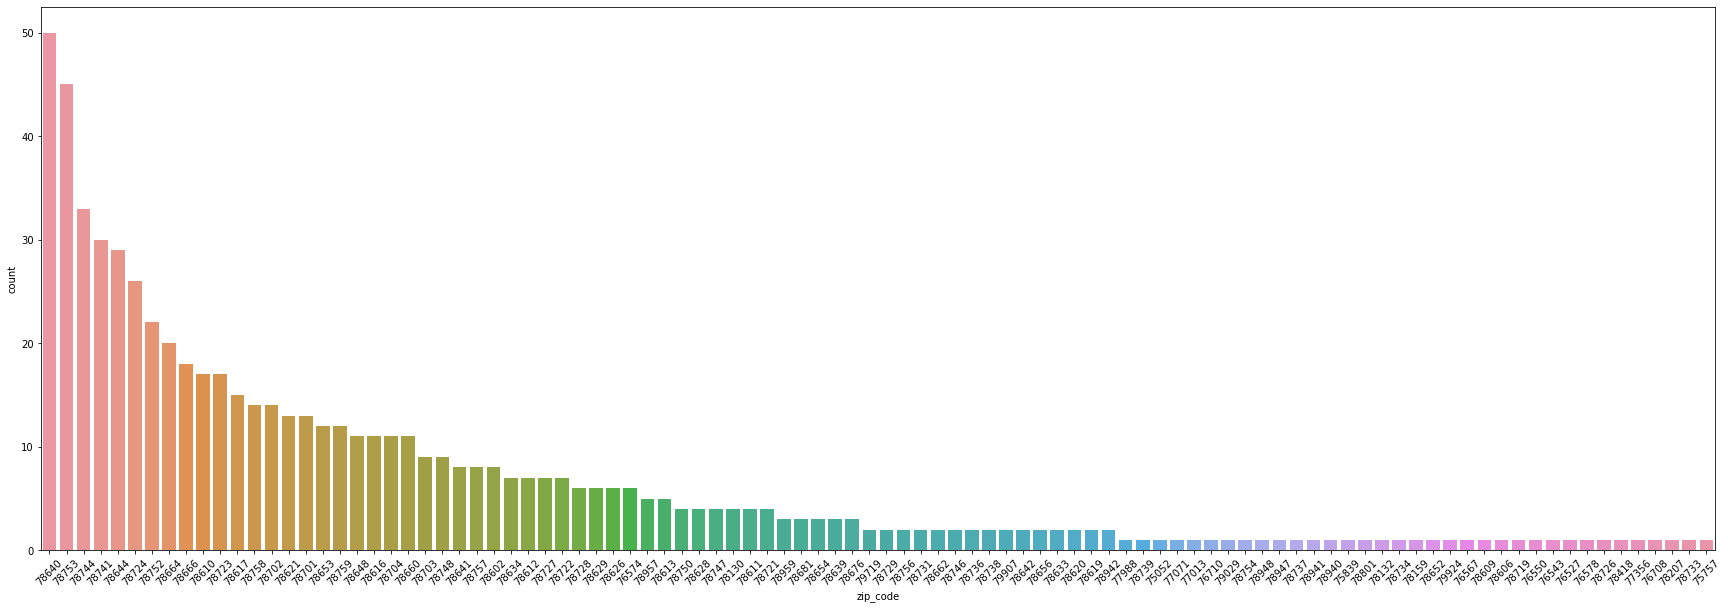

In [23]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.countplot(
    data=df_icu,
    x='zip_code',
    #hue='race_display',
    order=df_icu['zip_code'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [24]:
#df_percent = df_icu.groupby(['zip_code']).agg({'deid_fin_encounter': 'count'}).sort_values(by=['deid_fin_encounter'], ascending=False)/len(df_icu)
df_percent = df_icu.groupby('zip_code').agg(['count'])['deid_fin_encounter'].sort_values(by=['count'], ascending=False)/len(df_icu)
df_percent = df_percent.reset_index(level=['zip_code'], col_level=1)
df_percent.rename(columns={'count': 'percentage'}, inplace=True)
df_percent['percentage'] = df_percent['percentage'].round(2)
df_percent

zip_code  percentage
0      78640        0.08
1      78753        0.07
2      78744        0.05
3      78741        0.05
4      78644        0.04
..       ...         ...
93     75757        0.00
94     78719        0.00
95     78726        0.00
96     78733        0.00
97     79924        0.00

[98 rows x 2 columns]

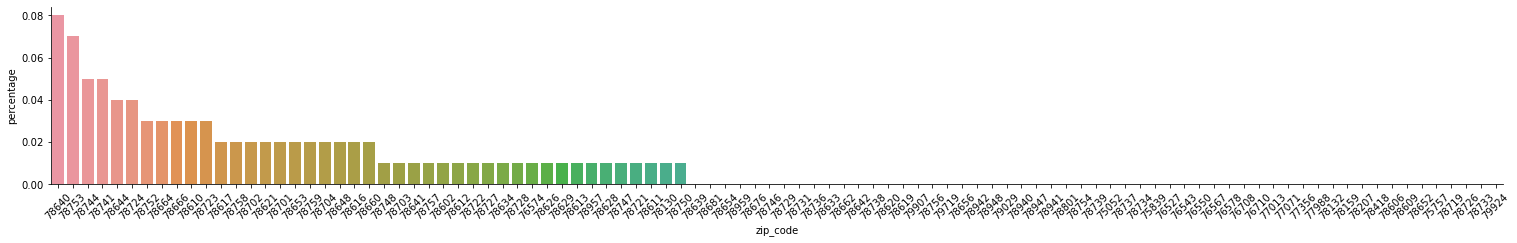

In [25]:
sns.catplot(
    data=df_percent,
    x='zip_code',
    y='percentage',
    kind='bar',
    height=3,
    aspect=7,
    #hue='race_display',
    order=df_percent['zip_code'].values
)
plt.xticks(rotation=45)
plt.show()


## Census Tract ## Social Vulnerable Index (SVI)

### Add census tract #### Add Social Vulnerable Index

It seems that different zip codes indicate one single GEOID(Census Tract)

In [26]:
df_census_tract_tx_travis[df_census_tract_tx_travis.duplicated()==True]

Empty DataFrame
Columns: [ZCTA5, STATE, COUNTY, TRACT, GEOID, POPPT, HUPT, AREAPT,  AREALANDPT, ZPOP, ZHU, ZAREA, ZAREALAND, TRPOP, TRHU, TRAREA, TRAREALAND, ZPOPPCT, ZHUPCT, ZAREAPCT, ZAREALANDPCT, TRPOPPCT, TRHUPCT, TRAREAPCT, TRAREALANDPCT]
Index: []

In [27]:
df_census_tract_tx_travis[df_census_tract_tx_travis.duplicated(subset=['GEOID'])==True]['GEOID'].unique()

array([48453002433, 48453002436, 48453001854, 48453001765, 48453001766,
       48453001780, 48453001859, 48453002207, 48453002209, 48453002210,
       48453001842, 48453001855, 48453001856, 48453001768, 48453001857,
       48453001100, 48453001200, 48453000601, 48453000401, 48453002432,
       48453002435, 48453980000, 48453002109, 48453002111, 48453000402,
       48453000306, 48453002212, 48453002208, 48453001847, 48453001851,
       48453001785, 48453001786, 48453001714, 48453000101, 48453000102,
       48453001760, 48453001764, 48453001769, 48453001737, 48453001742,
       48453001773, 48453001784, 48453001916, 48453001775, 48453002307,
       48453002310, 48453002411, 48453002428, 48453002431, 48453001712,
       48453001750, 48453002403, 48453001912, 48453002425, 48453002426,
       48453002434, 48453001772, 48453001774, 48453002407, 48453002421,
       48453002422, 48453001740, 48453001749, 48453001777, 48453001716,
       48453000203, 48453000302, 48453002105, 48453001503, 48453

In [28]:
df_census_tract_tx_travis.loc[(df_census_tract_tx_travis.duplicated(subset=['GEOID'])==True) & (df_census_tract_tx_travis['GEOID']==48453002433)]

ZCTA5  STATE  COUNTY  TRACT        GEOID  POPPT  HUPT    AREAPT  \
11  78617     48     453   2433  48453002433   5385  1689  67024483   

     AREALANDPT   ZPOP   ZHU      ZAREA  ZAREALAND  TRPOP  TRHU    TRAREA  \
11     66047566  22210  6027  180906001  179717734   5981  1886  72222670   

    TRAREALAND  ZPOPPCT  ZHUPCT  ZAREAPCT  ZAREALANDPCT  TRPOPPCT  TRHUPCT  \
11    71008056    24.25   28.02     37.05         36.75     90.04    89.55   

    TRAREAPCT  TRAREALANDPCT  
11       92.8          93.01

In [29]:
df_census_tract_tx_travis.loc[df_census_tract_tx_travis['GEOID']==48453002433]

ZCTA5  STATE  COUNTY  TRACT        GEOID  POPPT  HUPT    AREAPT  \
4   78612     48     453   2433  48453002433    596   197   5198187   
11  78617     48     453   2433  48453002433   5385  1689  67024483   

     AREALANDPT   ZPOP   ZHU      ZAREA  ZAREALAND  TRPOP  TRHU    TRAREA  \
4       4960490  11457  4274  244502254  243038259   5981  1886  72222670   
11     66047566  22210  6027  180906001  179717734   5981  1886  72222670   

    TRAREALAND  ZPOPPCT  ZHUPCT  ZAREAPCT  ZAREALANDPCT  TRPOPPCT  TRHUPCT  \
4     71008056     5.20    4.61      2.13          2.04      9.96    10.45   
11    71008056    24.25   28.02     37.05         36.75     90.04    89.55   

    TRAREAPCT  TRAREALANDPCT  
4         7.2           6.99  
11       92.8          93.01

In [30]:
df_census_tract_tx_travis.loc[df_census_tract_tx_travis['GEOID']==48453002436]

ZCTA5  STATE  COUNTY  TRACT        GEOID  POPPT  HUPT    AREAPT  \
3    78610     48     453   2436  48453002436    340   123   9184558   
13   78617     48     453   2436  48453002436    520   163  16916195   
105  78719     48     453   2436  48453002436   1629   525  26468659   
258  78747     48     453   2436  48453002436    183    60   3635999   

      AREALANDPT   ZPOP   ZHU      ZAREA  ZAREALAND  TRPOP  TRHU    TRAREA  \
3        9184558  23502  8184  240195543  239275955   2672   871  56205411   
13      16916195  22210  6027  180906001  179717734   2672   871  56205411   
105     26468646   1764   586   48313393   48311283   2672   871  56205411   
258      3635999  14808  5491   61594269   61578835   2672   871  56205411   

     TRAREALAND  ZPOPPCT  ZHUPCT  ZAREAPCT  ZAREALANDPCT  TRPOPPCT  TRHUPCT  \
3      56205398     1.45    1.50      3.82          3.84     12.72    14.12   
13     56205398     2.34    2.70      9.35          9.41     19.46    18.71   
105    56205398    92.35   89.59     54.79         54.79     60.97    60.28   
258    56205398     1.24    1.09      5.90          5.90      6.85     6.89   

     TRAREAPCT  TRAREALANDPCT  
3        16.34          16.34  
13       30.10          30.10  
105      47.09          47.09  
258       6.47           6.47

In [31]:
 df_svi_tx_travis = df_svi_tx_travis.merge(df_census_tract_tx_travis, left_on='FIPS', right_on='GEOID', how='inner').copy()

 print(df_svi_tx_travis.shape)
 df_svi_tx_travis.head()

(362, 149)


ST STATE_x ST_ABBR  STCNTY COUNTY_x         FIPS  \
0  48   TEXAS      TX   48453   Travis  48453000101   
1  48   TEXAS      TX   48453   Travis  48453000101   
2  48   TEXAS      TX   48453   Travis  48453000102   
3  48   TEXAS      TX   48453   Travis  48453000102   
4  48   TEXAS      TX   48453   Travis  48453000203   

                                  LOCATION  AREA_SQMI  E_TOTPOP  M_TOTPOP  \
0  Census Tract 1.01, Travis County, Texas   1.206569      4652       418   
1  Census Tract 1.01, Travis County, Texas   1.206569      4652       418   
2  Census Tract 1.02, Travis County, Texas   2.125888      2604       170   
3  Census Tract 1.02, Travis County, Texas   2.125888      2604       170   
4  Census Tract 2.03, Travis County, Texas   0.466611      1890       250   

   E_HU  M_HU  E_HH  M_HH  E_POV  M_POV  E_UNEMP  M_UNEMP   E_PCI  M_PCI  \
0  2273    68  2133   107    294    128       79       61   67846   7009   
1  2273    68  2133   107    294    128       79       61   67846   7009   
2  1193    32  1110    71     45     32       22       22  112935  17709   
3  1193    32  1110    71     45     32       22       22  112935  17709   
4   957    38   816    59    549    176       28       27   46499  13710   

   E_NOHSDP  M_NOHSDP  E_AGE65  M_AGE65  E_AGE17  M_AGE17  E_DISABL  M_DISABL  \
0        43        42      783      131      855      120       378       113   
1        43        42      783      131      855      120       378       113   
2        21        26      704      133      556       75       290       104   
3        21        26      704      133      556       75       290       104   
4       103        77       87       47      133      105       150       124   

   E_SNGPNT  M_SNGPNT  E_MINRTY  M_MINRTY  E_LIMENG  M_LIMENG  E_MUNIT  \
0       139        85       802       505         0        52      729   
1       139        85       802       505         0        52      729   
2        18        19       268       248         3        48       17   
3        18        19       268       248         3        48       17   
4        12        23       768       321         0        52      901   

   M_MUNIT  E_MOBILE  M_MOBILE  E_CROWD  M_CROWD  E_NOVEH  M_NOVEH  E_GROUPQ  \
0      113        11        18        8       18      140       61        17   
1      113        11        18        8       18      140       61        17   
2       23         0        13        0       18        8       13        20   
3       23         0        13        0       18        8       13        20   
4       74         0        13       59       41       42       29       300   

   M_GROUPQ  EP_POV  MP_POV  EP_UNEMP  MP_UNEMP    EP_PCI   MP_PCI  EP_NOHSDP  \
0        39     6.4     2.8       2.8       2.2   67846.0   7009.0        1.3   
1        39     6.4     2.8       2.8       2.2   67846.0   7009.0        1.3   
2         9     1.7     1.2       1.7       1.7  112935.0  17709.0        1.1   
3         9     1.7     1.2       1.7       1.7  112935.0  17709.0        1.1   
4       166    33.0     8.6       2.8       2.8   46499.0  13710.0        8.8   

   MP_NOHSDP  EP_AGE65  MP_AGE65  EP_AGE17  MP_AGE17  EP_DISABL  MP_DISABL  \
0        1.2      16.8       3.3      18.4       2.0        8.2        2.5   
1        1.2      16.8       3.3      18.4       2.0        8.2        2.5   
2        1.3      27.0       4.9      21.4       2.5       11.1        4.1   
3        1.3      27.0       4.9      21.4       2.5       11.1        4.1   
4        5.8       4.6       2.4       7.0       5.5        9.0        6.7   

   EP_SNGPNT  MP_SNGPNT  EP_MINRTY  MP_MINRTY  EP_LIMENG  MP_LIMENG  EP_MUNIT  \
0        6.5        4.0       17.2       10.8        0.0        1.2      32.1   
1        6.5        4.0       17.2       10.8        0.0        1.2      32.1   
2        1.6        1.7       10.3        9.5        0.1        2.0       1.4   
3        1.6        1.7       10.3        9.5        0.1   

## Drop necessary columns

In [32]:
cols_sample = [
    'deid_fin_encounter', 'age_at_admit', 'gender', 'race_display', 'insured_uninsured', 
    'zip_code', 'median_income', 'poverty_rate', 'icu_hours_summed', 'vent_hours_summed',
    'SOFA', 'has_comorbidity', 'count_comorbidity', 'life_years', 'discharge_disposition_display',
    'deceased_dt_tm'
    ]

df_sample = df_icu[cols_sample].copy()

print(df_sample.shape)
df_sample.head()

(652, 16)


deid_fin_encounter  age_at_admit  gender        race_display  \
0               27818            44    Male  Hispanic or Latino   
1               43894            71    Male  Hispanic or Latino   
2               48974            71    Male  Hispanic or Latino   
3               17000            47  Female               White   
4               23744            49  Female               White   

  insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0           Insured     78130         65627          9.5             69.48   
1           Insured     78130         65627          9.5            598.51   
2           Insured     78130         65627          9.5             21.50   
3           Insured     78130         65627          9.5             43.03   
4           Insured     78612         69213         10.6            160.17   

   vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0              58.45    11                0                  0          56   
1             352.62     5                1                  2          29   
2                NaN     1                1                  3          29   
3                NaN     0                0                  0          53   
4             293.02     2                0                  0          51   

  discharge_disposition_display   deceased_dt_tm  
0                       Expired  3/26/2020 14:10  
1                    Rehab Care              NaN  
2          Skilled Nursing Care              NaN  
3               Still a patient              NaN  
4                          Home              NaN

## Distribution of SOFA scores

In [33]:
df_sample_pct = df_sample.groupby(['SOFA']).agg({'deid_fin_encounter': 'count'}).copy()
df_sample_pct['percentage'] = df_sample_pct.loc[:, ['deid_fin_encounter']].apply(lambda x: round(x/x.sum(), 2))
df_sample_pct

deid_fin_encounter  percentage
SOFA                                
0                    138        0.21
1                     74        0.11
2                     43        0.07
3                     60        0.09
4                     85        0.13
5                     57        0.09
6                     49        0.08
7                     32        0.05
8                     30        0.05
9                     35        0.05
10                    10        0.02
11                    19        0.03
12                     8        0.01
13                     8        0.01
14                     1        0.00
15                     1        0.00
17                     1        0.00
19                     1        0.00

In [34]:
df_sample.loc[df_sample['race_display']=='Asian']

deid_fin_encounter  age_at_admit  gender race_display insured_uninsured  \
89                25299            34    Male        Asian           Insured   
272               43847            57    Male        Asian           Insured   
516               46873            69  Female        Asian           Insured   
535               27252            53  Female        Asian           Insured   
613               41187            69  Female        Asian           Insured   

     zip_code median_income poverty_rate  icu_hours_summed  vent_hours_summed  \
89      78741         45835         23.4            199.00                NaN   
272     78653         73496         13.2            373.32             280.60   
516     78664         75766           10            629.97             617.02   
535     78728         57590         11.4             17.65                NaN   
613     78731         94851            9             24.97                NaN   

     SOFA  has_comorbidity  count_comorbidity  life_years  \
89      7                1                  2          66   
272     6                1                  1          43   
516    10                1                  1          31   
535     2                1                  2          47   
613     4                1                  4          31   

    discharge_disposition_display   deceased_dt_tm  
89                           Home              NaN  
272                       Expired   5/22/2020 2:42  
516                       Expired  7/29/2020 11:55  
535                          Home              NaN  
613                       Expired    8/6/2020 3:15

In [35]:
df_sample_svi = df_sample.merge(df_svi_tx_travis, left_on='zip_code', right_on='ZCTA5', how='inner').copy()

print(df_sample_svi.shape)
df_sample_svi.head()

(3882, 165)


deid_fin_encounter  age_at_admit  gender        race_display  \
0               23744            49  Female               White   
1               45992            26  Female  Hispanic or Latino   
2               36262            70    Male  Hispanic or Latino   
3               36262            70    Male  Hispanic or Latino   
4               36262            70    Male  Hispanic or Latino   

  insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0           Insured     78612         69213         10.6            160.17   
1           Insured     78612         69213         10.6             31.97   
2           Insured     78612         69213         10.6            600.23   
3           Insured     78612         69213         10.6            600.23   
4           Insured     78612         69213         10.6            600.23   

   vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0             293.02     2                0                  0          51   
1                NaN     1                0                  0          74   
2             465.20     6                1                  2          30   
3             465.20     4                1                  2          30   
4             465.20     8                1                  2          30   

  discharge_disposition_display    deceased_dt_tm  ST STATE_x ST_ABBR  STCNTY  \
0                          Home               NaN  48   TEXAS      TX   48453   
1                          Home               NaN  48   TEXAS      TX   48453   
2                       Expired  10/23/2020 12:35  48   TEXAS      TX   48453   
3                       Expired  10/23/2020 12:35  48   TEXAS      TX   48453   
4                       Expired  10/23/2020 12:35  48   TEXAS      TX   48453   

  COUNTY_x         FIPS                                  LOCATION  AREA_SQMI  \
0   Travis  48453002433  Census Tract 24.33, Travis County, Texas  27.419913   
1   Travis  48453002433  Census Tract 24.33, Travis County, Texas  27.419913   
2   Travis  48453002433  Census Tract 24.33, Travis County, Texas  27.419913   
3   Travis  48453002433  Census Tract 24.33, Travis County, Texas  27.419913   
4   Travis  48453002433  Census Tract 24.33, Travis County, Texas  27.419913   

   E_TOTPOP  M_TOTPOP  E_HU  M_HU  E_HH  M_HH  E_POV  M_POV  E_UNEMP  M_UNEMP  \
0      9190       808  2530    84  2415   102   1126    613      217      144   
1      9190       808  2530    84  2415   102   1126    613      217      144   
2      9190       808  2530    84  2415   102   1126    613      217      144   
3      9190       808  2530    84  2415   102   1126    613      217      144   
4      9190       808  2530    84  2415   102   1126    613      217      144   

   E_PCI  M_PCI  E_NOHSDP  M_NOHSDP  E_AGE65  M_AGE65  E_AGE17  M_AGE17  \
0  22191   3013      1339       291      485       73     3256      512   
1  22191   3013      1339       291      485       73     3256      512   
2  22191   3013      1339       291      485       73     3256      512   
3  22191   3013      1339       291      485       73     3256      512   
4  22191   3013      1339       291      485       73     3256      512   

   E_DISABL  M_DISABL  E_SNGPNT  M_SNGPNT  E_MINRTY  M_MINRTY  E_LIMENG  \
0       940       342       286       149      7695       849       494   
1       940       342       286       149      7695       849       494   
2       940       342       286       149      7695       849       494   
3       940       342       286       149      7695       849       494   
4       940       342       286       149      7695       849       494   

   M_LIMENG  E_MUNIT  M_MUNIT  E_MOBILE  M_MOBILE  E_CROWD  M_CROWD  E_NOVEH  \
0       193        0       26       645       153      137      107       62   
1       193        0       26       645       153      137      107       62   
2       193        0       26       645       153      137      1

In [36]:
count_race = Counter(df_sample['race_display'])
count_race

Counter({'Hispanic or Latino': 358,
         'White': 235,
         'Black or African American': 54,
         'Asian': 5})

In [37]:
df_left = df_sample.groupby(['SOFA'])[['deid_fin_encounter']].agg('count').reset_index(level=['SOFA'], col_level=1).rename(columns={'deid_fin_encounter': 'num_patients'})
df_right = df_sample.loc[df_sample['discharge_disposition_display']=='Expired'].groupby(['SOFA'])[['deid_fin_encounter']].agg('count').reset_index(level=['SOFA'], col_level=1).rename(columns={'deid_fin_encounter': 'num_death'})

In [38]:
df_center = df_left.merge(df_right, on='SOFA', how='left')
#df_center['num_patients']/df_center['num_death']
df_center['percentage_death'] = round(df_center['num_death']/df_center['num_patients']*100, 0)
df_center

SOFA  num_patients  num_death  percentage_death
0      0           138        3.0               2.0
1      1            74        3.0               4.0
2      2            43        4.0               9.0
3      3            60       15.0              25.0
4      4            85       20.0              24.0
5      5            57       16.0              28.0
6      6            49       21.0              43.0
7      7            32        9.0              28.0
8      8            30       14.0              47.0
9      9            35       19.0              54.0
10    10            10        9.0              90.0
11    11            19        9.0              47.0
12    12             8        3.0              38.0
13    13             8        4.0              50.0
14    14             1        NaN               NaN
15    15             1        1.0             100.0
16    17             1        1.0             100.0
17    19             1        1.0             100.0

# Develop allocation

In [39]:
iter_simulation = 1000  # The number of simulations

vent_availability_pct = np.linspace(0,1,11)   # Percentage of ventilator availability
vent_availability_pct.round(1)

class Allocation(object):
  
    def __init__(self, df, vent_availability_pct, calibration_sofa_mortality):
        self.patients = df.copy() 
        self.patients['death'] = [0 for _ in range(len(self.patients))]             # All patients initially survive
        self.patients['allocate_vent'] = [0 for _ in range(len(self.patients))]     # All patients are not initially allocated to ventilators  
        self.num_vent = int(len(self.patients) * vent_availability_pct)             # Number of ventilators available
        self.model_mortality = calibration_sofa_mortality

    def __run_allocation(self, df):
        df_prioritized = df.copy()
        df_prioritized.reset_index(drop=True, inplace=True)
        print('Number of vents available: {}'.format(self.num_vent))
        num_vent_tmp = self.num_vent
        
        for i, patient in df_prioritized.iterrows():     # Allocate ventilators

            if num_vent_tmp == 0:                      # If no more ventialtors available, then stop allocating ventilators
                break
            
            df_prioritized.loc[i, 'allocate_vent'] = 1
            num_vent_tmp -= 1
        '''
        Calculate mortality of patients in ties
        '''
        if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs
            print('Tie occurs')
            tie_sofa = df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values
            print('------------------------------TIE SOFA: {}------------------------------'.format(tie_sofa[0]))
            print('------------------------------MORTALITY PROBABILITY: {}------------------------------'.format(self.model_mortality[tie_sofa[0]]))

            if df_prioritized.loc[df_prioritized['SOFA']==tie_sofa[0]].first_valid_index() == 0:    # When a tie occurs from the first patient
                df_tie_allocated = df_prioritized.loc[(df_prioritized['allocate_vent']==1) & (df_prioritized['SOFA']==tie_sofa[0])].copy()
                #display(df_tie_allocated)
                df_tie_allocated_not = df_prioritized.loc[(df_prioritized['allocate_vent']==0) & (df_prioritized['SOFA']==tie_sofa[0])].copy()
                #display(df_tie_allocated_not)
                df_tie_comb = pd.concat([df_tie_allocated, df_tie_allocated_not])
                #display(pd.concat([df_tie_allocated, df_tie_allocated_not]))
                df_count_death_tie = self.mortality_tie(df_tie_comb, tie_sofa[0]).copy()
                print('-----------------------TIE-----------------------')
                display(df_count_death_tie)

                df_count_death_allocated_not = self.mortality_allocated_not(df_prioritized.loc[(df_prioritized['allocate_vent']==0) & (df_prioritized['SOFA']!=tie_sofa[0])].copy())
                print('-----------------------NOT ALLOCATED-----------------------')
                display(df_count_death_allocated_not)

                df_count_death_final = df_count_death_tie.set_index('race_display').add(df_count_death_allocated_not.set_index('race_display'), fill_value=0).reset_index()
                df_count_death_final.rename(columns={'expected_death': 'count_death'}, inplace=True)
                print('-----------------------TOTAL-----------------------')
                df_count_death_final = df_count_death_final[['race_display', 'count_death']]
                df_count_death_final.drop_duplicates(inplace=True)
                display(df_count_death_final)
                return df_count_death_final
            else:
                cut_off_idx_before = df_prioritized.loc[df_prioritized['SOFA']==tie_sofa[0]].first_valid_index()
                cut_off_idx_after = df_prioritized.loc[df_prioritized['SOFA']==tie_sofa[0]].last_valid_index()
                
                # 1. table
                print('-----------------------ALLOCATED-----------------------')
                display(df_prioritized.loc[:cut_off_idx_before-1])
                df_count_death_allocated = self.mortality_allocated(df_prioritized.loc[:cut_off_idx_before-1].copy())
                display(df_count_death_allocated)
                
                # 2. table
                print('-----------------------TIE-----------------------')
                display(df_prioritized.loc[cut_off_idx_before:cut_off_idx_after])
                df_count_death_tie = self.mortality_tie(df_prioritized.loc[cut_off_idx_before:cut_off_idx_after], tie_sofa[0]).copy()
                display(df_count_death_tie)

                # 3. table
                print('-----------------------NOT ALLOCATED-----------------------')
                display(df_prioritized.loc[cut_off_idx_after+1:])
                df_count_death_allocated_not = self.mortality_allocated_not(df_prioritized.loc[cut_off_idx_after+1:].copy())
                display(df_count_death_allocated_not)
       
                print('-----------------------TOTAL-----------------------')
                df_count_death_final = df_count_death_allocated.set_index('race_display').add(df_count_death_tie.set_index('race_display'), fill_value=0).reset_index()
                df_count_death_final = df_count_death_final.set_index('race_display').add(df_count_death_allocated_not.set_index('race_display'), fill_value=0).reset_index()
                df_count_death_final.rename(columns={'expected_death': 'count_death'}, inplace=True)
                df_count_death_final = df_count_death_final[['race_display', 'count_death']]
                df_count_death_final.drop_duplicates(inplace=True)
                display(df_count_death_final)
                return df_count_death_final

        else:   # When a tie dose not occur
            if df_prioritized.loc[df_prioritized['allocate_vent']==1].empty == False:
                df_count_death_allocated = self.mortality_allocated(df_prioritized.loc[df_prioritized['allocate_vent']==1].copy())

            if df_prioritized.loc[df_prioritized['allocate_vent']==0].empty == False:
                df_count_death_allocated_not = self.mortality_allocated_not(df_prioritized.loc[df_prioritized['allocate_vent']==0].copy())
        
            #display(df_prioritized)    
            if self.num_vent == 0:
                display(df_count_death_allocated_not)
                return df_count_death_allocated_not

            elif self.num_vent == len(self.patients):
                display(df_count_death_allocated)
                return df_count_death_allocated

            else:
                df_count_death_final = df_count_death_allocated.set_index('race_display').add(df_count_death_allocated_not.set_index('race_display'), fill_value=0).reset_index()
                display(df_count_death_final)
                return df_count_death_final
    
    def mortality_allocated(self, df):
    
        df_tmp = df.groupby(['SOFA', 'race_display'])[['deid_fin_encounter']].agg(['count']).copy()
        df_tmp = df_tmp.reset_index(level=['SOFA', 'race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
       
        for i, value in df_tmp.iterrows():
            df_tmp.loc[i, 'mortality rate'] = self.model_mortality[df_tmp.loc[i, 'SOFA']] * 0.01
            df_tmp.loc[i, 'expected_death'] = round(df_tmp.loc[i, 'count'] * self.model_mortality[df_tmp.loc[i, 'SOFA']] * 0.01, 2)
        display(df_tmp)

        df_tmp = df_tmp.groupby('race_display')[['expected_death']].agg(['sum'])
        df_tmp.rename(columns={'sum': 'expected_death'}, inplace=True)
        df_tmp = df_tmp.reset_index(level=['race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
        
        return df_tmp
        
    def mortality_allocated_not(self, df): # Mortality for patients not admitted to ventilators

        for i, patient in df.iterrows():
            df.loc[i, 'death'] = 1  # Assumption in Chicago
        
        df_tmp = df.loc[df['death']==1].groupby(['SOFA', 'race_display'])[['death']].agg(['count']).copy()
        df_tmp = df_tmp.reset_index(level=['SOFA', 'race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
        display(df_tmp)
        df_tmp = df_tmp.groupby('race_display')[['count']].agg(['sum']).copy()
        df_tmp.rename(columns={'sum': 'expected_death'}, inplace=True)
        df_tmp = df_tmp.reset_index(level=['race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
    
        return df_tmp

    def mortality_tie(self, df, tie_sofa):
        df_tmp = df.groupby(['race_display', 'allocate_vent'])[['deid_fin_encounter']].agg(['count']).copy()
        df_tmp = df_tmp.reset_index(level=['race_display', 'allocate_vent'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)

        for i, value in df_tmp.iterrows():

            df_tmp.loc[i, 'P[NV] & P[V]'] = round(value['count']/df_tmp.loc[df_tmp['race_display']==value['race_display'], 'count'].sum(), 2)
            if value['allocate_vent']==0:
                df_tmp.loc[i, 'P[D|NV] & P[D|V]'] = 1.0
            else:
                df_tmp.loc[i, 'P[D|NV] & P[D|V]'] = self.model_mortality[tie_sofa] * 0.01

            df_tmp.loc[i, 'P[D_sub]'] = df_tmp.loc[i, 'P[NV] & P[V]'] * df_tmp.loc[i, 'P[D|NV] & P[D|V]']

        display(df_tmp)
        for race in df_tmp['race_display'].unique():
            sum_p = 0 
            #print(race)
            for i, value in df_tmp.loc[df_tmp['race_display']==race].iterrows():
                #print(i)
                #print(df_tmp.loc[i, 'P[D]'])
                sum_p += value['P[D_sub]']
            #print('Total Sum: {}'.format(sum_p))
            df_tmp.loc[df_tmp['race_display']==race, 'P[D_total]'] = sum_p
            df_tmp.loc[df_tmp['race_display']==race, 'expected_death'] = df_tmp.loc[df_tmp['race_display']==race, 'count'].sum() * sum_p
        '''for i, value in df_tmp.iterrows():

            df_tmp.loc[i, 'expected_death'] = df_tmp.loc[df_tmp['race_display']==value['race_display'], 'count'].sum() *\
            (
                (
                    df_tmp.loc[(df_tmp['race_display']==value['race_display']) & (df_tmp['allocate_vent']==0), 'P[D|NV] & P[D|V]'].values[0]*
                    df_tmp.loc[(df_tmp['race_display']==value['race_display']) & (df_tmp['allocate_vent']==0), 'P[NV] & P[V]'].values[0]
                ) +
                (
                    df_tmp.loc[(df_tmp['race_display']==value['race_display']) & (df_tmp['allocate_vent']==1), 'P[D|NV] & P[D|V]'].values[0]*
                    df_tmp.loc[(df_tmp['race_display']==value['race_display']) & (df_tmp['allocate_vent']==1), 'P[NV] & P[V]'].values[0]
                ) 
            )'''
        
        #df_tmp = df_tmp[['race_display', 'expected_death']].drop_duplicates()
        df_tmp.reset_index(drop=True, inplace=True)
        
        return df_tmp

    def __run_allocation_simulator(self, df):    
    
        for i, patient in df.iterrows():

            if self.num_vent == 0: # No more ventialtors and stop allocation
                break
            
            mortality, allocation = self.mortality_allocated_simulator(patient)
            
            df.loc[i, 'death'] = mortality
            df.loc[i, 'allocate_vent'] = allocation
            
            self.num_vent -= 1 

        df_allocated = df.loc[df['allocate_vent']==1].copy()
        df_allocated_not = df.loc[df['allocate_vent']==0].copy()

        df_patients_allocated_not_adj = self.mortality_allocated_not_simulator(df_allocated_not)
  
        df_tmp = pd.concat([df_allocated, df_patients_allocated_not_adj])

        df_tmp = df_tmp.groupby(['race_display'])[['death']].agg(['sum']).copy()

        df_tmp = df_tmp.reset_index(level=['race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
  
        return df_tmp    
    
    def mortality_allocated_simulator(self, patient):
        prob = self.model_mortality[patient['SOFA']]            # Mortality probability for each qSOFA score
        death = np.random.binomial(size=1, n=1, p=prob*.01)[0]  # Death depending on mortality probability
        
        #if death == 1 or patient['discharge_disposition_display'] == 'Expired':
        if death == 1:
            return death, 1    
        else:
            return death, 1
    
    def mortality_allocated_not_simulator(self, df):

        for i, patient in df.iterrows():
            df.loc[i, 'death'] = 1
        
        return df
    
    def __categorize_age(self, patient):    # Life-cycle consideration delineated in Maryland CSC
        if patient.age_at_admit < 50:
            return 1 
        elif patient.age_at_admit < 70: 
            return 2 
        elif patient.age_at_admit < 85:
            return 3 
        else:
            return 4
    
    def maryland(self):
        df_patients = self.patients.copy()

        # Assign patients into age catetory
        df_patients['cat_age'] = df_patients.apply(lambda patient: self.__categorize_age(patient), axis=1)     # Categorize patients' age
    
        # Prioritize patients who have lower SOFA score first, then small amount of comorbidities, and finally are in youger age category first
        df_patients.sort_values(by=['SOFA', 'count_comorbidity', 'cat_age'], ascending=[True, True, True], inplace=True)
        df_prioritized = df_patients.copy()
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated 

    def max_lives_saved(self):
        df_patients = self.patients.copy()
        
        # Prioritize patients who have lower SOFA scores first
        df_patients.sort_values(by=['SOFA'], ascending=True, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated 
    
    def max_life_years(self):
        df_patients = self.patients.copy()

        # Prioritize patients who have lower SOFA scores and then more life years to live
        df_patients.sort_values(by=['SOFA', 'life_years'], ascending=[True,False], inplace=True)
        df_prioritized = df_patients.copy()

        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated 
    
    def youngest(self):
        df_patients = self.patients.copy()
        
        # Prioritize patients who are younger first
        df_patients.sort_values(by=['age_at_admit'], ascending=True, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated 
        
    def sickest(self):
        df_patients = self.patients.copy()
        
        # Prioritize patients who have higher SOFA scores first
        df_patients.sort_values(by=['SOFA'], ascending=False, inplace=True)
        df_prioritized = df_patients.copy()
        df_prioritized.reset_index(inplace=True)

        #print(df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'])
        #tie_sofa = df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values
        #print(tie_sofa)
        #display(df_prioritized.iloc[[:self.num_vent]])
        #display(df_prioritized[df_prioritized.index<self.num_vent])
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated

    def new_york(self):
        df_patients = self.patients.copy()

        # Prioritize patients by shuffling orders within patients having the same qSOFA scores
        groups_sofa = [df for _, df in df_patients.groupby('SOFA')]      # Group patients based on qSOFA scores
        random.shuffle(groups_sofa)                                             # Shuffle patients in each qSOFA score group randomly
        df_prioritized = pd.concat(groups_sofa).reset_index(drop=True)             # Re-combine groups seperated by qSOFA scores
        df_prioritized.sort_values('SOFA', ascending=True, inplace=True)     # Sort patients by qSOFA scores in ascending order
        
        df_allocated = self.__run_allocation_simulator(df_prioritized)
        
        return df_allocated

    def lottery(self):
        df_patients = self.patients.copy()
        
        # Prioritize patients by shuffling them and get a sample including all patients(frac=1)
        df_patients.sample(frac=1)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation_simulator(df_prioritized)

        return df_allocated 
        

# Allocate ventilators (Baseline)

In [40]:
death_race_baseline = Counter(df_sample.loc[df_sample['discharge_disposition_display']=='Expired']['race_display'])
pd.DataFrame.from_dict(death_race_baseline, orient='index', columns=['count_death']).reset_index().rename(columns={'index': 'race'})

race  count_death
0         Hispanic or Latino           87
1                      White           46
2  Black or African American           16
3                      Asian            3

In [41]:
avg_death_baseline = statistics.mean(death_race_baseline.values())  # Average of deaths for all racial groups
death_race_baseline = pd.DataFrame(death_race_baseline.items(), columns=['race', 'count_death'])
death_race_baseline['level'] = 2.0   # Nothing about scarcity level
death_race_baseline['avg_death'] = avg_death_baseline
death_race_baseline['percentage_death'] = death_race_baseline.apply(lambda row: percentage_death(row), axis=1)  # Ratio of death for each racial group from total deaths
death_race_baseline['type_allocation'] = 'Baseline'
death_race_baseline

race  count_death  level  avg_death  percentage_death  \
0         Hispanic or Latino           87    2.0         38         24.301676   
1                      White           46    2.0         38         19.574468   
2  Black or African American           16    2.0         38         29.629630   
3                      Asian            3    2.0         38         60.000000   

  type_allocation  
0        Baseline  
1        Baseline  
2        Baseline  
3        Baseline

# Allocate ventilators (Analytical approach)

## Maryland

In [42]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for pct in vent_availability_pct:
    pct = round(pct, 1)

    print('------------------------------{}------------------------------'.format(round(pct, 1)))
    allocation = Allocation(df_sample, pct, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.maryland()                                      # Prioritize patients following Maryland CSC

    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])

    df_death.rename(columns={'race_display': 'race', 'expected_death': 'count_death'}, inplace=True)

    df_death['level'] = round(pct, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)

    ls_df_count_death_race.append(df_death)

df_maryland = pd.concat(ls_df_count_death_race)
df_maryland['type_allocation'] = 'Maryland'
df_baseline_maryland = pd.concat([death_race_baseline, df_maryland])
df_baseline_maryland[['count_death', 'avg_death', 'percentage_death']] = df_baseline_maryland[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)
display(df_baseline_maryland)


------------------------------0.0------------------------------
Number of vents available: 0


<ipython-input-39-90e681612423>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs


SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20
13     4                      Asian      1
14     4  Black or African American      3
15     4         Hispanic or Latino     51
16     4                      White     30
17     5  Black or African American      5
18     5         Hispanic or Latino     31
19     5                      White     21
20     6                      Asian      1
21     6  Black or African American      9
22     6         Hispanic or Latino     27
23     6                      White     12
24     7                      Asian      1
25     7  Black or African American      3
26     7         Hispanic or Latino     17
27     7                      White     11
28     8  Black or African American      4
29     8         Hispanic or Latino     20
30     8                      White      6
31     9  Black or African American      1
32     9         Hispanic or Latino     21
33     9                      White     13
34    10                      Asian      1
35    10  Black or African American      1
36    10         Hispanic or Latino      7
37    10                      White      1
38    11  Black or African American      2
39    11         Hispanic or Latino     14
40    11                      White      3
41    12         Hispanic or Latino      8
42    13  Black or African American      2
43    13         Hispanic or Latino      2
44    13                      White      4
45    14                      White      1
46    15                      White      1
47    17                      White      1
48    19                      White      1

race_display  expected_death
0                      Asian               5
1  Black or African American              54
2         Hispanic or Latino             358
3                      White             235

------------------------------0.1------------------------------
Number of vents available: 65
Tie occurs
------------------------------TIE SOFA: 0------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------


race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      3          0.50   
1  Black or African American              1      3          0.50   
2         Hispanic or Latino              0     44          0.61   
3         Hispanic or Latino              1     28          0.39   
4                      White              0     26          0.43   
5                      White              1     34          0.57   

   P[D|NV] & P[D|V]  P[D_sub]  
0               1.0      0.50  
1               0.0      0.00  
2               1.0      0.61  
3               0.0      0.00  
4               1.0      0.43  
5               0.0      0.00

-----------------------TIE-----------------------


race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      3          0.50   
1  Black or African American              1      3          0.50   
2         Hispanic or Latino              0     44          0.61   
3         Hispanic or Latino              1     28          0.39   
4                      White              0     26          0.43   
5                      White              1     34          0.57   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               1.0      0.50        0.50            3.00  
1               0.0      0.00        0.50            3.00  
2               1.0      0.61        0.61           43.92  
3               0.0      0.00        0.61           43.92  
4               1.0      0.43        0.43           25.80  
5               0.0      0.00        0.43           25.80

SOFA               race_display  count
0      1  Black or African American      8
1      1         Hispanic or Latino     33
2      1                      White     33
3      2                      Asian      1
4      2  Black or African American      6
5      2         Hispanic or Latino     19
6      2                      White     17
7      3  Black or African American      4
8      3         Hispanic or Latino     36
9      3                      White     20
10     4                      Asian      1
11     4  Black or African American      3
12     4         Hispanic or Latino     51
13     4                      White     30
14     5  Black or African American      5
15     5         Hispanic or Latino     31
16     5                      White     21
17     6                      Asian      1
18     6  Black or African American      9
19     6         Hispanic or Latino     27
20     6                      White     12
21     7                      Asian      1
22     7  Black or African American      3
23     7         Hispanic or Latino     17
24     7                      White     11
25     8  Black or African American      4
26     8         Hispanic or Latino     20
27     8                      White      6
28     9  Black or African American      1
29     9         Hispanic or Latino     21
30     9                      White     13
31    10                      Asian      1
32    10  Black or African American      1
33    10         Hispanic or Latino      7
34    10                      White      1
35    11  Black or African American      2
36    11         Hispanic or Latino     14
37    11                      White      3
38    12         Hispanic or Latino      8
39    13  Black or African American      2
40    13         Hispanic or Latino      2
41    13                      White      4
42    14                      White      1
43    15                      White      1
44    17                      White      1
45    19                      White      1

-----------------------NOT ALLOCATED-----------------------


race_display  expected_death
0                      Asian               5
1  Black or African American              48
2         Hispanic or Latino             286
3                      White             175

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         5.00
1  Black or African American        51.00
3         Hispanic or Latino       329.92
5                      White       200.80

------------------------------0.2------------------------------
Number of vents available: 130
Tie occurs
------------------------------TIE SOFA: 0------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------


race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      6          1.00   
1         Hispanic or Latino              0      5          0.07   
2         Hispanic or Latino              1     67          0.93   
3                      White              0      3          0.05   
4                      White              1     57          0.95   

   P[D|NV] & P[D|V]  P[D_sub]  
0               0.0      0.00  
1               1.0      0.07  
2               0.0      0.00  
3               1.0      0.05  
4               0.0      0.00

-----------------------TIE-----------------------


race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      6          1.00   
1         Hispanic or Latino              0      5          0.07   
2         Hispanic or Latino              1     67          0.93   
3                      White              0      3          0.05   
4                      White              1     57          0.95   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               0.0      0.00        0.00            0.00  
1               1.0      0.07        0.07            5.04  
2               0.0      0.00        0.07            5.04  
3               1.0      0.05        0.05            3.00  
4               0.0      0.00        0.05            3.00

SOFA               race_display  count
0      1  Black or African American      8
1      1         Hispanic or Latino     33
2      1                      White     33
3      2                      Asian      1
4      2  Black or African American      6
5      2         Hispanic or Latino     19
6      2                      White     17
7      3  Black or African American      4
8      3         Hispanic or Latino     36
9      3                      White     20
10     4                      Asian      1
11     4  Black or African American      3
12     4         Hispanic or Latino     51
13     4                      White     30
14     5  Black or African American      5
15     5         Hispanic or Latino     31
16     5                      White     21
17     6                      Asian      1
18     6  Black or African American      9
19     6         Hispanic or Latino     27
20     6                      White     12
21     7                      Asian      1
22     7  Black or African American      3
23     7         Hispanic or Latino     17
24     7                      White     11
25     8  Black or African American      4
26     8         Hispanic or Latino     20
27     8                      White      6
28     9  Black or African American      1
29     9         Hispanic or Latino     21
30     9                      White     13
31    10                      Asian      1
32    10  Black or African American      1
33    10         Hispanic or Latino      7
34    10                      White      1
35    11  Black or African American      2
36    11         Hispanic or Latino     14
37    11                      White      3
38    12         Hispanic or Latino      8
39    13  Black or African American      2
40    13         Hispanic or Latino      2
41    13                      White      4
42    14                      White      1
43    15                      White      1
44    17                      White      1
45    19                      White      1

-----------------------NOT ALLOCATED-----------------------


race_display  expected_death
0                      Asian               5
1  Black or African American              48
2         Hispanic or Latino             286
3                      White             175

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         5.00
1  Black or African American        48.00
2         Hispanic or Latino       291.04
4                      White       178.00

------------------------------0.3------------------------------
Number of vents available: 195
Tie occurs
------------------------------TIE SOFA: 1------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
0                 17000            47  Female               White   
1                 40145            36    Male  Hispanic or Latino   
2                 12746            35    Male  Hispanic or Latino   
3                 49618            42    Male  Hispanic or Latino   
4                 47627            28    Male               White   
..                  ...           ...     ...                 ...   
133               39476            57  Female               White   
134               30252            76    Male  Hispanic or Latino   
135               31833            74  Female               White   
136               14186            84  Female               White   
137               35077            92    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78130         65627          9.5             43.03   
1           Uninsured     78753         51053         17.6             22.03   
2           Uninsured     78753         51053         17.6             75.75   
3           Uninsured     78753         51053         17.6            234.37   
4           Uninsured     78753         51053         17.6             38.70   
..                ...       ...           ...          ...               ...   
133           Insured     78701        122182         13.3             41.09   
134         Uninsured     78753         51053         17.6            248.37   
135           Insured     78664         75766           10             56.73   
136           Insured     78642         89213          6.8            110.70   
137           Insured     78653         73496         13.2            155.48   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                  NaN     0                0                  0          53   
1                  NaN     0                0                  0          64   
2                  NaN     0                0                  0          65   
3                  NaN     0                0                  0          58   
4                  NaN     0                0                  0          72   
..                 ...   ...              ...                ...         ...   
133                NaN     0                1                  3          43   
134                NaN     0                1                  3          24   
135                NaN     0                1                  3          26   
136                NaN     0                1                  3          16   
137               0.25     0                1                  3           8   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
0                 Still a patient              NaN      0              1   
1                            Home              NaN      0              1   
2                            Home              NaN      0              1   
3                            Home              NaN      0              1   
4                            Home              NaN      0              1   
..                            ...              ...    ...            ...   
133                          Home              NaN      0              1   
134                       Expired  6/29/2020 22:18      0              1   
135                          Home              NaN      0              1   
136    Home Care with Home Health              NaN      0              1   
137    Home Care with Home Health              NaN      0              1   

     cat_age  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
133        2  
134        3  
135        3  
136        3  
137        4  

[138 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0     0  Black or African American      6             0.0             0.0
1     0         Hispanic or Latino     72             0.0             0.0
2     0                      White     60             0.0             0.0

race_display  expected_death
0  Black or African American             0.0
1         Hispanic or Latino             0.0
2                      White             0.0

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
138               45992            26  Female  Hispanic or Latino   
139               18014            33  Female  Hispanic or Latino   
140               45833            26    Male  Hispanic or Latino   
141               13500            16  Female               White   
142               47542            29    Male  Hispanic or Latino   
..                  ...           ...     ...                 ...   
207               44182            77  Female               White   
208               45620            76    Male  Hispanic or Latino   
209               26115            71  Female  Hispanic or Latino   
210               31296            81    Male               White   
211               22922            89    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
138           Insured     78612         69213         10.6             31.97   
139           Insured     78753         51053         17.6            202.25   
140           Insured     78703        108548          4.8             37.23   
141           Insured     78633         80117          3.4             30.25   
142           Insured     78701        122182         13.3             11.34   
..                ...       ...           ...          ...               ...   
207           Insured     78653         73496         13.2             28.52   
208           Insured     78756         82535          5.6            261.36   
209           Insured     78629         53783         15.8             12.05   
210           Insured     78662         79792           11            130.27   
211           Insured     78957         58446           12             12.24   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
138                NaN     1                0                  0          74   
139                NaN     1                0                  0          67   
140                NaN     1                0                  0          74   
141                NaN     1                0                  0          84   
142                NaN     1                0                  0          71   
..                 ...   ...              ...                ...         ...   
207                NaN     1                1                  4          23   
208                NaN     1                1                  4          24   
209                NaN     1                1                  4          29   
210                NaN     1                1                  4          19   
211                NaN     1                1                  5          11   

    discharge_disposition_display deceased_dt_tm  death  allocate_vent  \
138                          Home            NaN      0              1   
139                          Home            NaN      0              1   
140                          Home            NaN      0              1   
141                          Home            NaN      0              1   
142                          Home            NaN      0              1   
..                            ...            ...    ...            ...   
207                          Home            NaN      0              0   
208          Skilled Nursing Care            NaN      0              0   
209                          Home            NaN      0              0   
210          Skilled Nursing Care            NaN      0              0   
211                    Rehab Care            NaN      0              0   

     cat_age  
138        1  
139        1  
140        1  
141        1  
142        1  
..       ...  
207        3  
208        3  
209        3  
210        3  
211        4  

[74 rows x 19 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      3          0.38   
1  Black or African American              1      5          0.62   
2         Hispanic or Latino              0      4          0.12   
3         Hispanic or Latino              1     29          0.88   
4                      White              0     10          0.30   
5                      White              1     23          0.70   

   P[D|NV] & P[D|V]  P[D_sub]  
0               1.0      0.38  
1               0.0      0.00  
2               1.0      0.12  
3               0.0      0.00  
4               1.0      0.30  
5               0.0      0.00

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      3          0.38   
1  Black or African American              1      5          0.62   
2         Hispanic or Latino              0      4          0.12   
3         Hispanic or Latino              1     29          0.88   
4                      White              0     10          0.30   
5                      White              1     23          0.70   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               1.0      0.38        0.38            3.04  
1               0.0      0.00        0.38            3.04  
2               1.0      0.12        0.12            3.96  
3               0.0      0.00        0.12            3.96  
4               1.0      0.30        0.30            9.90  
5               0.0      0.00        0.30            9.90

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
212               23744            49  Female                      White   
213               28224            34  Female                      White   
214               22543            36    Male                      White   
215               14719            24    Male                      White   
216               29012            61    Male         Hispanic or Latino   
..                  ...           ...     ...                        ...   
647               37408            52    Male  Black or African American   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
212           Insured     78612         69213         10.6            160.17   
213           Insured     78640         75689          9.1            275.02   
214           Insured     78610         80256          6.3             14.57   
215         Uninsured     78701        122182         13.3             29.90   
216           Insured     78758         55074         18.1             98.55   
..                ...       ...           ...          ...               ...   
647           Insured     78617         62179         14.2            205.20   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
212             293.02     2                0                  0          51   
213               0.77     2                0                  0          66   
214                NaN     2                0                  0          64   
215                NaN     2                0                  0          76   
216               4.63     2                0                  0          39   
..                 ...   ...              ...                ...         ...   
647             124.16    13                1                  4          48   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
212                          Home              NaN      0              0   
213                          Home              NaN      0              0   
214                          Home              NaN      0              0   
215                          Home              NaN      0              0   
216                          Home              NaN      0              0   
..                            ...              ...    ...            ...   
647                          Home              NaN      0              0   
648                           NaN              NaN      0              0   
649                       Expired  11/5/2020 16:40      0              0   
650                       Expired  11/5/2020 16:40      0              0   
651                       Expired  11/5/2020 16:40      0              0   

     cat_age  
212        1  
213        1  
214        1  
215        1  
216        2  
..       ...  
647        2  
648        2  
649        3  
650        3  
651        3  

[440 rows x 19 columns]

SOFA               race_display  count
0      2                      Asian      1
1      2  Black or African American      6
2      2         Hispanic or Latino     19
3      2                      White     17
4      3  Black or African American      4
5      3         Hispanic or Latino     36
6      3                      White     20
7      4                      Asian      1
8      4  Black or African American      3
9      4         Hispanic or Latino     51
10     4                      White     30
11     5  Black or African American      5
12     5         Hispanic or Latino     31
13     5                      White     21
14     6                      Asian      1
15     6  Black or African American      9
16     6         Hispanic or Latino     27
17     6                      White     12
18     7                      Asian      1
19     7  Black or African American      3
20     7         Hispanic or Latino     17
21     7                      White     11
22     8  Black or African American      4
23     8         Hispanic or Latino     20
24     8                      White      6
25     9  Black or African American      1
26     9         Hispanic or Latino     21
27     9                      White     13
28    10                      Asian      1
29    10  Black or African American      1
30    10         Hispanic or Latino      7
31    10                      White      1
32    11  Black or African American      2
33    11         Hispanic or Latino     14
34    11                      White      3
35    12         Hispanic or Latino      8
36    13  Black or African American      2
37    13         Hispanic or Latino      2
38    13                      White      4
39    14                      White      1
40    15                      White      1
41    17                      White      1
42    19                      White      1

race_display  expected_death
0                      Asian               5
1  Black or African American              40
2         Hispanic or Latino             253
3                      White             142

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         5.00
1  Black or African American        43.04
3         Hispanic or Latino       256.96
5                      White       151.90

------------------------------0.4------------------------------
Number of vents available: 260
Tie occurs
------------------------------TIE SOFA: 3------------------------------
------------------------------MORTALITY PROBABILITY: 6.4------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
0                 17000            47  Female                      White   
1                 40145            36    Male         Hispanic or Latino   
2                 12746            35    Male         Hispanic or Latino   
3                 49618            42    Male         Hispanic or Latino   
4                 47627            28    Male                      White   
..                  ...           ...     ...                        ...   
250               39810            51    Male                      White   
251               21784            89    Male  Black or African American   
252               26852            68  Female                      White   
253               11265            80  Female         Hispanic or Latino   
254               24756            67    Male  Black or African American   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78130         65627          9.5             43.03   
1           Uninsured     78753         51053         17.6             22.03   
2           Uninsured     78753         51053         17.6             75.75   
3           Uninsured     78753         51053         17.6            234.37   
4           Uninsured     78753         51053         17.6             38.70   
..                ...       ...           ...          ...               ...   
250         Uninsured     76527         54940         13.6            158.55   
251           Insured     78629         53783         15.8              4.37   
252           Insured     78727         80758            5             42.67   
253         Uninsured     78616         54870         14.6            374.32   
254           Insured     78722         72428          9.4             50.95   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                  NaN     0                0                  0          53   
1                  NaN     0                0                  0          64   
2                  NaN     0                0                  0          65   
3                  NaN     0                0                  0          58   
4                  NaN     0                0                  0          72   
..                 ...   ...              ...                ...         ...   
250                NaN     2                1                  3          49   
251                NaN     2                1                  3          11   
252                NaN     2                1                  4          32   
253                NaN     2                1                  4          20   
254                NaN     2                1                  6          33   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
0                 Still a patient              NaN      0              1   
1                            Home              NaN      0              1   
2                            Home              NaN      0              1   
3                            Home              NaN      0              1   
4                            Home              NaN      0              1   
..                            ...              ...    ...            ...   
250                          Home              NaN      0              1   
251              Hospice Facility   9/5/2020 16:43      0              1   
252                       Expired  7/27/2020 13:34      0              1   
253                          Home              NaN      0              1   
254          Skilled Nursing Care              NaN      0              1   

     cat_age  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
250        2  
251        4  
252        2  
253        3  
254        2  

[255 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0     0  Black or African American      6           0.000            0.00
1     0         Hispanic or Latino     72           0.000            0.00
2     0                      White     60           0.000            0.00
3     1  Black or African American      8           0.000            0.00
4     1         Hispanic or Latino     33           0.000            0.00
5     1                      White     33           0.000            0.00
6     2                      Asian      1           0.064            0.06
7     2  Black or African American      6           0.064            0.38
8     2         Hispanic or Latino     19           0.064            1.22
9     2                      White     17           0.064            1.09

race_display  expected_death
0                      Asian            0.06
1  Black or African American            0.38
2         Hispanic or Latino            1.22
3                      White            1.09

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
255               11330            43    Male         Hispanic or Latino   
256               43336            34    Male         Hispanic or Latino   
257               31898            48    Male         Hispanic or Latino   
258               14626            10    Male         Hispanic or Latino   
259               28472             8    Male         Hispanic or Latino   
260               25279            10    Male                      White   
261               34439            47    Male         Hispanic or Latino   
262               44009            42    Male         Hispanic or Latino   
263               11869            26  Female         Hispanic or Latino   
264               30021             5  Female  Black or African American   
265               18826            63    Male         Hispanic or Latino   
266               19432            54  Female                      White   
267               35166            69  Female                      White   
268               47329            54  Female         Hispanic or Latino   
269               12593            70    Male                      White   
270               49646            45  Female         Hispanic or Latino   
271               18447            40  Female                      White   
272               13648            39    Male         Hispanic or Latino   
273               32493            39  Female         Hispanic or Latino   
274               25093            63    Male         Hispanic or Latino   
275               47284            68    Male         Hispanic or Latino   
276               38915            61  Female         Hispanic or Latino   
277               30292            50    Male         Hispanic or Latino   
278               23852            60  Female         Hispanic or Latino   
279               11504            57    Male         Hispanic or Latino   
280               22188            63  Female                      White   
281               29300            79  Female                      White   
282               14488            76  Female                      White   
283               13106            83    Male         Hispanic or Latino   
284               16005            86    Male         Hispanic or Latino   
285               17170            88  Female         Hispanic or Latino   
286               47563            49    Male         Hispanic or Latino   
287               16369            40    Male         Hispanic or Latino   
288               23463            43    Male                      White   
289               10893            51    Male         Hispanic or Latino   
290               36569            66    Male  Black or African American   
291               39187            61    Male                      White   
292               37448            66  Female         Hispanic or Latino   
293               37397            72  Female         Hispanic or Latino   
294               46649            76    Male         Hispanic or Latino   
295               11432            73    Male                      White   
296               15547            73  Female         Hispanic or Latino   
297               40424            71    Male                      White   
298               31541            93  Female                      White   
299               26729            95  Female                      White   
300               18299            60  Female                      White   
301               14070            63  Female         Hispanic or Latino   
302               32146            61  Female         Hispanic or Latino   
303               10779            58    Male         Hispanic or Latino   
304               41226            59  Female                      White   
305               10474            83    Male         Hispanic or Latino   
306               45285            76  Female        

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      4          1.00   
1         Hispanic or Latino              0     31          0.86   
2         Hispanic or Latino              1      5          0.14   
3                      White              0     20          1.00   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000   1.00000  
1             1.000   0.86000  
2             0.064   0.00896  
3             1.000   1.00000

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      4          1.00   
1         Hispanic or Latino              0     31          0.86   
2         Hispanic or Latino              1      5          0.14   
3                      White              0     20          1.00   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000   1.00000     1.00000         4.00000  
1             1.000   0.86000     0.86896        31.28256  
2             0.064   0.00896     0.86896        31.28256  
3             1.000   1.00000     1.00000        20.00000

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
315               15850            27  Female         Hispanic or Latino   
316               27967            36    Male         Hispanic or Latino   
317               33220             0  Female         Hispanic or Latino   
318               40065            35    Male         Hispanic or Latino   
319               17721            42    Male         Hispanic or Latino   
..                  ...           ...     ...                        ...   
647               37408            52    Male  Black or African American   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
315           Insured     78753         51053         17.6            799.76   
316           Insured     78753         51053         17.6            192.52   
317           Insured     78753         51053         17.6             17.80   
318           Insured     78741         45835         23.4             93.68   
319           Insured     78741         45835         23.4             24.28   
..                ...       ...           ...          ...               ...   
647           Insured     78617         62179         14.2            205.20   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
315             626.02     4                0                  0          73   
316                NaN     4                0                  0          64   
317                NaN     4                0                  0         100   
318              37.18     4                0                  0          65   
319                NaN     4                0                  0          58   
..                 ...   ...              ...                ...         ...   
647             124.16    13                1                  4          48   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
315    Home Care with Home Health              NaN      0              0   
316                          Home              NaN      0              0   
317                          Home              NaN      0              0   
318                          Home              NaN      0              0   
319                          Home              NaN      0              0   
..                            ...              ...    ...            ...   
647                          Home              NaN      0              0   
648                           NaN              NaN      0              0   
649                       Expired  11/5/2020 16:40      0              0   
650                       Expired  11/5/2020 16:40      0              0   
651                       Expired  11/5/2020 16:40      0              0   

     cat_age  
315        1  
316        1  
317        1  
318        1  
319        1  
..       ...  
647        2  
648        2  
649        3  
650        3  
651        3  

[337 rows x 19 columns]

SOFA               race_display  count
0      4                      Asian      1
1      4  Black or African American      3
2      4         Hispanic or Latino     51
3      4                      White     30
4      5  Black or African American      5
5      5         Hispanic or Latino     31
6      5                      White     21
7      6                      Asian      1
8      6  Black or African American      9
9      6         Hispanic or Latino     27
10     6                      White     12
11     7                      Asian      1
12     7  Black or African American      3
13     7         Hispanic or Latino     17
14     7                      White     11
15     8  Black or African American      4
16     8         Hispanic or Latino     20
17     8                      White      6
18     9  Black or African American      1
19     9         Hispanic or Latino     21
20     9                      White     13
21    10                      Asian      1
22    10  Black or African American      1
23    10         Hispanic or Latino      7
24    10                      White      1
25    11  Black or African American      2
26    11         Hispanic or Latino     14
27    11                      White      3
28    12         Hispanic or Latino      8
29    13  Black or African American      2
30    13         Hispanic or Latino      2
31    13                      White      4
32    14                      White      1
33    15                      White      1
34    17                      White      1
35    19                      White      1

race_display  expected_death
0                      Asian               4
1  Black or African American              30
2         Hispanic or Latino             198
3                      White             105

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      4.06000
1  Black or African American     34.38000
2         Hispanic or Latino    230.50256
4                      White    126.09000

------------------------------0.5------------------------------
Number of vents available: 326
Tie occurs
------------------------------TIE SOFA: 4------------------------------
------------------------------MORTALITY PROBABILITY: 20.2------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
0                 17000            47  Female                      White   
1                 40145            36    Male         Hispanic or Latino   
2                 12746            35    Male         Hispanic or Latino   
3                 49618            42    Male         Hispanic or Latino   
4                 47627            28    Male                      White   
..                  ...           ...     ...                        ...   
310               21138            57    Male                      White   
311               43466            67    Male         Hispanic or Latino   
312               13039            67    Male                      White   
313               26915            73    Male  Black or African American   
314               21690            76    Male         Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78130         65627          9.5             43.03   
1           Uninsured     78753         51053         17.6             22.03   
2           Uninsured     78753         51053         17.6             75.75   
3           Uninsured     78753         51053         17.6            234.37   
4           Uninsured     78753         51053         17.6             38.70   
..                ...       ...           ...          ...               ...   
310           Insured     78744         52345         18.9            290.52   
311           Insured     78644         57637         12.3            130.00   
312           Insured     78748         76909          9.2              2.50   
313           Insured     78640         75689          9.1             81.28   
314           Insured     78610         80256          6.3             10.74   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                  NaN     0                0                  0          53   
1                  NaN     0                0                  0          64   
2                  NaN     0                0                  0          65   
3                  NaN     0                0                  0          58   
4                  NaN     0                0                  0          72   
..                 ...   ...              ...                ...         ...   
310               0.03     3                1                  4          43   
311                NaN     3                1                  4          33   
312                NaN     3                1                  4          33   
313                NaN     3                1                  4          27   
314                NaN     3                1                  4          24   

    discharge_disposition_display  deceased_dt_tm  death  allocate_vent  \
0                 Still a patient             NaN      0              1   
1                            Home             NaN      0              1   
2                            Home             NaN      0              1   
3                            Home             NaN      0              1   
4                            Home             NaN      0              1   
..                            ...             ...    ...            ...   
310    Home Care with Home Health             NaN      0              1   
311                          Home             NaN      0              1   
312          Skilled Nursing Care             NaN      0              1   
313                       Expired  8/1/2020 16:23      0              1   
314                          Home             NaN      0              1   

     cat_age  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
310        2  
311        2  
312        2  
313        3  
314        3  

[315 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28

race_display  expected_death
0                      Asian            0.06
1  Black or African American            0.64
2         Hispanic or Latino            3.52
3                      White            2.37

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
315               15850            27  Female  Hispanic or Latino   
316               27967            36    Male  Hispanic or Latino   
317               33220             0  Female  Hispanic or Latino   
318               40065            35    Male  Hispanic or Latino   
319               17721            42    Male  Hispanic or Latino   
..                  ...           ...     ...                 ...   
395               41187            69  Female               Asian   
396               25307            81    Male               White   
397               45813            82    Male  Hispanic or Latino   
398               34855            83    Male               White   
399               33410            72    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
315           Insured     78753         51053         17.6            799.76   
316           Insured     78753         51053         17.6            192.52   
317           Insured     78753         51053         17.6             17.80   
318           Insured     78741         45835         23.4             93.68   
319           Insured     78741         45835         23.4             24.28   
..                ...       ...           ...          ...               ...   
395           Insured     78731         94851            9             24.97   
396           Insured     78737        142411          2.3             33.58   
397           Insured     78724         50625         23.4             17.97   
398           Insured     78648         47854         25.5             14.68   
399           Insured     78644         57637         12.3             14.15   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
315             626.02     4                0                  0          73   
316                NaN     4                0                  0          64   
317                NaN     4                0                  0         100   
318              37.18     4                0                  0          65   
319                NaN     4                0                  0          58   
..                 ...   ...              ...                ...         ...   
395                NaN     4                1                  4          31   
396                NaN     4                1                  4          19   
397                NaN     4                1                  4          18   
398                NaN     4                1                  4          17   
399                NaN     4                1                  5          28   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
315    Home Care with Home Health              NaN      0              1   
316                          Home              NaN      0              1   
317                          Home              NaN      0              1   
318                          Home              NaN      0              1   
319                          Home              NaN      0              1   
..                            ...              ...    ...            ...   
395                       Expired    8/6/2020 3:15      0              0   
396                       Expired   5/9/2020 19:41      0              0   
397                          Home              NaN      0              0   
398                       Expired  6/15/2020 16:58      0              0   
399          Skilled Nursing Care              NaN      0              0   

     cat_age  
315        1  
316        1  
317        1  
318        1  
319        1  
..       ...  
395        2  
396        3  
397        3  
398        3  
399        3  

[85 rows x 19 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1          1.00   
1  Black or African American              0      3          1.00   
2         Hispanic or Latino              0     41          0.80   
3         Hispanic or Latino              1     10          0.20   
4                      White              0     29          0.97   
5                      White              1      1          0.03   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000   1.00000  
1             1.000   1.00000  
2             1.000   0.80000  
3             0.202   0.04040  
4             1.000   0.97000  
5             0.202   0.00606

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1          1.00   
1  Black or African American              0      3          1.00   
2         Hispanic or Latino              0     41          0.80   
3         Hispanic or Latino              1     10          0.20   
4                      White              0     29          0.97   
5                      White              1      1          0.03   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000   1.00000     1.00000          1.0000  
1             1.000   1.00000     1.00000          3.0000  
2             1.000   0.80000     0.84040         42.8604  
3             0.202   0.04040     0.84040         42.8604  
4             1.000   0.97000     0.97606         29.2818  
5             0.202   0.00606     0.97606         29.2818

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
400               32640            47    Male         Hispanic or Latino   
401               49941            29  Female                      White   
402               41743            25    Male         Hispanic or Latino   
403               12184            32    Male         Hispanic or Latino   
404               14658            23    Male         Hispanic or Latino   
..                  ...           ...     ...                        ...   
647               37408            52    Male  Black or African American   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
400           Insured     78758         55074         18.1            138.38   
401           Insured     78634         84237          8.7            789.70   
402           Insured     78634         84237          8.7            172.65   
403           Insured     78644         57637         12.3            980.38   
404           Insured     78613        104308          4.8             47.32   
..                ...       ...           ...          ...               ...   
647           Insured     78617         62179         14.2            205.20   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
400              94.18     5                0                  0          53   
401             775.33     5                0                  0          71   
402              39.05     5                0                  0          75   
403            1186.03     5                0                  0          68   
404              21.08     5                0                  0          77   
..                 ...   ...              ...                ...         ...   
647             124.16    13                1                  4          48   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
400                          Home              NaN      0              0   
401              Another Hospital              NaN      0              0   
402                          Home              NaN      0              0   
403       Long Term Care Hospital              NaN      0              0   
404                          Home              NaN      0              0   
..                            ...              ...    ...            ...   
647                          Home              NaN      0              0   
648                           NaN              NaN      0              0   
649                       Expired  11/5/2020 16:40      0              0   
650                       Expired  11/5/2020 16:40      0              0   
651                       Expired  11/5/2020 16:40      0              0   

     cat_age  
400        1  
401        1  
402        1  
403        1  
404        1  
..       ...  
647        2  
648        2  
649        3  
650        3  
651        3  

[252 rows x 19 columns]

SOFA               race_display  count
0      5  Black or African American      5
1      5         Hispanic or Latino     31
2      5                      White     21
3      6                      Asian      1
4      6  Black or African American      9
5      6         Hispanic or Latino     27
6      6                      White     12
7      7                      Asian      1
8      7  Black or African American      3
9      7         Hispanic or Latino     17
10     7                      White     11
11     8  Black or African American      4
12     8         Hispanic or Latino     20
13     8                      White      6
14     9  Black or African American      1
15     9         Hispanic or Latino     21
16     9                      White     13
17    10                      Asian      1
18    10  Black or African American      1
19    10         Hispanic or Latino      7
20    10                      White      1
21    11  Black or African American      2
22    11         Hispanic or Latino     14
23    11                      White      3
24    12         Hispanic or Latino      8
25    13  Black or African American      2
26    13         Hispanic or Latino      2
27    13                      White      4
28    14                      White      1
29    15                      White      1
30    17                      White      1
31    19                      White      1

race_display  expected_death
0                      Asian               3
1  Black or African American              27
2         Hispanic or Latino             147
3                      White              75

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian       4.0600
1  Black or African American      30.6400
2         Hispanic or Latino     193.3804
4                      White     106.6518

------------------------------0.6------------------------------
Number of vents available: 391
Tie occurs
------------------------------TIE SOFA: 4------------------------------
------------------------------MORTALITY PROBABILITY: 20.2------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
0                 17000            47  Female                      White   
1                 40145            36    Male         Hispanic or Latino   
2                 12746            35    Male         Hispanic or Latino   
3                 49618            42    Male         Hispanic or Latino   
4                 47627            28    Male                      White   
..                  ...           ...     ...                        ...   
310               21138            57    Male                      White   
311               43466            67    Male         Hispanic or Latino   
312               13039            67    Male                      White   
313               26915            73    Male  Black or African American   
314               21690            76    Male         Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78130         65627          9.5             43.03   
1           Uninsured     78753         51053         17.6             22.03   
2           Uninsured     78753         51053         17.6             75.75   
3           Uninsured     78753         51053         17.6            234.37   
4           Uninsured     78753         51053         17.6             38.70   
..                ...       ...           ...          ...               ...   
310           Insured     78744         52345         18.9            290.52   
311           Insured     78644         57637         12.3            130.00   
312           Insured     78748         76909          9.2              2.50   
313           Insured     78640         75689          9.1             81.28   
314           Insured     78610         80256          6.3             10.74   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                  NaN     0                0                  0          53   
1                  NaN     0                0                  0          64   
2                  NaN     0                0                  0          65   
3                  NaN     0                0                  0          58   
4                  NaN     0                0                  0          72   
..                 ...   ...              ...                ...         ...   
310               0.03     3                1                  4          43   
311                NaN     3                1                  4          33   
312                NaN     3                1                  4          33   
313                NaN     3                1                  4          27   
314                NaN     3                1                  4          24   

    discharge_disposition_display  deceased_dt_tm  death  allocate_vent  \
0                 Still a patient             NaN      0              1   
1                            Home             NaN      0              1   
2                            Home             NaN      0              1   
3                            Home             NaN      0              1   
4                            Home             NaN      0              1   
..                            ...             ...    ...            ...   
310    Home Care with Home Health             NaN      0              1   
311                          Home             NaN      0              1   
312          Skilled Nursing Care             NaN      0              1   
313                       Expired  8/1/2020 16:23      0              1   
314                          Home             NaN      0              1   

     cat_age  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
310        2  
311        2  
312        2  
313        3  
314        3  

[315 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28

race_display  expected_death
0                      Asian            0.06
1  Black or African American            0.64
2         Hispanic or Latino            3.52
3                      White            2.37

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
315               15850            27  Female  Hispanic or Latino   
316               27967            36    Male  Hispanic or Latino   
317               33220             0  Female  Hispanic or Latino   
318               40065            35    Male  Hispanic or Latino   
319               17721            42    Male  Hispanic or Latino   
..                  ...           ...     ...                 ...   
395               41187            69  Female               Asian   
396               25307            81    Male               White   
397               45813            82    Male  Hispanic or Latino   
398               34855            83    Male               White   
399               33410            72    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
315           Insured     78753         51053         17.6            799.76   
316           Insured     78753         51053         17.6            192.52   
317           Insured     78753         51053         17.6             17.80   
318           Insured     78741         45835         23.4             93.68   
319           Insured     78741         45835         23.4             24.28   
..                ...       ...           ...          ...               ...   
395           Insured     78731         94851            9             24.97   
396           Insured     78737        142411          2.3             33.58   
397           Insured     78724         50625         23.4             17.97   
398           Insured     78648         47854         25.5             14.68   
399           Insured     78644         57637         12.3             14.15   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
315             626.02     4                0                  0          73   
316                NaN     4                0                  0          64   
317                NaN     4                0                  0         100   
318              37.18     4                0                  0          65   
319                NaN     4                0                  0          58   
..                 ...   ...              ...                ...         ...   
395                NaN     4                1                  4          31   
396                NaN     4                1                  4          19   
397                NaN     4                1                  4          18   
398                NaN     4                1                  4          17   
399                NaN     4                1                  5          28   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
315    Home Care with Home Health              NaN      0              1   
316                          Home              NaN      0              1   
317                          Home              NaN      0              1   
318                          Home              NaN      0              1   
319                          Home              NaN      0              1   
..                            ...              ...    ...            ...   
395                       Expired    8/6/2020 3:15      0              0   
396                       Expired   5/9/2020 19:41      0              0   
397                          Home              NaN      0              0   
398                       Expired  6/15/2020 16:58      0              0   
399          Skilled Nursing Care              NaN      0              0   

     cat_age  
315        1  
316        1  
317        1  
318        1  
319        1  
..       ...  
395        2  
396        3  
397        3  
398        3  
399        3  

[85 rows x 19 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1          1.00   
1  Black or African American              1      3          1.00   
2         Hispanic or Latino              0      3          0.06   
3         Hispanic or Latino              1     48          0.94   
4                      White              0      5          0.17   
5                      White              1     25          0.83   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000   1.00000  
1             0.202   0.20200  
2             1.000   0.06000  
3             0.202   0.18988  
4             1.000   0.17000  
5             0.202   0.16766

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1          1.00   
1  Black or African American              1      3          1.00   
2         Hispanic or Latino              0      3          0.06   
3         Hispanic or Latino              1     48          0.94   
4                      White              0      5          0.17   
5                      White              1     25          0.83   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000   1.00000     1.00000         1.00000  
1             0.202   0.20200     0.20200         0.60600  
2             1.000   0.06000     0.24988        12.74388  
3             0.202   0.18988     0.24988        12.74388  
4             1.000   0.17000     0.33766        10.12980  
5             0.202   0.16766     0.33766        10.12980

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
400               32640            47    Male         Hispanic or Latino   
401               49941            29  Female                      White   
402               41743            25    Male         Hispanic or Latino   
403               12184            32    Male         Hispanic or Latino   
404               14658            23    Male         Hispanic or Latino   
..                  ...           ...     ...                        ...   
647               37408            52    Male  Black or African American   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
400           Insured     78758         55074         18.1            138.38   
401           Insured     78634         84237          8.7            789.70   
402           Insured     78634         84237          8.7            172.65   
403           Insured     78644         57637         12.3            980.38   
404           Insured     78613        104308          4.8             47.32   
..                ...       ...           ...          ...               ...   
647           Insured     78617         62179         14.2            205.20   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
400              94.18     5                0                  0          53   
401             775.33     5                0                  0          71   
402              39.05     5                0                  0          75   
403            1186.03     5                0                  0          68   
404              21.08     5                0                  0          77   
..                 ...   ...              ...                ...         ...   
647             124.16    13                1                  4          48   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
400                          Home              NaN      0              0   
401              Another Hospital              NaN      0              0   
402                          Home              NaN      0              0   
403       Long Term Care Hospital              NaN      0              0   
404                          Home              NaN      0              0   
..                            ...              ...    ...            ...   
647                          Home              NaN      0              0   
648                           NaN              NaN      0              0   
649                       Expired  11/5/2020 16:40      0              0   
650                       Expired  11/5/2020 16:40      0              0   
651                       Expired  11/5/2020 16:40      0              0   

     cat_age  
400        1  
401        1  
402        1  
403        1  
404        1  
..       ...  
647        2  
648        2  
649        3  
650        3  
651        3  

[252 rows x 19 columns]

SOFA               race_display  count
0      5  Black or African American      5
1      5         Hispanic or Latino     31
2      5                      White     21
3      6                      Asian      1
4      6  Black or African American      9
5      6         Hispanic or Latino     27
6      6                      White     12
7      7                      Asian      1
8      7  Black or African American      3
9      7         Hispanic or Latino     17
10     7                      White     11
11     8  Black or African American      4
12     8         Hispanic or Latino     20
13     8                      White      6
14     9  Black or African American      1
15     9         Hispanic or Latino     21
16     9                      White     13
17    10                      Asian      1
18    10  Black or African American      1
19    10         Hispanic or Latino      7
20    10                      White      1
21    11  Black or African American      2
22    11         Hispanic or Latino     14
23    11                      White      3
24    12         Hispanic or Latino      8
25    13  Black or African American      2
26    13         Hispanic or Latino      2
27    13                      White      4
28    14                      White      1
29    15                      White      1
30    17                      White      1
31    19                      White      1

race_display  expected_death
0                      Asian               3
1  Black or African American              27
2         Hispanic or Latino             147
3                      White              75

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      4.06000
1  Black or African American     28.24600
2         Hispanic or Latino    163.26388
4                      White     87.49980

------------------------------0.7------------------------------
Number of vents available: 456
Tie occurs
------------------------------TIE SOFA: 5------------------------------
------------------------------MORTALITY PROBABILITY: 20.2------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
0                 17000            47  Female               White   
1                 40145            36    Male  Hispanic or Latino   
2                 12746            35    Male  Hispanic or Latino   
3                 49618            42    Male  Hispanic or Latino   
4                 47627            28    Male               White   
..                  ...           ...     ...                 ...   
395               41187            69  Female               Asian   
396               25307            81    Male               White   
397               45813            82    Male  Hispanic or Latino   
398               34855            83    Male               White   
399               33410            72    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78130         65627          9.5             43.03   
1           Uninsured     78753         51053         17.6             22.03   
2           Uninsured     78753         51053         17.6             75.75   
3           Uninsured     78753         51053         17.6            234.37   
4           Uninsured     78753         51053         17.6             38.70   
..                ...       ...           ...          ...               ...   
395           Insured     78731         94851            9             24.97   
396           Insured     78737        142411          2.3             33.58   
397           Insured     78724         50625         23.4             17.97   
398           Insured     78648         47854         25.5             14.68   
399           Insured     78644         57637         12.3             14.15   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                  NaN     0                0                  0          53   
1                  NaN     0                0                  0          64   
2                  NaN     0                0                  0          65   
3                  NaN     0                0                  0          58   
4                  NaN     0                0                  0          72   
..                 ...   ...              ...                ...         ...   
395                NaN     4                1                  4          31   
396                NaN     4                1                  4          19   
397                NaN     4                1                  4          18   
398                NaN     4                1                  4          17   
399                NaN     4                1                  5          28   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
0                 Still a patient              NaN      0              1   
1                            Home              NaN      0              1   
2                            Home              NaN      0              1   
3                            Home              NaN      0              1   
4                            Home              NaN      0              1   
..                            ...              ...    ...            ...   
395                       Expired    8/6/2020 3:15      0              1   
396                       Expired   5/9/2020 19:41      0              1   
397                          Home              NaN      0              1   
398                       Expired  6/15/2020 16:58      0              1   
399          Skilled Nursing Care              NaN      0              1   

     cat_age  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
395        2  
396        3  
397        3  
398        3  
399        3  

[400 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06

race_display  expected_death
0                      Asian            0.26
1  Black or African American            1.25
2         Hispanic or Latino           13.82
3                      White            8.43

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
400               32640            47    Male         Hispanic or Latino   
401               49941            29  Female                      White   
402               41743            25    Male         Hispanic or Latino   
403               12184            32    Male         Hispanic or Latino   
404               14658            23    Male         Hispanic or Latino   
405               23892            54    Male                      White   
406               40226            68    Male         Hispanic or Latino   
407               37531            70  Female         Hispanic or Latino   
408               42071            17    Male         Hispanic or Latino   
409               41939            44  Female         Hispanic or Latino   
410               33605            34  Female                      White   
411               18688            36    Male         Hispanic or Latino   
412               25093            63    Male         Hispanic or Latino   
413               28057            53    Male         Hispanic or Latino   
414               15875            67    Male  Black or African American   
415               19251            64    Male         Hispanic or Latino   
416               33186            53    Male         Hispanic or Latino   
417               35136            69  Female  Black or African American   
418               30090            73  Female                      White   
419               11759            71    Male                      White   
420               15722            74    Male         Hispanic or Latino   
421               17424            72    Male                      White   
422               12691            72  Female                      White   
423               43687            91  Female  Black or African American   
424               38437            94    Male                      White   
425               35588            44    Male                      White   
426               18465            66    Male                      White   
427               24609            57    Male                      White   
428               18200            62    Male         Hispanic or Latino   
429               42434            51    Male                      White   
430               18913            58    Male         Hispanic or Latino   
431               14668            55  Female         Hispanic or Latino   
432               31875            54    Male         Hispanic or Latino   
433               43358            54    Male         Hispanic or Latino   
434               10732            58    Male  Black or African American   
435               22494            61    Male         Hispanic or Latino   
436               46659            69    Male         Hispanic or Latino   
437               38165            56  Female                      White   
438               15748            58    Male                      White   
439               31072            50    Male                      White   
440               43894            71    Male         Hispanic or Latino   
441               19159            74  Female                      White   
442               33942            82  Female         Hispanic or Latino   
443               36761            75    Male         Hispanic or Latino   
444               26874            86    Male  Black or African American   
445               24968            90  Female                      White   
446               32465            48  Female         Hispanic or Latino   
447               42765            45  Female                      White   
448               42281            54  Female         Hispanic or Latino   
449               41027            66  Female         Hispanic or Latino   
450               28487            55    Male         Hispanic or Latino   
451               31660            75  Female        

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      5          1.00   
1         Hispanic or Latino              1     31          1.00   
2                      White              0      1          0.05   
3                      White              1     20          0.95   

   P[D|NV] & P[D|V]  P[D_sub]  
0             0.202    0.2020  
1             0.202    0.2020  
2             1.000    0.0500  
3             0.202    0.1919

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      5          1.00   
1         Hispanic or Latino              1     31          1.00   
2                      White              0      1          0.05   
3                      White              1     20          0.95   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             0.202    0.2020      0.2020          1.0100  
1             0.202    0.2020      0.2020          6.2620  
2             1.000    0.0500      0.2419          5.0799  
3             0.202    0.1919      0.2419          5.0799

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
457               35282            30    Male         Hispanic or Latino   
458               35901            18    Male         Hispanic or Latino   
459               35699            42    Male         Hispanic or Latino   
460               26025            28    Male  Black or African American   
461               43833            49  Female         Hispanic or Latino   
..                  ...           ...     ...                        ...   
647               37408            52    Male  Black or African American   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
457           Insured     78753         51053         17.6            227.40   
458           Insured     78753         51053         17.6            186.75   
459         Uninsured     78741         45835         23.4             70.10   
460         Uninsured     78723         59197         17.7             53.73   
461         Uninsured     78744         52345         18.9            176.77   
..                ...       ...           ...          ...               ...   
647           Insured     78617         62179         14.2            205.20   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
457             226.17     6                0                  0          70   
458               2.85     6                0                  0          82   
459                NaN     6                0                  0          58   
460              19.15     6                0                  0          72   
461             314.87     6                0                  0          51   
..                 ...   ...              ...                ...         ...   
647             124.16    13                1                  4          48   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
457                       Expired  7/25/2020 18:57      0              0   
458                          Home              NaN      0              0   
459               Still a patient              NaN      0              0   
460                          Home              NaN      0              0   
461               Still a patient              NaN      0              0   
..                            ...              ...    ...            ...   
647                          Home              NaN      0              0   
648                           NaN              NaN      0              0   
649                       Expired  11/5/2020 16:40      0              0   
650                       Expired  11/5/2020 16:40      0              0   
651                       Expired  11/5/2020 16:40      0              0   

     cat_age  
457        1  
458        1  
459        1  
460        1  
461        1  
..       ...  
647        2  
648        2  
649        3  
650        3  
651        3  

[195 rows x 19 columns]

SOFA               race_display  count
0      6                      Asian      1
1      6  Black or African American      9
2      6         Hispanic or Latino     27
3      6                      White     12
4      7                      Asian      1
5      7  Black or African American      3
6      7         Hispanic or Latino     17
7      7                      White     11
8      8  Black or African American      4
9      8         Hispanic or Latino     20
10     8                      White      6
11     9  Black or African American      1
12     9         Hispanic or Latino     21
13     9                      White     13
14    10                      Asian      1
15    10  Black or African American      1
16    10         Hispanic or Latino      7
17    10                      White      1
18    11  Black or African American      2
19    11         Hispanic or Latino     14
20    11                      White      3
21    12         Hispanic or Latino      8
22    13  Black or African American      2
23    13         Hispanic or Latino      2
24    13                      White      4
25    14                      White      1
26    15                      White      1
27    17                      White      1
28    19                      White      1

race_display  expected_death
0                      Asian               3
1  Black or African American              22
2         Hispanic or Latino             116
3                      White              54

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian       3.2600
1  Black or African American      24.2600
2         Hispanic or Latino     136.0820
3                      White      67.5099

------------------------------0.8------------------------------
Number of vents available: 521
Tie occurs
------------------------------TIE SOFA: 7------------------------------
------------------------------MORTALITY PROBABILITY: 21.5------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
0                 17000            47  Female                      White   
1                 40145            36    Male         Hispanic or Latino   
2                 12746            35    Male         Hispanic or Latino   
3                 49618            42    Male         Hispanic or Latino   
4                 47627            28    Male                      White   
..                  ...           ...     ...                        ...   
501               10775            65  Female                      White   
502               18085            77  Female  Black or African American   
503               28583            82    Male                      White   
504               37626            85  Female         Hispanic or Latino   
505               49492            76    Male  Black or African American   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78130         65627          9.5             43.03   
1           Uninsured     78753         51053         17.6             22.03   
2           Uninsured     78753         51053         17.6             75.75   
3           Uninsured     78753         51053         17.6            234.37   
4           Uninsured     78753         51053         17.6             38.70   
..                ...       ...           ...          ...               ...   
501           Insured     78957         58446           12            128.22   
502           Insured     78748         76909          9.2             58.05   
503           Insured     78613        104308          4.8             62.32   
504           Insured     78723         59197         17.7            310.20   
505           Insured     78957         58446           12             55.68   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                  NaN     0                0                  0          53   
1                  NaN     0                0                  0          64   
2                  NaN     0                0                  0          65   
3                  NaN     0                0                  0          58   
4                  NaN     0                0                  0          72   
..                 ...   ...              ...                ...         ...   
501              70.55     6                1                  4          35   
502                NaN     6                1                  4          23   
503                NaN     6                1                  4          18   
504             255.48     6                1                  4          15   
505              27.27     6                1                  5          24   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
0                 Still a patient              NaN      0              1   
1                            Home              NaN      0              1   
2                            Home              NaN      0              1   
3                            Home              NaN      0              1   
4                            Home              NaN      0              1   
..                            ...              ...    ...            ...   
501                          Home              NaN      0              1   
502                          Home              NaN      0              1   
503       Long Term Care Hospital              NaN      0              1   
504                       Expired  4/15/2020 10:35      0              1   
505    Home Care with Home Health              NaN      0              1   

     cat_age  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
501        2  
502        3  
503        3  
504        4  
505        3  

[506 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06
17     5  Black or African American      5           0.202            1.01
18     5         Hispanic or Latino     31           0.202            6.26
19     5                      White     21           0.202            4.24
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     27           0.215            5.80
23     6                      White     12           0.215            2.58

race_display  expected_death
0                      Asian            0.48
1  Black or African American            4.20
2         Hispanic or Latino           25.88
3                      White           15.25

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
506               41628            49    Male                      White   
507               17498            27  Female         Hispanic or Latino   
508               20496            56  Female         Hispanic or Latino   
509               45929            78  Female         Hispanic or Latino   
510               14391            46    Male         Hispanic or Latino   
511               45756            28    Male  Black or African American   
512               38028            54  Female         Hispanic or Latino   
513               36295            68  Female                      White   
514               30432            63    Male         Hispanic or Latino   
515               30090            73  Female                      White   
516               27145            47  Female         Hispanic or Latino   
517               25299            34    Male                      Asian   
518               45991            48    Male                      White   
519               19424            42  Female         Hispanic or Latino   
520               48179            54  Female         Hispanic or Latino   
521               32616            66  Female         Hispanic or Latino   
522               43747            53    Male         Hispanic or Latino   
523               42865            60    Male         Hispanic or Latino   
524               20647            65    Male                      White   
525               16059            56    Male         Hispanic or Latino   
526               33426            75  Female                      White   
527               37953            79  Female                      White   
528               38481            73    Male                      White   
529               12540            73  Female                      White   
530               38255            68    Male  Black or African American   
531               26312            61    Male                      White   
532               27780            60    Male         Hispanic or Latino   
533               15030            60    Male         Hispanic or Latino   
534               28935            54  Female                      White   
535               32542            59  Female         Hispanic or Latino   
536               42304            69    Male  Black or African American   
537               35200            57  Female         Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
506           Insured     78741         45835         23.4           2173.57   
507           Insured     78654         54034         11.4            327.87   
508           Insured     78602         63592         10.1             89.13   
509           Insured     78621         72500         10.5            798.02   
510           Insured     78640         75689          9.1            322.47   
511           Insured     78701        122182         13.3            195.65   
512           Insured     78744         52345         18.9            619.10   
513         Uninsured     78617         62179         14.2             38.59   
514           Insured     76574         54060         12.7            251.74   
515           Insured     78626         71638          9.7            342.73   
516           Insured     78753         51053         17.6            176.50   
517           Insured     78741         45835         23.4            199.00   
518           Insured     78626         71638          9.7             95.42   
519         Uninsured     78748         76909          9.2            507.53   
520         Uninsured     78753         51053         17.6            143.81   
521           Insured     78653         73496         13.2            119.43   
522         Uninsured     78724         50625         23.4            805.53   
523           Insured     78610         80256          6

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              1      1          1.00   
1  Black or African American              0      2          0.67   
2  Black or African American              1      1          0.33   
3         Hispanic or Latino              0      8          0.47   
4         Hispanic or Latino              1      9          0.53   
5                      White              0      7          0.64   
6                      White              1      4          0.36   

   P[D|NV] & P[D|V]  P[D_sub]  
0             0.215   0.21500  
1             1.000   0.67000  
2             0.215   0.07095  
3             1.000   0.47000  
4             0.215   0.11395  
5             1.000   0.64000  
6             0.215   0.07740

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              1      1          1.00   
1  Black or African American              0      2          0.67   
2  Black or African American              1      1          0.33   
3         Hispanic or Latino              0      8          0.47   
4         Hispanic or Latino              1      9          0.53   
5                      White              0      7          0.64   
6                      White              1      4          0.36   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             0.215   0.21500     0.21500         0.21500  
1             1.000   0.67000     0.74095         2.22285  
2             0.215   0.07095     0.74095         2.22285  
3             1.000   0.47000     0.58395         9.92715  
4             0.215   0.11395     0.58395         9.92715  
5             1.000   0.64000     0.71740         7.89140  
6             0.215   0.07740     0.71740         7.89140

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
538               19753            37    Male                      White   
539               21053            64    Male         Hispanic or Latino   
540               26620            52    Male         Hispanic or Latino   
541               37599            55    Male         Hispanic or Latino   
542               44845            71  Female         Hispanic or Latino   
..                  ...           ...     ...                        ...   
647               37408            52    Male  Black or African American   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
538           Insured     78758         55074         18.1            450.15   
539         Uninsured     78744         52345         18.9             92.80   
540         Uninsured     78660         88204            6            130.25   
541           Insured     79924         43397         20.7              5.95   
542           Insured     78759         85555          5.6              1.92   
..                ...       ...           ...          ...               ...   
647           Insured     78617         62179         14.2            205.20   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
538                NaN     8                0                  0          63   
539             100.82     8                0                  0          36   
540             134.18     8                0                  0          48   
541             223.50     8                0                  0          45   
542             206.60     8                0                  0          29   
..                 ...   ...              ...                ...         ...   
647             124.16    13                1                  4          48   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  \
538               Still a patient              NaN      0              0   
539                       Expired   4/25/2020 1:02      0              0   
540                       Expired  6/30/2020 21:40      0              0   
541                           NaN              NaN      0              0   
542                           NaN              NaN      0              0   
..                            ...              ...    ...            ...   
647                          Home              NaN      0              0   
648                           NaN              NaN      0              0   
649                       Expired  11/5/2020 16:40      0              0   
650                       Expired  11/5/2020 16:40      0              0   
651                       Expired  11/5/2020 16:40      0              0   

     cat_age  
538        1  
539        2  
540        2  
541        2  
542        3  
..       ...  
647        2  
648        2  
649        3  
650        3  
651        3  

[114 rows x 19 columns]

SOFA               race_display  count
0      8  Black or African American      4
1      8         Hispanic or Latino     20
2      8                      White      6
3      9  Black or African American      1
4      9         Hispanic or Latino     21
5      9                      White     13
6     10                      Asian      1
7     10  Black or African American      1
8     10         Hispanic or Latino      7
9     10                      White      1
10    11  Black or African American      2
11    11         Hispanic or Latino     14
12    11                      White      3
13    12         Hispanic or Latino      8
14    13  Black or African American      2
15    13         Hispanic or Latino      2
16    13                      White      4
17    14                      White      1
18    15                      White      1
19    17                      White      1
20    19                      White      1

race_display  expected_death
0                      Asian               1
1  Black or African American              10
2         Hispanic or Latino              72
3                      White              31

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      1.69500
1  Black or African American     16.42285
3         Hispanic or Latino    107.80715
5                      White     54.14140

------------------------------0.9------------------------------
Number of vents available: 586
Tie occurs
------------------------------TIE SOFA: 9------------------------------
------------------------------MORTALITY PROBABILITY: 33.3------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
0                 17000            47  Female                      White   
1                 40145            36    Male         Hispanic or Latino   
2                 12746            35    Male         Hispanic or Latino   
3                 49618            42    Male         Hispanic or Latino   
4                 47627            28    Male                      White   
..                  ...           ...     ...                        ...   
563               13682            63  Female  Black or African American   
564               48951            66  Female         Hispanic or Latino   
565               45948            78  Female         Hispanic or Latino   
566               40024            88    Male                      White   
567               41528            57  Female         Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78130         65627          9.5             43.03   
1           Uninsured     78753         51053         17.6             22.03   
2           Uninsured     78753         51053         17.6             75.75   
3           Uninsured     78753         51053         17.6            234.37   
4           Uninsured     78753         51053         17.6             38.70   
..                ...       ...           ...          ...               ...   
563           Insured     78752         48454         20.3            519.21   
564           Insured     78644         57637         12.3            586.67   
565           Insured     78644         57637         12.3            522.50   
566           Insured     78621         72500         10.5            274.49   
567           Insured     78610         80256          6.3            929.56   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                  NaN     0                0                  0          53   
1                  NaN     0                0                  0          64   
2                  NaN     0                0                  0          65   
3                  NaN     0                0                  0          58   
4                  NaN     0                0                  0          72   
..                 ...   ...              ...                ...         ...   
563             231.40     8                1                  3          37   
564             562.97     8                1                  3          34   
565             517.10     8                1                  3          22   
566              53.25     8                1                  3          12   
567            1067.32     8                1                  4          43   

    discharge_disposition_display  deceased_dt_tm  death  allocate_vent  \
0                 Still a patient             NaN      0              1   
1                            Home             NaN      0              1   
2                            Home             NaN      0              1   
3                            Home             NaN      0              1   
4                            Home             NaN      0              1   
..                            ...             ...    ...            ...   
563       Long Term Care Hospital             NaN      0              1   
564                       Expired   8/2/2020 7:50      0              1   
565                       Expired   9/8/2020 9:51      0              1   
566       Long Term Care Hospital             NaN      0              1   
567                       Expired  9/1/2020 10:23      0              1   

     cat_age  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
563        2  
564        2  
565        3  
566        4  
567        2  

[568 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06
17     5  Black or African American      5           0.202            1.01
18     5         Hispanic or Latino     31           0.202            6.26
19     5                      White     21           0.202            4.24
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     27           0.215            5.80
23     6                      White     12           0.215            2.58
24     7                      Asian      1           0.215            0.22
25     7  Black or African American      3           0.215            0.64
26     7         Hispanic or Latino     17           0.215            3.66
27     7                      White     11           0.215            2.37
28     8  Black or African American      4           0.333            1.33
29     8         Hispanic or Latino     20           0.333            6.66
30     8                      White      6           0.333            2.00

race_display  expected_death
0                      Asian            0.70
1  Black or African American            6.17
2         Hispanic or Latino           36.20
3                      White           19.62

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
568               37705            24    Male                      White   
569               42438            49    Male         Hispanic or Latino   
570               45774            50    Male                      White   
571               45929            78  Female         Hispanic or Latino   
572               33932            38    Male                      White   
573               19288            63    Male         Hispanic or Latino   
574               11183            64  Female         Hispanic or Latino   
575               30090            73  Female                      White   
576               11843            25    Male                      White   
577               37368            41    Male         Hispanic or Latino   
578               23765            20    Male         Hispanic or Latino   
579               49955            49  Female         Hispanic or Latino   
580               33208            25    Male         Hispanic or Latino   
581               13054            54  Female                      White   
582               34716            54    Male         Hispanic or Latino   
583               13321            63    Male         Hispanic or Latino   
584               10998            62  Female         Hispanic or Latino   
585               39848            63  Female         Hispanic or Latino   
586               37421            61    Male         Hispanic or Latino   
587               15653            58  Female  Black or African American   
588               19222            67    Male                      White   
589               45711            72    Male         Hispanic or Latino   
590               37577            75    Male         Hispanic or Latino   
591               29123            75  Female         Hispanic or Latino   
592               31229            74    Male         Hispanic or Latino   
593               20577            78    Male         Hispanic or Latino   
594               20938            63    Male         Hispanic or Latino   
595               47828            65  Female                      White   
596               19794            57  Female                      White   
597               27408            80    Male                      White   
598               47188            77    Male                      White   
599               37993            85  Female                      White   
600               49789            83  Female         Hispanic or Latino   
601               17709            70    Male         Hispanic or Latino   
602               33974            61    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
568           Insured     78753         51053         17.6           1559.88   
569           Insured     78602         63592         10.1           1078.91   
570           Insured     78681        107912          3.5             39.32   
571           Insured     78621         72500         10.5            798.02   
572           Insured     78641        100562            5           2040.97   
573           Insured     78660         88204            6            623.76   
574         Uninsured     78640         75689          9.1            290.70   
575           Insured     78626         71638          9.7            342.73   
576         Uninsured     78741         45835         23.4            212.12   
577         Uninsured     78744         52345         18.9            916.33   
578           Insured     78640         75689          9.1            442.30   
579           Insured     78648         47854         25.5            491.85   
580         Uninsured     78621         72500         10.5            621.97   
581           Insured     78727         80758            5            102.55   
582         Uninsured     78640         75689          9.1          

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      1          1.00   
1         Hispanic or Latino              0      9          0.43   
2         Hispanic or Latino              1     12          0.57   
3                      White              0      7          0.54   
4                      White              1      6          0.46   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000   1.00000  
1             1.000   0.43000  
2             0.333   0.18981  
3             1.000   0.54000  
4             0.333   0.15318

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      1          1.00   
1         Hispanic or Latino              0      9          0.43   
2         Hispanic or Latino              1     12          0.57   
3                      White              0      7          0.54   
4                      White              1      6          0.46   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000   1.00000     1.00000         1.00000  
1             1.000   0.43000     0.61981        13.01601  
2             0.333   0.18981     0.61981        13.01601  
3             1.000   0.54000     0.69318         9.01134  
4             0.333   0.15318     0.69318         9.01134

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
603               35541            69    Male  Black or African American   
604               46873            69  Female                      Asian   
605               17790            58    Male                      White   
606               28506            69    Male         Hispanic or Latino   
607               41218            74  Female         Hispanic or Latino   
608               17347            60  Female         Hispanic or Latino   
609               12922            51    Male         Hispanic or Latino   
610               42261            56  Female         Hispanic or Latino   
611               42261            56  Female         Hispanic or Latino   
612               40443            76    Male         Hispanic or Latino   
613               27818            44    Male         Hispanic or Latino   
614               17401            38  Female         Hispanic or Latino   
615               11253            45    Male         Hispanic or Latino   
616               33487            46    Male         Hispanic or Latino   
617               27325            38  Female                      White   
618               14656            46    Male         Hispanic or Latino   
619               36491            54    Male         Hispanic or Latino   
620               40457            53    Male         Hispanic or Latino   
621               49072            64    Male         Hispanic or Latino   
622               34707            56    Male         Hispanic or Latino   
623               16015            58    Male         Hispanic or Latino   
624               48370            38  Female  Black or African American   
625               30811            66  Female         Hispanic or Latino   
626               27942            57    Male                      White   
627               35133            60    Male                      White   
628               25087            94    Male         Hispanic or Latino   
629               30106            52  Female         Hispanic or Latino   
630               33547            77  Female  Black or African American   
631               19398            65    Male         Hispanic or Latino   
632               27098            63    Male         Hispanic or Latino   
633               46133            70    Male         Hispanic or Latino   
634               30876            51  Female         Hispanic or Latino   
635               22868            65    Male         Hispanic or Latino   
636               20192            54    Male         Hispanic or Latino   
637               42127            64  Female         Hispanic or Latino   
638               45948            78  Female         Hispanic or Latino   
639               41028            64    Male         Hispanic or Latino   
640               33932            38    Male                      White   
641               24068            66    Male                      White   
642               19222            67    Male                      White   
643               33570            71    Male         Hispanic or Latino   
644               20938            63    Male         Hispanic or Latino   
645               13488            50    Male                      White   
646               37408            52    Male  Black or African American   
647               37408            52    Male  Black or African American   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
603         Uninsured     78741         45835         23.4           1393.48   
604           Insured     78664         7576

SOFA               race_display  count
0     10                      Asian      1
1     10  Black or African American      1
2     10         Hispanic or Latino      7
3     10                      White      1
4     11  Black or African American      2
5     11         Hispanic or Latino     14
6     11                      White      3
7     12         Hispanic or Latino      8
8     13  Black or African American      2
9     13         Hispanic or Latino      2
10    13                      White      4
11    14                      White      1
12    15                      White      1
13    17                      White      1
14    19                      White      1

race_display  expected_death
0                      Asian               1
1  Black or African American               5
2         Hispanic or Latino              31
3                      White              12

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      1.70000
1  Black or African American     12.17000
2         Hispanic or Latino     80.21601
4                      White     40.63134

------------------------------1.0------------------------------
Number of vents available: 652


<ipython-input-39-90e681612423>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06
17     5  Black or African American      5           0.202            1.01
18     5         Hispanic or Latino     31           0.202            6.26
19     5                      White     21           0.202            4.24
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     27           0.215            5.80
23     6                      White     12           0.215            2.58
24     7                      Asian      1           0.215            0.22
25     7  Black or African American      3           0.215            0.64
26     7         Hispanic or Latino     17           0.215            3.66
27     7                      White     11           0.215            2.37
28     8  Black or African American      4           0.333            1.33
29     8         Hispanic or Latino     20           0.333            6.66
30     8                      White      6           0.333            2.00
31     9  Black or African American      1           0.333            0.33
32     9         Hispanic or Latino     21           0.333            6.99
33     9                      White     13           0.333            4.33
34    10                      Asian      1           0.500            0.50
35    10  Black or African American      1           0.500            0.50
36    10         Hispanic or Latino      7           0.500            3.50
37    10                      White      1           0.500            0.50
38    11  Black or African American      2           0.500            1.00
39    11         Hispanic or Latino     14           0.500            7.00
40    11                      White      3           0.500            1.50
41    12         Hispanic or Latino      8           0.952            7.62
42    13  Black or African American      2           0.952            1.90
43    13         Hispanic or Latino      2           0.952            1.90
44    13                      White      4           0.952            3.81
45    14                      White      1           0.952            0.95
46    15                      White      1           0.952            0.95
47    17                      White      1           0.952            0.95
48    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            1.20
1  Black or African American            9.90
2         Hispanic or Latino           63.21
3                      White           33.56

race  count_death  level  avg_death  percentage_death  \
0         Hispanic or Latino           87    2.0         38                24   
1                      White           46    2.0         38                20   
2  Black or African American           16    2.0         38                30   
3                      Asian            3    2.0         38                60   
0                      Asian            5    0.0        163               100   
1  Black or African American           54    0.0        163               100   
2         Hispanic or Latino          358    0.0        163               100   
3                      White          235    0.0        163               100   
0                      Asian            5    0.1        147               100   
1  Black or African American           51    0.1        147                94   
3         Hispanic or Latino          330    0.1        147                92   
5                      White          201    0.1        147                85   
0                      Asian            5    0.2        131               100   
1  Black or African American           48    0.2        131                89   
2         Hispanic or Latino          291    0.2        131                81   
4                      White          178    0.2        131                76   
0                      Asian            5    0.3        114               100   
1  Black or African American           43    0.3        114                80   
3         Hispanic or Latino          257    0.3        114                72   
5                      White          152    0.3        114                65   
0                      Asian            4    0.4         99                81   
1  Black or African American           34    0.4         99                64   
2         Hispanic or Latino          231    0.4         99                64   
4                      White          126    0.4         99                54   
0                      Asian            4    0.5         84                81   
1  Black or African American           31    0.5         84                57   
2         Hispanic or Latino          193    0.5         84                54   
4                      White          107    0.5         84                45   
0                      Asian            4    0.6         71                81   
1  Black or African American           28    0.6         71                52   
2         Hispanic or Latino          163    0.6         71                46   
4                      White           87    0.6         71                37   
0                      Asian            3    0.7         58                65   
1  Black or African American           24    0.7         58                45   
2         Hispanic or Latino          136    0.7         58                38   
3                      White           68    0.7         58                29   
0                      Asian            2    0.8         45                34   
1  Black or African American           16    0.8         45                30   
3         Hispanic or Latino          108    0.8         45                30   
5                      White           54    0.8         45                23   
0                      Asian            2    0.9         34                34   
1  Black or African American           12    0.9         34                23   
2         Hispanic or Latino           80    0.9         34                22   
4                      White           41    0.9         34                17   
0                      Asian            1    1.0         27                24   
1  Black or African American           10    1.0         27                18   
2         Hispanic or Latino           63    1.0         27                18   
3                      White           34    1.0         27                14   

  type_allocation  
0        Baseline  
1        Basel

In [43]:
df_maryland_tb = df_baseline_maryland.loc[df_baseline_maryland['level']!=2.0, ['race', 'count_death', 'level', 'type_allocation']].copy()
display(df_maryland_tb)


race  count_death  level type_allocation
0                      Asian            5    0.0        Maryland
1  Black or African American           54    0.0        Maryland
2         Hispanic or Latino          358    0.0        Maryland
3                      White          235    0.0        Maryland
0                      Asian            5    0.1        Maryland
1  Black or African American           51    0.1        Maryland
3         Hispanic or Latino          330    0.1        Maryland
5                      White          201    0.1        Maryland
0                      Asian            5    0.2        Maryland
1  Black or African American           48    0.2        Maryland
2         Hispanic or Latino          291    0.2        Maryland
4                      White          178    0.2        Maryland
0                      Asian            5    0.3        Maryland
1  Black or African American           43    0.3        Maryland
3         Hispanic or Latino          257    0.3        Maryland
5                      White          152    0.3        Maryland
0                      Asian            4    0.4        Maryland
1  Black or African American           34    0.4        Maryland
2         Hispanic or Latino          231    0.4        Maryland
4                      White          126    0.4        Maryland
0                      Asian            4    0.5        Maryland
1  Black or African American           31    0.5        Maryland
2         Hispanic or Latino          193    0.5        Maryland
4                      White          107    0.5        Maryland
0                      Asian            4    0.6        Maryland
1  Black or African American           28    0.6        Maryland
2         Hispanic or Latino          163    0.6        Maryland
4                      White           87    0.6        Maryland
0                      Asian            3    0.7        Maryland
1  Black or African American           24    0.7        Maryland
2         Hispanic or Latino          136    0.7        Maryland
3                      White           68    0.7        Maryland
0                      Asian            2    0.8        Maryland
1  Black or African American           16    0.8        Maryland
3         Hispanic or Latino          108    0.8        Maryland
5                      White           54    0.8        Maryland
0                      Asian            2    0.9        Maryland
1  Black or African American           12    0.9        Maryland
2         Hispanic or Latino           80    0.9        Maryland
4                      White           41    0.9        Maryland
0                      Asian            1    1.0        Maryland
1  Black or African American           10    1.0        Maryland
2         Hispanic or Latino           63    1.0        Maryland
3                      White           34    1.0        Maryland

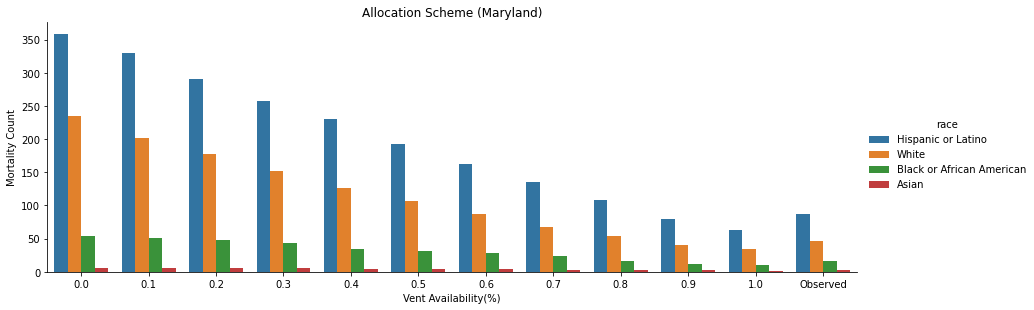

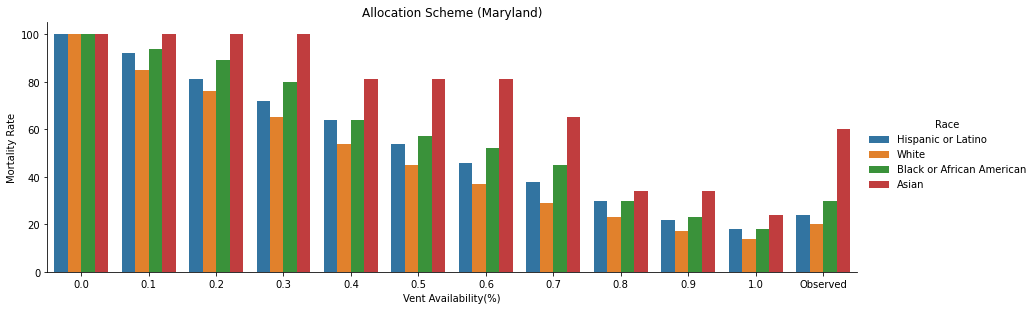

In [44]:
visualize_count_mortality(df_baseline_maryland, 'Maryland')
visualize_percentage_mortality(df_baseline_maryland, 'Maryland')

## Max Lives Years

In [45]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for pct in vent_availability_pct:
    print('------------------------------{}------------------------------'.format(round(pct, 1)))
    allocation = Allocation(df_sample, pct, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.max_life_years()                                         # Prioritize patients following Maryland CSC

    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])

    df_death.rename(columns={'race_display': 'race', 'expected_death': 'count_death'}, inplace=True)
    
    df_death['level'] = round(pct, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)

    ls_df_count_death_race.append(df_death)

df_max_lives_years = pd.concat(ls_df_count_death_race)
df_max_lives_years['type_allocation'] = 'Max Lives Years'
df_baseline_max_lives_years = pd.concat([death_race_baseline, df_max_lives_years])
df_baseline_max_lives_years[['count_death', 'avg_death', 'percentage_death']] = df_baseline_max_lives_years[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

------------------------------0.0------------------------------
Number of vents available: 0


<ipython-input-39-90e681612423>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs


SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20
13     4                      Asian      1
14     4  Black or African American      3
15     4         Hispanic or Latino     51
16     4                      White     30
17     5  Black or African American      5
18     5         Hispanic or Latino     31
19     5                      White     21
20     6                      Asian      1
21     6  Black or African American      9
22     6         Hispanic or Latino     27
23     6                      White     12
24     7                      Asian      1
25     7  Black or African American      3
26     7         Hispanic or Latino     17
27     7                      White     11
28     8  Black or African American      4
29     8         Hispanic or Latino     20
30     8                      White      6
31     9  Black or African American      1
32     9         Hispanic or Latino     21
33     9                      White     13
34    10                      Asian      1
35    10  Black or African American      1
36    10         Hispanic or Latino      7
37    10                      White      1
38    11  Black or African American      2
39    11         Hispanic or Latino     14
40    11                      White      3
41    12         Hispanic or Latino      8
42    13  Black or African American      2
43    13         Hispanic or Latino      2
44    13                      White      4
45    14                      White      1
46    15                      White      1
47    17                      White      1
48    19                      White      1

race_display  expected_death
0                      Asian               5
1  Black or African American              54
2         Hispanic or Latino             358
3                      White             235

------------------------------0.1------------------------------
Number of vents available: 65
Tie occurs
------------------------------TIE SOFA: 0------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------


race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      2          0.33   
1  Black or African American              1      4          0.67   
2         Hispanic or Latino              0     44          0.61   
3         Hispanic or Latino              1     28          0.39   
4                      White              0     27          0.45   
5                      White              1     33          0.55   

   P[D|NV] & P[D|V]  P[D_sub]  
0               1.0      0.33  
1               0.0      0.00  
2               1.0      0.61  
3               0.0      0.00  
4               1.0      0.45  
5               0.0      0.00

-----------------------TIE-----------------------


race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      2          0.33   
1  Black or African American              1      4          0.67   
2         Hispanic or Latino              0     44          0.61   
3         Hispanic or Latino              1     28          0.39   
4                      White              0     27          0.45   
5                      White              1     33          0.55   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               1.0      0.33        0.33            1.98  
1               0.0      0.00        0.33            1.98  
2               1.0      0.61        0.61           43.92  
3               0.0      0.00        0.61           43.92  
4               1.0      0.45        0.45           27.00  
5               0.0      0.00        0.45           27.00

SOFA               race_display  count
0      1  Black or African American      8
1      1         Hispanic or Latino     33
2      1                      White     33
3      2                      Asian      1
4      2  Black or African American      6
5      2         Hispanic or Latino     19
6      2                      White     17
7      3  Black or African American      4
8      3         Hispanic or Latino     36
9      3                      White     20
10     4                      Asian      1
11     4  Black or African American      3
12     4         Hispanic or Latino     51
13     4                      White     30
14     5  Black or African American      5
15     5         Hispanic or Latino     31
16     5                      White     21
17     6                      Asian      1
18     6  Black or African American      9
19     6         Hispanic or Latino     27
20     6                      White     12
21     7                      Asian      1
22     7  Black or African American      3
23     7         Hispanic or Latino     17
24     7                      White     11
25     8  Black or African American      4
26     8         Hispanic or Latino     20
27     8                      White      6
28     9  Black or African American      1
29     9         Hispanic or Latino     21
30     9                      White     13
31    10                      Asian      1
32    10  Black or African American      1
33    10         Hispanic or Latino      7
34    10                      White      1
35    11  Black or African American      2
36    11         Hispanic or Latino     14
37    11                      White      3
38    12         Hispanic or Latino      8
39    13  Black or African American      2
40    13         Hispanic or Latino      2
41    13                      White      4
42    14                      White      1
43    15                      White      1
44    17                      White      1
45    19                      White      1

-----------------------NOT ALLOCATED-----------------------


race_display  expected_death
0                      Asian               5
1  Black or African American              48
2         Hispanic or Latino             286
3                      White             175

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         5.00
1  Black or African American        49.98
3         Hispanic or Latino       329.92
5                      White       202.00

------------------------------0.2------------------------------
Number of vents available: 130
Tie occurs
------------------------------TIE SOFA: 0------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------


race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      6          1.00   
1         Hispanic or Latino              0      4          0.06   
2         Hispanic or Latino              1     68          0.94   
3                      White              0      4          0.07   
4                      White              1     56          0.93   

   P[D|NV] & P[D|V]  P[D_sub]  
0               0.0      0.00  
1               1.0      0.06  
2               0.0      0.00  
3               1.0      0.07  
4               0.0      0.00

-----------------------TIE-----------------------


race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      6          1.00   
1         Hispanic or Latino              0      4          0.06   
2         Hispanic or Latino              1     68          0.94   
3                      White              0      4          0.07   
4                      White              1     56          0.93   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               0.0      0.00        0.00            0.00  
1               1.0      0.06        0.06            4.32  
2               0.0      0.00        0.06            4.32  
3               1.0      0.07        0.07            4.20  
4               0.0      0.00        0.07            4.20

SOFA               race_display  count
0      1  Black or African American      8
1      1         Hispanic or Latino     33
2      1                      White     33
3      2                      Asian      1
4      2  Black or African American      6
5      2         Hispanic or Latino     19
6      2                      White     17
7      3  Black or African American      4
8      3         Hispanic or Latino     36
9      3                      White     20
10     4                      Asian      1
11     4  Black or African American      3
12     4         Hispanic or Latino     51
13     4                      White     30
14     5  Black or African American      5
15     5         Hispanic or Latino     31
16     5                      White     21
17     6                      Asian      1
18     6  Black or African American      9
19     6         Hispanic or Latino     27
20     6                      White     12
21     7                      Asian      1
22     7  Black or African American      3
23     7         Hispanic or Latino     17
24     7                      White     11
25     8  Black or African American      4
26     8         Hispanic or Latino     20
27     8                      White      6
28     9  Black or African American      1
29     9         Hispanic or Latino     21
30     9                      White     13
31    10                      Asian      1
32    10  Black or African American      1
33    10         Hispanic or Latino      7
34    10                      White      1
35    11  Black or African American      2
36    11         Hispanic or Latino     14
37    11                      White      3
38    12         Hispanic or Latino      8
39    13  Black or African American      2
40    13         Hispanic or Latino      2
41    13                      White      4
42    14                      White      1
43    15                      White      1
44    17                      White      1
45    19                      White      1

-----------------------NOT ALLOCATED-----------------------


race_display  expected_death
0                      Asian               5
1  Black or African American              48
2         Hispanic or Latino             286
3                      White             175

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         5.00
1  Black or African American        48.00
2         Hispanic or Latino       290.32
4                      White       179.20

------------------------------0.3------------------------------
Number of vents available: 195
Tie occurs
------------------------------TIE SOFA: 1------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
0                 28304            15    Male  Hispanic or Latino   
1                 26059            17  Female               White   
2                 27960            18  Female  Hispanic or Latino   
3                 39514            19  Female               White   
4                 11893            20  Female               White   
..                  ...           ...     ...                 ...   
133               35981            79  Female               White   
134               14186            84  Female               White   
135               35135            85  Female               White   
136               44135            86  Female  Hispanic or Latino   
137               35077            92    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78621         72500         10.5             75.93   
1             Insured     78738        129907          4.3             14.35   
2             Insured     78757         76716         11.9             83.68   
3             Insured     78616         54870         14.6             17.82   
4             Insured     78723         59197         17.7             96.23   
..                ...       ...           ...          ...               ...   
133           Insured     78644         57637         12.3              4.78   
134           Insured     78642         89213          6.8            110.70   
135           Insured     78759         85555          5.6             54.17   
136           Insured     78744         52345         18.9            110.95   
137           Insured     78653         73496         13.2            155.48   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                34.95     0                0                  0          85   
1                  NaN     0                1                  1          83   
2                  NaN     0                0                  0          82   
3                  NaN     0                0                  0          81   
4                  NaN     0                1                  1          80   
..                 ...   ...              ...                ...         ...   
133                NaN     0                1                  1          21   
134                NaN     0                1                  3          16   
135                NaN     0                1                  1          15   
136                NaN     0                1                  2          14   
137               0.25     0                1                  3           8   

    discharge_disposition_display  deceased_dt_tm  death  allocate_vent  
0                             NaN             NaN      0              1  
1                            Home             NaN      0              1  
2                            Home             NaN      0              1  
3                            Home             NaN      0              1  
4                            Home             NaN      0              1  
..                            ...             ...    ...            ...  
133                       Expired  7/8/2020 13:35      0              1  
134    Home Care with Home Health             NaN      0              1  
135    Home Care with Home Health             NaN      0              1  
136                          Home             NaN      0              1  
137    Home Care with Home Health             NaN      0              1  

[138 rows x 18 columns]

SOFA               race_display  count  mortality rate  expected_death
0     0  Black or African American      6             0.0             0.0
1     0         Hispanic or Latino     72             0.0             0.0
2     0                      White     60             0.0             0.0

race_display  expected_death
0  Black or African American             0.0
1         Hispanic or Latino             0.0
2                      White             0.0

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
138               13424             8  Female         Hispanic or Latino   
139               23727            14    Male         Hispanic or Latino   
140               13500            16  Female                      White   
141               15181            22    Male                      White   
142               41991            23  Female                      White   
..                  ...           ...     ...                        ...   
207               28080            90  Female         Hispanic or Latino   
208               26258            90  Female         Hispanic or Latino   
209               31330            92    Male                      White   
210               49276            93  Female         Hispanic or Latino   
211               38186           100  Female  Black or African American   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
138           Insured     76574         54060         12.7             25.40   
139           Insured     78664         75766           10             38.48   
140           Insured     78633         80117          3.4             30.25   
141           Insured     78132        106523          3.9             13.58   
142           Insured     78942         52637         13.3             52.05   
..                ...       ...           ...          ...               ...   
207           Insured     78741         45835         23.4            184.32   
208         Uninsured     78744         52345         18.9             28.72   
209           Insured     78610         80256          6.3            100.22   
210           Insured     78747         82811            5            255.57   
211           Insured     78722         72428          9.4             51.08   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
138                NaN     1                1                  2          92   
139                NaN     1                1                  1          86   
140                NaN     1                0                  0          84   
141                NaN     1                0                  0          78   
142                NaN     1                0                  0          77   
..                 ...   ...              ...                ...         ...   
207                NaN     1                1                  3          10   
208                NaN     1                1                  1          10   
209                NaN     1                1                  2           8   
210                NaN     1                1                  1           7   
211                NaN     1                1                  2           0   

    discharge_disposition_display    deceased_dt_tm  death  allocate_vent  
138                          Home               NaN      0              1  
139                          Home               NaN      0              1  
140                          Home               NaN      0              1  
141                          Home               NaN      0              1  
142                          Home               NaN      0              1  
..                            ...               ...    ...            ...  
207                       Expired   6/29/2020 15:57      0              0  
208                          Home               NaN      0              0  
209                       Expired  10/28/2020 12:59      0              0  
210                    Rehab Care               NaN      0              0  
211                       Expired   4/14/2020 16:17      0              0  

[74 rows x 18 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      2          0.25   
1  Black or African American              1      6          0.75   
2         Hispanic or Latino              0      6          0.18   
3         Hispanic or Latino              1     27          0.82   
4                      White              0      9          0.27   
5                      White              1     24          0.73   

   P[D|NV] & P[D|V]  P[D_sub]  
0               1.0      0.25  
1               0.0      0.00  
2               1.0      0.18  
3               0.0      0.00  
4               1.0      0.27  
5               0.0      0.00

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      2          0.25   
1  Black or African American              1      6          0.75   
2         Hispanic or Latino              0      6          0.18   
3         Hispanic or Latino              1     27          0.82   
4                      White              0      9          0.27   
5                      White              1     24          0.73   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               1.0      0.25        0.25            2.00  
1               0.0      0.00        0.25            2.00  
2               1.0      0.18        0.18            5.94  
3               0.0      0.00        0.18            5.94  
4               1.0      0.27        0.27            8.91  
5               0.0      0.00        0.27            8.91

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
212               33504             7    Male         Hispanic or Latino   
213               45331            20    Male         Hispanic or Latino   
214               14719            24    Male                      White   
215               28150            29    Male  Black or African American   
216               18668            30  Female  Black or African American   
..                  ...           ...     ...                        ...   
647               33570            71    Male         Hispanic or Latino   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
212           Insured     78744         52345         18.9             79.15   
213           Insured     78616         54870         14.6            139.30   
214         Uninsured     78701        122182         13.3             29.90   
215         Uninsured     78653         73496         13.2             41.20   
216           Insured     78723         59197         17.7             49.77   
..                ...       ...           ...          ...               ...   
647         Uninsured     79907         31784         27.6            494.30   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
212                NaN     2                1                  1          93   
213                NaN     2                1                  1          80   
214                NaN     2                0                  0          76   
215                NaN     2                1                  1          71   
216              38.93     2                1                  3          70   
..                 ...   ...              ...                ...         ...   
647             494.65    13                1                  2          29   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
212                          Home              NaN      0              0  
213                          Home              NaN      0              0  
214                          Home              NaN      0              0  
215                          Home              NaN      0              0  
216                          Home              NaN      0              0  
..                            ...              ...    ...            ...  
647                       Expired  11/18/2020 6:07      0              0  
648                           NaN              NaN      0              0  
649                       Expired  11/5/2020 16:40      0              0  
650                       Expired  11/5/2020 16:40      0              0  
651                       Expired  11/5/2020 16:40      0              0  

[440 rows x 18 columns]

SOFA               race_display  count
0      2                      Asian      1
1      2  Black or African American      6
2      2         Hispanic or Latino     19
3      2                      White     17
4      3  Black or African American      4
5      3         Hispanic or Latino     36
6      3                      White     20
7      4                      Asian      1
8      4  Black or African American      3
9      4         Hispanic or Latino     51
10     4                      White     30
11     5  Black or African American      5
12     5         Hispanic or Latino     31
13     5                      White     21
14     6                      Asian      1
15     6  Black or African American      9
16     6         Hispanic or Latino     27
17     6                      White     12
18     7                      Asian      1
19     7  Black or African American      3
20     7         Hispanic or Latino     17
21     7                      White     11
22     8  Black or African American      4
23     8         Hispanic or Latino     20
24     8                      White      6
25     9  Black or African American      1
26     9         Hispanic or Latino     21
27     9                      White     13
28    10                      Asian      1
29    10  Black or African American      1
30    10         Hispanic or Latino      7
31    10                      White      1
32    11  Black or African American      2
33    11         Hispanic or Latino     14
34    11                      White      3
35    12         Hispanic or Latino      8
36    13  Black or African American      2
37    13         Hispanic or Latino      2
38    13                      White      4
39    14                      White      1
40    15                      White      1
41    17                      White      1
42    19                      White      1

race_display  expected_death
0                      Asian               5
1  Black or African American              40
2         Hispanic or Latino             253
3                      White             142

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         5.00
1  Black or African American        42.00
3         Hispanic or Latino       258.94
5                      White       150.91

------------------------------0.4------------------------------
Number of vents available: 260
Tie occurs
------------------------------TIE SOFA: 3------------------------------
------------------------------MORTALITY PROBABILITY: 6.4------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
0                 28304            15    Male         Hispanic or Latino   
1                 26059            17  Female                      White   
2                 27960            18  Female         Hispanic or Latino   
3                 39514            19  Female                      White   
4                 11893            20  Female                      White   
..                  ...           ...     ...                        ...   
250               42442            78  Female         Hispanic or Latino   
251               11265            80  Female         Hispanic or Latino   
252               17180            88    Male                      White   
253               21784            89    Male  Black or African American   
254               12333            93  Female         Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78621         72500         10.5             75.93   
1             Insured     78738        129907          4.3             14.35   
2             Insured     78757         76716         11.9             83.68   
3             Insured     78616         54870         14.6             17.82   
4             Insured     78723         59197         17.7             96.23   
..                ...       ...           ...          ...               ...   
250           Insured     78611         58199         12.3            857.63   
251         Uninsured     78616         54870         14.6            374.32   
252           Insured     78621         72500         10.5            119.75   
253           Insured     78629         53783         15.8              4.37   
254           Insured     78702         65689         22.3             21.65   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                34.95     0                0                  0          85   
1                  NaN     0                1                  1          83   
2                  NaN     0                0                  0          82   
3                  NaN     0                0                  0          81   
4                  NaN     0                1                  1          80   
..                 ...   ...              ...                ...         ...   
250             827.35     2                0                  0          22   
251                NaN     2                1                  4          20   
252                NaN     2                1                  1          12   
253                NaN     2                1                  3          11   
254                NaN     2                1                  1           7   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                             NaN              NaN      0              1  
1                            Home              NaN      0              1  
2                            Home              NaN      0              1  
3                            Home              NaN      0              1  
4                            Home              NaN      0              1  
..                            ...              ...    ...            ...  
250                       Expired   8/9/2020 23:46      0              1  
251                          Home              NaN      0              1  
252                       Expired  5/29/2020 16:26      0              1  
253              Hospice Facility   9/5/2020 16:43      0              1  
254          Skilled Nursing Care              NaN      0              1  

[255 rows x 18 columns]

SOFA               race_display  count  mortality rate  expected_death
0     0  Black or African American      6           0.000            0.00
1     0         Hispanic or Latino     72           0.000            0.00
2     0                      White     60           0.000            0.00
3     1  Black or African American      8           0.000            0.00
4     1         Hispanic or Latino     33           0.000            0.00
5     1                      White     33           0.000            0.00
6     2                      Asian      1           0.064            0.06
7     2  Black or African American      6           0.064            0.38
8     2         Hispanic or Latino     19           0.064            1.22
9     2                      White     17           0.064            1.09

race_display  expected_death
0                      Asian            0.06
1  Black or African American            0.38
2         Hispanic or Latino            1.22
3                      White            1.09

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
255               30021             5  Female  Black or African American   
256               28472             8    Male         Hispanic or Latino   
257               14626            10    Male         Hispanic or Latino   
258               25279            10    Male                      White   
259               11869            26  Female         Hispanic or Latino   
260               43336            34    Male         Hispanic or Latino   
261               13648            39    Male         Hispanic or Latino   
262               32493            39  Female         Hispanic or Latino   
263               18447            40  Female                      White   
264               16369            40    Male         Hispanic or Latino   
265               44009            42    Male         Hispanic or Latino   
266               11330            43    Male         Hispanic or Latino   
267               23463            43    Male                      White   
268               49646            45  Female         Hispanic or Latino   
269               28503            45  Female  Black or African American   
270               34439            47    Male         Hispanic or Latino   
271               31898            48    Male         Hispanic or Latino   
272               47563            49    Male         Hispanic or Latino   
273               30292            50    Male         Hispanic or Latino   
274               10893            51    Male         Hispanic or Latino   
275               19432            54  Female                      White   
276               47329            54  Female         Hispanic or Latino   
277               21138            57    Male                      White   
278               11504            57    Male         Hispanic or Latino   
279               10779            58    Male         Hispanic or Latino   
280               41226            59  Female                      White   
281               18299            60  Female                      White   
282               23852            60  Female         Hispanic or Latino   
283               38915            61  Female         Hispanic or Latino   
284               39187            61    Male                      White   
285               32146            61  Female         Hispanic or Latino   
286               25093            63    Male         Hispanic or Latino   
287               18826            63    Male         Hispanic or Latino   
288               14070            63  Female         Hispanic or Latino   
289               22188            63  Female                      White   
290               36569            66    Male  Black or African American   
291               37448            66  Female         Hispanic or Latino   
292               43466            67    Male         Hispanic or Latino   
293               13039            67    Male                      White   
294               47284            68    Male         Hispanic or Latino   
295               35166            69  Female                      White   
296               12593            70    Male                      White   
297               40424            71    Male                      White   
298               37397            72  Female         Hispanic or Latino   
299               26915            73    Male  Black or African American   
300               11432            73    Male                      White   
301               15547            73  Female         Hispanic or Latino   
302               24269            74    Male         Hispanic or Latino   
303               45285            76  Female                      White   
304               46649            76    Male         Hispanic or Latino   
305               21690            76    Male         Hispanic or Latino   
306               14488            76  Female        

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      3          0.75   
1  Black or African American              1      1          0.25   
2         Hispanic or Latino              0     33          0.92   
3         Hispanic or Latino              1      3          0.08   
4                      White              0     19          0.95   
5                      White              1      1          0.05   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000   0.75000  
1             0.064   0.01600  
2             1.000   0.92000  
3             0.064   0.00512  
4             1.000   0.95000  
5             0.064   0.00320

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      3          0.75   
1  Black or African American              1      1          0.25   
2         Hispanic or Latino              0     33          0.92   
3         Hispanic or Latino              1      3          0.08   
4                      White              0     19          0.95   
5                      White              1      1          0.05   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000   0.75000     0.76600         3.06400  
1             0.064   0.01600     0.76600         3.06400  
2             1.000   0.92000     0.92512        33.30432  
3             0.064   0.00512     0.92512        33.30432  
4             1.000   0.95000     0.95320        19.06400  
5             0.064   0.00320     0.95320        19.06400

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
315               33220             0  Female  Hispanic or Latino   
316               15557            10    Male  Hispanic or Latino   
317               40112            17    Male               White   
318               38948            19  Female  Hispanic or Latino   
319               19621            24    Male               White   
..                  ...           ...     ...                 ...   
647               33570            71    Male  Hispanic or Latino   
648               17790            58    Male               White   
649               32723            74    Male               White   
650               32723            74    Male               White   
651               32723            74    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
315           Insured     78753         51053         17.6             17.80   
316           Insured     78724         50625         23.4            863.32   
317           Insured     78666         44159         27.9             36.95   
318           Insured     78664         75766           10            333.97   
319         Uninsured     78656         61913         18.2              7.56   
..                ...       ...           ...          ...               ...   
647         Uninsured     79907         31784         27.6            494.30   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
315                NaN     4                0                  0         100   
316            1059.40     4                1                  2          90   
317              28.52     4                1                  1          83   
318             240.33     4                1                  2          81   
319               1.27     4                0                  0          76   
..                 ...   ...              ...                ...         ...   
647             494.65    13                1                  2          29   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
315                          Home              NaN      0              0  
316                          Home              NaN      0              0  
317                          Home              NaN      0              0  
318                          Home              NaN      0              0  
319                          Home              NaN      0              0  
..                            ...              ...    ...            ...  
647                       Expired  11/18/2020 6:07      0              0  
648                           NaN              NaN      0              0  
649                       Expired  11/5/2020 16:40      0              0  
650                       Expired  11/5/2020 16:40      0              0  
651                       Expired  11/5/2020 16:40      0              0  

[337 rows x 18 columns]

SOFA               race_display  count
0      4                      Asian      1
1      4  Black or African American      3
2      4         Hispanic or Latino     51
3      4                      White     30
4      5  Black or African American      5
5      5         Hispanic or Latino     31
6      5                      White     21
7      6                      Asian      1
8      6  Black or African American      9
9      6         Hispanic or Latino     27
10     6                      White     12
11     7                      Asian      1
12     7  Black or African American      3
13     7         Hispanic or Latino     17
14     7                      White     11
15     8  Black or African American      4
16     8         Hispanic or Latino     20
17     8                      White      6
18     9  Black or African American      1
19     9         Hispanic or Latino     21
20     9                      White     13
21    10                      Asian      1
22    10  Black or African American      1
23    10         Hispanic or Latino      7
24    10                      White      1
25    11  Black or African American      2
26    11         Hispanic or Latino     14
27    11                      White      3
28    12         Hispanic or Latino      8
29    13  Black or African American      2
30    13         Hispanic or Latino      2
31    13                      White      4
32    14                      White      1
33    15                      White      1
34    17                      White      1
35    19                      White      1

race_display  expected_death
0                      Asian               4
1  Black or African American              30
2         Hispanic or Latino             198
3                      White             105

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      4.06000
1  Black or African American     33.44400
3         Hispanic or Latino    232.52432
5                      White    125.15400

------------------------------0.5------------------------------
Number of vents available: 326
Tie occurs
------------------------------TIE SOFA: 4------------------------------
------------------------------MORTALITY PROBABILITY: 20.2------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
0                 28304            15    Male  Hispanic or Latino   
1                 26059            17  Female               White   
2                 27960            18  Female  Hispanic or Latino   
3                 39514            19  Female               White   
4                 11893            20  Female               White   
..                  ...           ...     ...                 ...   
310               13106            83    Male  Hispanic or Latino   
311               16005            86    Male  Hispanic or Latino   
312               17170            88  Female  Hispanic or Latino   
313               31541            93  Female               White   
314               26729            95  Female               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78621         72500         10.5             75.93   
1             Insured     78738        129907          4.3             14.35   
2             Insured     78757         76716         11.9             83.68   
3             Insured     78616         54870         14.6             17.82   
4             Insured     78723         59197         17.7             96.23   
..                ...       ...           ...          ...               ...   
310           Insured     77988         52794          8.6            288.12   
311           Insured     78758         55074         18.1             15.70   
312           Insured     78664         75766           10             17.55   
313           Insured     78654         54034         11.4             50.63   
314           Insured     78731         94851            9             59.48   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                34.95     0                0                  0          85   
1                  NaN     0                1                  1          83   
2                  NaN     0                0                  0          82   
3                  NaN     0                0                  0          81   
4                  NaN     0                1                  1          80   
..                 ...   ...              ...                ...         ...   
310             288.35     3                1                  1          17   
311                NaN     3                1                  1          14   
312                NaN     3                1                  1          12   
313                NaN     3                1                  2           7   
314                NaN     3                1                  2           5   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                             NaN              NaN      0              1  
1                            Home              NaN      0              1  
2                            Home              NaN      0              1  
3                            Home              NaN      0              1  
4                            Home              NaN      0              1  
..                            ...              ...    ...            ...  
310                       Expired  7/19/2020 18:10      0              1  
311    Home Care with Home Health              NaN      0              1  
312          Skilled Nursing Care              NaN      0              1  
313                       Expired  7/12/2020 18:30      0              1  
314                       Expired   7/1/2020 22:10      0              1  

[315 rows x 18 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28

race_display  expected_death
0                      Asian            0.06
1  Black or African American            0.64
2         Hispanic or Latino            3.52
3                      White            2.37

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
315               33220             0  Female  Hispanic or Latino   
316               15557            10    Male  Hispanic or Latino   
317               40112            17    Male               White   
318               38948            19  Female  Hispanic or Latino   
319               19621            24    Male               White   
..                  ...           ...     ...                 ...   
395               38013            84    Male  Hispanic or Latino   
396               40942            84    Male  Hispanic or Latino   
397               23243            85  Female               White   
398               24640            87  Female               White   
399               22985            90    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
315           Insured     78753         51053         17.6             17.80   
316           Insured     78724         50625         23.4            863.32   
317           Insured     78666         44159         27.9             36.95   
318           Insured     78664         75766           10            333.97   
319         Uninsured     78656         61913         18.2              7.56   
..                ...       ...           ...          ...               ...   
395           Insured     78702         65689         22.3            133.87   
396           Insured     78629         53783         15.8            164.15   
397           Insured     78704         75233         12.3             95.10   
398           Insured     78602         63592         10.1             29.27   
399           Insured     78606         52594         11.1             23.13   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
315                NaN     4                0                  0         100   
316            1059.40     4                1                  2          90   
317              28.52     4                1                  1          83   
318             240.33     4                1                  2          81   
319               1.27     4                0                  0          76   
..                 ...   ...              ...                ...         ...   
395             111.55     4                1                  1          16   
396                NaN     4                1                  2          16   
397                NaN     4                1                  2          15   
398                NaN     4                1                  3          13   
399                NaN     4                0                  0          10   

    discharge_disposition_display  deceased_dt_tm  death  allocate_vent  
315                          Home             NaN      0              1  
316                          Home             NaN      0              1  
317                          Home             NaN      0              1  
318                          Home             NaN      0              1  
319                          Home             NaN      0              1  
..                            ...             ...    ...            ...  
395          Skilled Nursing Care             NaN      0              0  
396       Long Term Care Hospital             NaN      0              0  
397                       Expired  6/24/2020 7:07      0              0  
398                       Expired  8/19/2020 9:38      0              0  
399               Still a patient             NaN      0              0  

[85 rows x 18 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1          1.00   
1  Black or African American              0      2          0.67   
2  Black or African American              1      1          0.33   
3         Hispanic or Latino              0     43          0.84   
4         Hispanic or Latino              1      8          0.16   
5                      White              0     28          0.93   
6                      White              1      2          0.07   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000   1.00000  
1             1.000   0.67000  
2             0.202   0.06666  
3             1.000   0.84000  
4             0.202   0.03232  
5             1.000   0.93000  
6             0.202   0.01414

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1          1.00   
1  Black or African American              0      2          0.67   
2  Black or African American              1      1          0.33   
3         Hispanic or Latino              0     43          0.84   
4         Hispanic or Latino              1      8          0.16   
5                      White              0     28          0.93   
6                      White              1      2          0.07   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000   1.00000     1.00000         1.00000  
1             1.000   0.67000     0.73666         2.20998  
2             0.202   0.06666     0.73666         2.20998  
3             1.000   0.84000     0.87232        44.48832  
4             0.202   0.03232     0.87232        44.48832  
5             1.000   0.93000     0.94414        28.32420  
6             0.202   0.01414     0.94414        28.32420

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
400               42071            17    Male  Hispanic or Latino   
401               14658            23    Male  Hispanic or Latino   
402               41743            25    Male  Hispanic or Latino   
403               49941            29  Female               White   
404               12184            32    Male  Hispanic or Latino   
..                  ...           ...     ...                 ...   
647               33570            71    Male  Hispanic or Latino   
648               17790            58    Male               White   
649               32723            74    Male               White   
650               32723            74    Male               White   
651               32723            74    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
400           Insured     78704         75233         12.3            684.56   
401           Insured     78613        104308          4.8             47.32   
402           Insured     78634         84237          8.7            172.65   
403           Insured     78634         84237          8.7            789.70   
404           Insured     78644         57637         12.3            980.38   
..                ...       ...           ...          ...               ...   
647         Uninsured     79907         31784         27.6            494.30   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
400             454.23     5                1                  1          83   
401              21.08     5                0                  0          77   
402              39.05     5                0                  0          75   
403             775.33     5                0                  0          71   
404            1186.03     5                0                  0          68   
..                 ...   ...              ...                ...         ...   
647             494.65    13                1                  2          29   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
400                          Home              NaN      0              0  
401                          Home              NaN      0              0  
402                          Home              NaN      0              0  
403              Another Hospital              NaN      0              0  
404       Long Term Care Hospital              NaN      0              0  
..                            ...              ...    ...            ...  
647                       Expired  11/18/2020 6:07      0              0  
648                           NaN              NaN      0              0  
649                       Expired  11/5/2020 16:40      0              0  
650                       Expired  11/5/2020 16:40      0              0  
651                       Expired  11/5/2020 16:40      0              0  

[252 rows x 18 columns]

SOFA               race_display  count
0      5  Black or African American      5
1      5         Hispanic or Latino     31
2      5                      White     21
3      6                      Asian      1
4      6  Black or African American      9
5      6         Hispanic or Latino     27
6      6                      White     12
7      7                      Asian      1
8      7  Black or African American      3
9      7         Hispanic or Latino     17
10     7                      White     11
11     8  Black or African American      4
12     8         Hispanic or Latino     20
13     8                      White      6
14     9  Black or African American      1
15     9         Hispanic or Latino     21
16     9                      White     13
17    10                      Asian      1
18    10  Black or African American      1
19    10         Hispanic or Latino      7
20    10                      White      1
21    11  Black or African American      2
22    11         Hispanic or Latino     14
23    11                      White      3
24    12         Hispanic or Latino      8
25    13  Black or African American      2
26    13         Hispanic or Latino      2
27    13                      White      4
28    14                      White      1
29    15                      White      1
30    17                      White      1
31    19                      White      1

race_display  expected_death
0                      Asian               3
1  Black or African American              27
2         Hispanic or Latino             147
3                      White              75

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      4.06000
1  Black or African American     29.84998
3         Hispanic or Latino    195.00832
5                      White    105.69420

------------------------------0.6------------------------------
Number of vents available: 391
Tie occurs
------------------------------TIE SOFA: 4------------------------------
------------------------------MORTALITY PROBABILITY: 20.2------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
0                 28304            15    Male  Hispanic or Latino   
1                 26059            17  Female               White   
2                 27960            18  Female  Hispanic or Latino   
3                 39514            19  Female               White   
4                 11893            20  Female               White   
..                  ...           ...     ...                 ...   
310               13106            83    Male  Hispanic or Latino   
311               16005            86    Male  Hispanic or Latino   
312               17170            88  Female  Hispanic or Latino   
313               31541            93  Female               White   
314               26729            95  Female               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78621         72500         10.5             75.93   
1             Insured     78738        129907          4.3             14.35   
2             Insured     78757         76716         11.9             83.68   
3             Insured     78616         54870         14.6             17.82   
4             Insured     78723         59197         17.7             96.23   
..                ...       ...           ...          ...               ...   
310           Insured     77988         52794          8.6            288.12   
311           Insured     78758         55074         18.1             15.70   
312           Insured     78664         75766           10             17.55   
313           Insured     78654         54034         11.4             50.63   
314           Insured     78731         94851            9             59.48   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                34.95     0                0                  0          85   
1                  NaN     0                1                  1          83   
2                  NaN     0                0                  0          82   
3                  NaN     0                0                  0          81   
4                  NaN     0                1                  1          80   
..                 ...   ...              ...                ...         ...   
310             288.35     3                1                  1          17   
311                NaN     3                1                  1          14   
312                NaN     3                1                  1          12   
313                NaN     3                1                  2           7   
314                NaN     3                1                  2           5   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                             NaN              NaN      0              1  
1                            Home              NaN      0              1  
2                            Home              NaN      0              1  
3                            Home              NaN      0              1  
4                            Home              NaN      0              1  
..                            ...              ...    ...            ...  
310                       Expired  7/19/2020 18:10      0              1  
311    Home Care with Home Health              NaN      0              1  
312          Skilled Nursing Care              NaN      0              1  
313                       Expired  7/12/2020 18:30      0              1  
314                       Expired   7/1/2020 22:10      0              1  

[315 rows x 18 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28

race_display  expected_death
0                      Asian            0.06
1  Black or African American            0.64
2         Hispanic or Latino            3.52
3                      White            2.37

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
315               33220             0  Female  Hispanic or Latino   
316               15557            10    Male  Hispanic or Latino   
317               40112            17    Male               White   
318               38948            19  Female  Hispanic or Latino   
319               19621            24    Male               White   
..                  ...           ...     ...                 ...   
395               38013            84    Male  Hispanic or Latino   
396               40942            84    Male  Hispanic or Latino   
397               23243            85  Female               White   
398               24640            87  Female               White   
399               22985            90    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
315           Insured     78753         51053         17.6             17.80   
316           Insured     78724         50625         23.4            863.32   
317           Insured     78666         44159         27.9             36.95   
318           Insured     78664         75766           10            333.97   
319         Uninsured     78656         61913         18.2              7.56   
..                ...       ...           ...          ...               ...   
395           Insured     78702         65689         22.3            133.87   
396           Insured     78629         53783         15.8            164.15   
397           Insured     78704         75233         12.3             95.10   
398           Insured     78602         63592         10.1             29.27   
399           Insured     78606         52594         11.1             23.13   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
315                NaN     4                0                  0         100   
316            1059.40     4                1                  2          90   
317              28.52     4                1                  1          83   
318             240.33     4                1                  2          81   
319               1.27     4                0                  0          76   
..                 ...   ...              ...                ...         ...   
395             111.55     4                1                  1          16   
396                NaN     4                1                  2          16   
397                NaN     4                1                  2          15   
398                NaN     4                1                  3          13   
399                NaN     4                0                  0          10   

    discharge_disposition_display  deceased_dt_tm  death  allocate_vent  
315                          Home             NaN      0              1  
316                          Home             NaN      0              1  
317                          Home             NaN      0              1  
318                          Home             NaN      0              1  
319                          Home             NaN      0              1  
..                            ...             ...    ...            ...  
395          Skilled Nursing Care             NaN      0              0  
396       Long Term Care Hospital             NaN      0              0  
397                       Expired  6/24/2020 7:07      0              0  
398                       Expired  8/19/2020 9:38      0              0  
399               Still a patient             NaN      0              0  

[85 rows x 18 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              1      1          1.00   
1  Black or African American              1      3          1.00   
2         Hispanic or Latino              0      4          0.08   
3         Hispanic or Latino              1     47          0.92   
4                      White              0      5          0.17   
5                      White              1     25          0.83   

   P[D|NV] & P[D|V]  P[D_sub]  
0             0.202   0.20200  
1             0.202   0.20200  
2             1.000   0.08000  
3             0.202   0.18584  
4             1.000   0.17000  
5             0.202   0.16766

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              1      1          1.00   
1  Black or African American              1      3          1.00   
2         Hispanic or Latino              0      4          0.08   
3         Hispanic or Latino              1     47          0.92   
4                      White              0      5          0.17   
5                      White              1     25          0.83   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             0.202   0.20200     0.20200         0.20200  
1             0.202   0.20200     0.20200         0.60600  
2             1.000   0.08000     0.26584        13.55784  
3             0.202   0.18584     0.26584        13.55784  
4             1.000   0.17000     0.33766        10.12980  
5             0.202   0.16766     0.33766        10.12980

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
400               42071            17    Male  Hispanic or Latino   
401               14658            23    Male  Hispanic or Latino   
402               41743            25    Male  Hispanic or Latino   
403               49941            29  Female               White   
404               12184            32    Male  Hispanic or Latino   
..                  ...           ...     ...                 ...   
647               33570            71    Male  Hispanic or Latino   
648               17790            58    Male               White   
649               32723            74    Male               White   
650               32723            74    Male               White   
651               32723            74    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
400           Insured     78704         75233         12.3            684.56   
401           Insured     78613        104308          4.8             47.32   
402           Insured     78634         84237          8.7            172.65   
403           Insured     78634         84237          8.7            789.70   
404           Insured     78644         57637         12.3            980.38   
..                ...       ...           ...          ...               ...   
647         Uninsured     79907         31784         27.6            494.30   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
400             454.23     5                1                  1          83   
401              21.08     5                0                  0          77   
402              39.05     5                0                  0          75   
403             775.33     5                0                  0          71   
404            1186.03     5                0                  0          68   
..                 ...   ...              ...                ...         ...   
647             494.65    13                1                  2          29   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
400                          Home              NaN      0              0  
401                          Home              NaN      0              0  
402                          Home              NaN      0              0  
403              Another Hospital              NaN      0              0  
404       Long Term Care Hospital              NaN      0              0  
..                            ...              ...    ...            ...  
647                       Expired  11/18/2020 6:07      0              0  
648                           NaN              NaN      0              0  
649                       Expired  11/5/2020 16:40      0              0  
650                       Expired  11/5/2020 16:40      0              0  
651                       Expired  11/5/2020 16:40      0              0  

[252 rows x 18 columns]

SOFA               race_display  count
0      5  Black or African American      5
1      5         Hispanic or Latino     31
2      5                      White     21
3      6                      Asian      1
4      6  Black or African American      9
5      6         Hispanic or Latino     27
6      6                      White     12
7      7                      Asian      1
8      7  Black or African American      3
9      7         Hispanic or Latino     17
10     7                      White     11
11     8  Black or African American      4
12     8         Hispanic or Latino     20
13     8                      White      6
14     9  Black or African American      1
15     9         Hispanic or Latino     21
16     9                      White     13
17    10                      Asian      1
18    10  Black or African American      1
19    10         Hispanic or Latino      7
20    10                      White      1
21    11  Black or African American      2
22    11         Hispanic or Latino     14
23    11                      White      3
24    12         Hispanic or Latino      8
25    13  Black or African American      2
26    13         Hispanic or Latino      2
27    13                      White      4
28    14                      White      1
29    15                      White      1
30    17                      White      1
31    19                      White      1

race_display  expected_death
0                      Asian               3
1  Black or African American              27
2         Hispanic or Latino             147
3                      White              75

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      3.26200
1  Black or African American     28.24600
2         Hispanic or Latino    164.07784
4                      White     87.49980

------------------------------0.7------------------------------
Number of vents available: 456
Tie occurs
------------------------------TIE SOFA: 5------------------------------
------------------------------MORTALITY PROBABILITY: 20.2------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
0                 28304            15    Male  Hispanic or Latino   
1                 26059            17  Female               White   
2                 27960            18  Female  Hispanic or Latino   
3                 39514            19  Female               White   
4                 11893            20  Female               White   
..                  ...           ...     ...                 ...   
395               38013            84    Male  Hispanic or Latino   
396               40942            84    Male  Hispanic or Latino   
397               23243            85  Female               White   
398               24640            87  Female               White   
399               22985            90    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78621         72500         10.5             75.93   
1             Insured     78738        129907          4.3             14.35   
2             Insured     78757         76716         11.9             83.68   
3             Insured     78616         54870         14.6             17.82   
4             Insured     78723         59197         17.7             96.23   
..                ...       ...           ...          ...               ...   
395           Insured     78702         65689         22.3            133.87   
396           Insured     78629         53783         15.8            164.15   
397           Insured     78704         75233         12.3             95.10   
398           Insured     78602         63592         10.1             29.27   
399           Insured     78606         52594         11.1             23.13   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                34.95     0                0                  0          85   
1                  NaN     0                1                  1          83   
2                  NaN     0                0                  0          82   
3                  NaN     0                0                  0          81   
4                  NaN     0                1                  1          80   
..                 ...   ...              ...                ...         ...   
395             111.55     4                1                  1          16   
396                NaN     4                1                  2          16   
397                NaN     4                1                  2          15   
398                NaN     4                1                  3          13   
399                NaN     4                0                  0          10   

    discharge_disposition_display  deceased_dt_tm  death  allocate_vent  
0                             NaN             NaN      0              1  
1                            Home             NaN      0              1  
2                            Home             NaN      0              1  
3                            Home             NaN      0              1  
4                            Home             NaN      0              1  
..                            ...             ...    ...            ...  
395          Skilled Nursing Care             NaN      0              1  
396       Long Term Care Hospital             NaN      0              1  
397                       Expired  6/24/2020 7:07      0              1  
398                       Expired  8/19/2020 9:38      0              1  
399               Still a patient             NaN      0              1  

[400 rows x 18 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06

race_display  expected_death
0                      Asian            0.26
1  Black or African American            1.25
2         Hispanic or Latino           13.82
3                      White            8.43

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
400               42071            17    Male         Hispanic or Latino   
401               14658            23    Male         Hispanic or Latino   
402               41743            25    Male         Hispanic or Latino   
403               49941            29  Female                      White   
404               12184            32    Male         Hispanic or Latino   
405               33605            34  Female                      White   
406               18688            36    Male         Hispanic or Latino   
407               35588            44    Male                      White   
408               41939            44  Female         Hispanic or Latino   
409               42765            45  Female                      White   
410               32640            47    Male         Hispanic or Latino   
411               32465            48  Female         Hispanic or Latino   
412               31072            50    Male                      White   
413               42434            51    Male                      White   
414               28057            53    Male         Hispanic or Latino   
415               33186            53    Male         Hispanic or Latino   
416               23892            54    Male                      White   
417               42281            54  Female         Hispanic or Latino   
418               31875            54    Male         Hispanic or Latino   
419               43358            54    Male         Hispanic or Latino   
420               28487            55    Male         Hispanic or Latino   
421               14668            55  Female         Hispanic or Latino   
422               38165            56  Female                      White   
423               24609            57    Male                      White   
424               18913            58    Male         Hispanic or Latino   
425               10732            58    Male  Black or African American   
426               15748            58    Male                      White   
427               22494            61    Male         Hispanic or Latino   
428               33974            61    Male                      White   
429               33974            61    Male                      White   
430               18200            62    Male         Hispanic or Latino   
431               25093            63    Male         Hispanic or Latino   
432               19251            64    Male         Hispanic or Latino   
433               18465            66    Male                      White   
434               41027            66  Female         Hispanic or Latino   
435               15875            67    Male  Black or African American   
436               40226            68    Male         Hispanic or Latino   
437               46659            69    Male         Hispanic or Latino   
438               35136            69  Female  Black or African American   
439               37531            70  Female         Hispanic or Latino   
440               41967            70    Male         Hispanic or Latino   
441               43894            71    Male         Hispanic or Latino   
442               11759            71    Male                      White   
443               17424            72    Male                      White   
444               12691            72  Female                      White   
445               30090            73  Female                      White   
446               19159            74  Female                      White   
447               15722            74    Male         Hispanic or Latino   
448               36761            75    Male         Hispanic or Latino   
449               31660            75  Female                      White   
450               33942            82  Female         Hispanic or Latino   
451               16388            83  Female        

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      5          1.00   
1         Hispanic or Latino              1     31          1.00   
2                      White              0      1          0.05   
3                      White              1     20          0.95   

   P[D|NV] & P[D|V]  P[D_sub]  
0             0.202    0.2020  
1             0.202    0.2020  
2             1.000    0.0500  
3             0.202    0.1919

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      5          1.00   
1         Hispanic or Latino              1     31          1.00   
2                      White              0      1          0.05   
3                      White              1     20          0.95   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             0.202    0.2020      0.2020          1.0100  
1             0.202    0.2020      0.2020          6.2620  
2             1.000    0.0500      0.2419          5.0799  
3             0.202    0.1919      0.2419          5.0799

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit gender               race_display  \
457               35901            18   Male         Hispanic or Latino   
458               35114            25   Male         Hispanic or Latino   
459               26025            28   Male  Black or African American   
460               35282            30   Male         Hispanic or Latino   
461               31965            42   Male                      White   
..                  ...           ...    ...                        ...   
647               33570            71   Male         Hispanic or Latino   
648               17790            58   Male                      White   
649               32723            74   Male                      White   
650               32723            74   Male                      White   
651               32723            74   Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
457           Insured     78753         51053         17.6            186.75   
458           Insured     78621         72500         10.5             72.70   
459         Uninsured     78723         59197         17.7             53.73   
460           Insured     78753         51053         17.6            227.40   
461           Insured     78741         45835         23.4            592.99   
..                ...       ...           ...          ...               ...   
647         Uninsured     79907         31784         27.6            494.30   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
457               2.85     6                0                  0          82   
458              69.42     6                1                  1          75   
459              19.15     6                0                  0          72   
460             226.17     6                0                  0          70   
461             503.03     6                1                  3          58   
..                 ...   ...              ...                ...         ...   
647             494.65    13                1                  2          29   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
457                          Home              NaN      0              0  
458              Another Hospital   6/23/2020 2:39      0              0  
459                          Home              NaN      0              0  
460                       Expired  7/25/2020 18:57      0              0  
461       Long Term Care Hospital              NaN      0              0  
..                            ...              ...    ...            ...  
647                       Expired  11/18/2020 6:07      0              0  
648                           NaN              NaN      0              0  
649                       Expired  11/5/2020 16:40      0              0  
650                       Expired  11/5/2020 16:40      0              0  
651                       Expired  11/5/2020 16:40      0              0  

[195 rows x 18 columns]

SOFA               race_display  count
0      6                      Asian      1
1      6  Black or African American      9
2      6         Hispanic or Latino     27
3      6                      White     12
4      7                      Asian      1
5      7  Black or African American      3
6      7         Hispanic or Latino     17
7      7                      White     11
8      8  Black or African American      4
9      8         Hispanic or Latino     20
10     8                      White      6
11     9  Black or African American      1
12     9         Hispanic or Latino     21
13     9                      White     13
14    10                      Asian      1
15    10  Black or African American      1
16    10         Hispanic or Latino      7
17    10                      White      1
18    11  Black or African American      2
19    11         Hispanic or Latino     14
20    11                      White      3
21    12         Hispanic or Latino      8
22    13  Black or African American      2
23    13         Hispanic or Latino      2
24    13                      White      4
25    14                      White      1
26    15                      White      1
27    17                      White      1
28    19                      White      1

race_display  expected_death
0                      Asian               3
1  Black or African American              22
2         Hispanic or Latino             116
3                      White              54

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian       3.2600
1  Black or African American      24.2600
2         Hispanic or Latino     136.0820
3                      White      67.5099

------------------------------0.8------------------------------
Number of vents available: 521
Tie occurs
------------------------------TIE SOFA: 7------------------------------
------------------------------MORTALITY PROBABILITY: 21.5------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
0                 28304            15    Male  Hispanic or Latino   
1                 26059            17  Female               White   
2                 27960            18  Female  Hispanic or Latino   
3                 39514            19  Female               White   
4                 11893            20  Female               White   
..                  ...           ...     ...                 ...   
501               37626            85  Female  Hispanic or Latino   
502               22455            85  Female  Hispanic or Latino   
503               22455            85  Female  Hispanic or Latino   
504               15456            87  Female               White   
505               37782            90  Female               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78621         72500         10.5             75.93   
1             Insured     78738        129907          4.3             14.35   
2             Insured     78757         76716         11.9             83.68   
3             Insured     78616         54870         14.6             17.82   
4             Insured     78723         59197         17.7             96.23   
..                ...       ...           ...          ...               ...   
501           Insured     78723         59197         17.7            310.20   
502           Insured     78724         50625         23.4             44.95   
503           Insured     78724         50625         23.4             44.95   
504           Insured     78703        108548          4.8            177.15   
505           Insured     78703        108548          4.8            376.50   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                34.95     0                0                  0          85   
1                  NaN     0                1                  1          83   
2                  NaN     0                0                  0          82   
3                  NaN     0                0                  0          81   
4                  NaN     0                1                  1          80   
..                 ...   ...              ...                ...         ...   
501             255.48     6                1                  4          15   
502              16.97     6                1                  2          15   
503              16.97     6                1                  2          15   
504             180.52     6                1                  3          13   
505                NaN     6                1                  1          10   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                             NaN              NaN      0              1  
1                            Home              NaN      0              1  
2                            Home              NaN      0              1  
3                            Home              NaN      0              1  
4                            Home              NaN      0              1  
..                            ...              ...    ...            ...  
501                       Expired  4/15/2020 10:35      0              1  
502                       Expired    9/5/2020 9:45      0              1  
503                       Expired    9/5/2020 9:45      0              1  
504                       Expired  7/28/2020 18:15      0              1  
505             Intermediate Care              NaN      0              1  

[506 rows x 18 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06
17     5  Black or African American      5           0.202            1.01
18     5         Hispanic or Latino     31           0.202            6.26
19     5                      White     21           0.202            4.24
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     27           0.215            5.80
23     6                      White     12           0.215            2.58

race_display  expected_death
0                      Asian            0.48
1  Black or African American            4.20
2         Hispanic or Latino           25.88
3                      White           15.25

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
506               17498            27  Female         Hispanic or Latino   
507               45756            28    Male  Black or African American   
508               25299            34    Male                      Asian   
509               19424            42  Female         Hispanic or Latino   
510               14391            46    Male         Hispanic or Latino   
511               27145            47  Female         Hispanic or Latino   
512               45991            48    Male                      White   
513               41628            49    Male                      White   
514               43747            53    Male         Hispanic or Latino   
515               48179            54  Female         Hispanic or Latino   
516               38028            54  Female         Hispanic or Latino   
517               28935            54  Female                      White   
518               20496            56  Female         Hispanic or Latino   
519               16059            56    Male         Hispanic or Latino   
520               35200            57  Female         Hispanic or Latino   
521               32542            59  Female         Hispanic or Latino   
522               27780            60    Male         Hispanic or Latino   
523               15030            60    Male         Hispanic or Latino   
524               42865            60    Male         Hispanic or Latino   
525               26312            61    Male                      White   
526               30432            63    Male         Hispanic or Latino   
527               20647            65    Male                      White   
528               32616            66  Female         Hispanic or Latino   
529               36295            68  Female                      White   
530               38255            68    Male  Black or African American   
531               42304            69    Male  Black or African American   
532               30090            73  Female                      White   
533               38481            73    Male                      White   
534               12540            73  Female                      White   
535               33426            75  Female                      White   
536               45929            78  Female         Hispanic or Latino   
537               37953            79  Female                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
506           Insured     78654         54034         11.4            327.87   
507           Insured     78701        122182         13.3            195.65   
508           Insured     78741         45835         23.4            199.00   
509         Uninsured     78748         76909          9.2            507.53   
510           Insured     78640         75689          9.1            322.47   
511           Insured     78753         51053         17.6            176.50   
512           Insured     78626         71638          9.7             95.42   
513           Insured     78741         45835         23.4           2173.57   
514         Uninsured     78724         50625         23.4            805.53   
515         Uninsured     78753         51053         17.6            143.81   
516           Insured     78744         52345         18.9            619.10   
517           Insured     78759         85555          5.6             72.68   
518           Insured     78602         63592         10.1             89.13   
519         Uninsured     76578         70406            8            166.90   
520           Insured     78753         51053         17.6            409.63   
521           Insured     78640         75689          9.1            287.43   
522           Insured     78741         45835         23.4             28.75   
523           Insured     78741         45835         23

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              1      1          1.00   
1  Black or African American              0      2          0.67   
2  Black or African American              1      1          0.33   
3         Hispanic or Latino              0      7          0.41   
4         Hispanic or Latino              1     10          0.59   
5                      White              0      8          0.73   
6                      White              1      3          0.27   

   P[D|NV] & P[D|V]  P[D_sub]  
0             0.215   0.21500  
1             1.000   0.67000  
2             0.215   0.07095  
3             1.000   0.41000  
4             0.215   0.12685  
5             1.000   0.73000  
6             0.215   0.05805

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              1      1          1.00   
1  Black or African American              0      2          0.67   
2  Black or African American              1      1          0.33   
3         Hispanic or Latino              0      7          0.41   
4         Hispanic or Latino              1     10          0.59   
5                      White              0      8          0.73   
6                      White              1      3          0.27   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             0.215   0.21500     0.21500         0.21500  
1             1.000   0.67000     0.74095         2.22285  
2             0.215   0.07095     0.74095         2.22285  
3             1.000   0.41000     0.53685         9.12645  
4             0.215   0.12685     0.53685         9.12645  
5             1.000   0.73000     0.78805         8.66855  
6             0.215   0.05805     0.78805         8.66855

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender        race_display  \
538               19753            37    Male               White   
539               46058            37    Male  Hispanic or Latino   
540               34789            45  Female  Hispanic or Latino   
541               14844            46    Male  Hispanic or Latino   
542               33844            47    Male  Hispanic or Latino   
..                  ...           ...     ...                 ...   
647               33570            71    Male  Hispanic or Latino   
648               17790            58    Male               White   
649               32723            74    Male               White   
650               32723            74    Male               White   
651               32723            74    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
538           Insured     78758         55074         18.1            450.15   
539           Insured     78752         48454         20.3            301.28   
540           Insured     78660         88204            6            455.67   
541         Uninsured     78610         80256          6.3           2691.02   
542           Insured     78626         71638          9.7           1390.53   
..                ...       ...           ...          ...               ...   
647         Uninsured     79907         31784         27.6            494.30   
648           Insured     78639         48787          9.9            318.77   
649           Insured     78753         51053         17.6             30.60   
650           Insured     78753         51053         17.6             30.60   
651           Insured     78753         51053         17.6             30.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
538                NaN     8                0                  0          63   
539             242.42     8                1                  2          63   
540             474.57     8                1                  1          55   
541            2207.33     8                1                  1          54   
542            1182.34     8                1                  2          53   
..                 ...   ...              ...                ...         ...   
647             494.65    13                1                  2          29   
648             233.28    14                1                  1          42   
649              18.44    15                1                  2          26   
650              18.44    17                1                  2          26   
651              18.44    19                1                  2          26   

    discharge_disposition_display    deceased_dt_tm  death  allocate_vent  
538               Still a patient               NaN      0              0  
539    Home Care with Home Health               NaN      0              0  
540                       Expired  10/27/2020 18:40      0              0  
541                    Rehab Care               NaN      0              0  
542                    Rehab Care               NaN      0              0  
..                            ...               ...    ...            ...  
647                       Expired   11/18/2020 6:07      0              0  
648                           NaN               NaN      0              0  
649                       Expired   11/5/2020 16:40      0              0  
650                       Expired   11/5/2020 16:40      0              0  
651                       Expired   11/5/2020 16:40      0              0  

[114 rows x 18 columns]

SOFA               race_display  count
0      8  Black or African American      4
1      8         Hispanic or Latino     20
2      8                      White      6
3      9  Black or African American      1
4      9         Hispanic or Latino     21
5      9                      White     13
6     10                      Asian      1
7     10  Black or African American      1
8     10         Hispanic or Latino      7
9     10                      White      1
10    11  Black or African American      2
11    11         Hispanic or Latino     14
12    11                      White      3
13    12         Hispanic or Latino      8
14    13  Black or African American      2
15    13         Hispanic or Latino      2
16    13                      White      4
17    14                      White      1
18    15                      White      1
19    17                      White      1
20    19                      White      1

race_display  expected_death
0                      Asian               1
1  Black or African American              10
2         Hispanic or Latino              72
3                      White              31

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      1.69500
1  Black or African American     16.42285
3         Hispanic or Latino    107.00645
5                      White     54.91855

------------------------------0.9------------------------------
Number of vents available: 586
Tie occurs
------------------------------TIE SOFA: 9------------------------------
------------------------------MORTALITY PROBABILITY: 33.3------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
0                 28304            15    Male         Hispanic or Latino   
1                 26059            17  Female                      White   
2                 27960            18  Female         Hispanic or Latino   
3                 39514            19  Female                      White   
4                 11893            20  Female                      White   
..                  ...           ...     ...                        ...   
563               19113            72    Male  Black or African American   
564               45948            78  Female         Hispanic or Latino   
565               22478            82  Female         Hispanic or Latino   
566               49898            88    Male  Black or African American   
567               40024            88    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78621         72500         10.5             75.93   
1             Insured     78738        129907          4.3             14.35   
2             Insured     78757         76716         11.9             83.68   
3             Insured     78616         54870         14.6             17.82   
4             Insured     78723         59197         17.7             96.23   
..                ...       ...           ...          ...               ...   
563           Insured     78727         80758            5             35.53   
564           Insured     78644         57637         12.3            522.50   
565           Insured     78640         75689          9.1            541.76   
566           Insured     78660         88204            6             84.09   
567           Insured     78621         72500         10.5            274.49   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                34.95     0                0                  0          85   
1                  NaN     0                1                  1          83   
2                  NaN     0                0                  0          82   
3                  NaN     0                0                  0          81   
4                  NaN     0                1                  1          80   
..                 ...   ...              ...                ...         ...   
563                NaN     8                1                  2          28   
564             517.10     8                1                  3          22   
565             492.08     8                0                  0          18   
566                NaN     8                1                  1          12   
567              53.25     8                1                  3          12   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                             NaN              NaN      0              1  
1                            Home              NaN      0              1  
2                            Home              NaN      0              1  
3                            Home              NaN      0              1  
4                            Home              NaN      0              1  
..                            ...              ...    ...            ...  
563          Skilled Nursing Care              NaN      0              1  
564                       Expired    9/8/2020 9:51      0              1  
565                       Expired  8/13/2020 15:42      0              1  
566                           NaN              NaN      0              1  
567       Long Term Care Hospital              NaN      0              1  

[568 rows x 18 columns]

SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06
17     5  Black or African American      5           0.202            1.01
18     5         Hispanic or Latino     31           0.202            6.26
19     5                      White     21           0.202            4.24
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     27           0.215            5.80
23     6                      White     12           0.215            2.58
24     7                      Asian      1           0.215            0.22
25     7  Black or African American      3           0.215            0.64
26     7         Hispanic or Latino     17           0.215            3.66
27     7                      White     11           0.215            2.37
28     8  Black or African American      4           0.333            1.33
29     8         Hispanic or Latino     20           0.333            6.66
30     8                      White      6           0.333            2.00

race_display  expected_death
0                      Asian            0.70
1  Black or African American            6.17
2         Hispanic or Latino           36.20
3                      White           19.62

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
568               23765            20    Male         Hispanic or Latino   
569               37705            24    Male                      White   
570               11843            25    Male                      White   
571               33208            25    Male         Hispanic or Latino   
572               33932            38    Male                      White   
573               37368            41    Male         Hispanic or Latino   
574               42438            49    Male         Hispanic or Latino   
575               49955            49  Female         Hispanic or Latino   
576               45774            50    Male                      White   
577               13054            54  Female                      White   
578               34716            54    Male         Hispanic or Latino   
579               19794            57  Female                      White   
580               15653            58  Female  Black or African American   
581               37421            61    Male         Hispanic or Latino   
582               33974            61    Male                      White   
583               10998            62  Female         Hispanic or Latino   
584               20938            63    Male         Hispanic or Latino   
585               19288            63    Male         Hispanic or Latino   
586               13321            63    Male         Hispanic or Latino   
587               39848            63  Female         Hispanic or Latino   
588               11183            64  Female         Hispanic or Latino   
589               47828            65  Female                      White   
590               19222            67    Male                      White   
591               17709            70    Male         Hispanic or Latino   
592               45711            72    Male         Hispanic or Latino   
593               30090            73  Female                      White   
594               31229            74    Male         Hispanic or Latino   
595               37577            75    Male         Hispanic or Latino   
596               29123            75  Female         Hispanic or Latino   
597               47188            77    Male                      White   
598               45929            78  Female         Hispanic or Latino   
599               20577            78    Male         Hispanic or Latino   
600               27408            80    Male                      White   
601               49789            83  Female         Hispanic or Latino   
602               37993            85  Female                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
568           Insured     78640         75689          9.1            442.30   
569           Insured     78753         51053         17.6           1559.88   
570         Uninsured     78741         45835         23.4            212.12   
571         Uninsured     78621         72500         10.5            621.97   
572           Insured     78641        100562            5           2040.97   
573         Uninsured     78744         52345         18.9            916.33   
574           Insured     78602         63592         10.1           1078.91   
575           Insured     78648         47854         25.5            491.85   
576           Insured     78681        107912          3.5             39.32   
577           Insured     78727         80758            5            102.55   
578         Uninsured     78640         75689          9.1            279.17   
579           Insured     78701        122182         13.3              0.78   
580           Insured     78644         57637         12.3            103.03   
581         Uninsured     78702         65689         22.3            554.38   
582           Insured     78664         75766           10          

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      1          1.00   
1         Hispanic or Latino              0     11          0.52   
2         Hispanic or Latino              1     10          0.48   
3                      White              0      6          0.46   
4                      White              1      7          0.54   

   P[D|NV] & P[D|V]  P[D_sub]  
0             0.333   0.33300  
1             1.000   0.52000  
2             0.333   0.15984  
3             1.000   0.46000  
4             0.333   0.17982

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      1          1.00   
1         Hispanic or Latino              0     11          0.52   
2         Hispanic or Latino              1     10          0.48   
3                      White              0      6          0.46   
4                      White              1      7          0.54   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             0.333   0.33300     0.33300         0.33300  
1             1.000   0.52000     0.67984        14.27664  
2             0.333   0.15984     0.67984        14.27664  
3             1.000   0.46000     0.63982         8.31766  
4             0.333   0.17982     0.63982         8.31766

-----------------------NOT ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
603               12922            51    Male         Hispanic or Latino   
604               42261            56  Female         Hispanic or Latino   
605               42261            56  Female         Hispanic or Latino   
606               17790            58    Male                      White   
607               17347            60  Female         Hispanic or Latino   
608               35541            69    Male  Black or African American   
609               46873            69  Female                      Asian   
610               28506            69    Male         Hispanic or Latino   
611               41218            74  Female         Hispanic or Latino   
612               40443            76    Male         Hispanic or Latino   
613               17401            38  Female         Hispanic or Latino   
614               48370            38  Female  Black or African American   
615               27325            38  Female                      White   
616               27818            44    Male         Hispanic or Latino   
617               11253            45    Male         Hispanic or Latino   
618               33487            46    Male         Hispanic or Latino   
619               14656            46    Male         Hispanic or Latino   
620               30106            52  Female         Hispanic or Latino   
621               40457            53    Male         Hispanic or Latino   
622               36491            54    Male         Hispanic or Latino   
623               34707            56    Male         Hispanic or Latino   
624               27942            57    Male                      White   
625               16015            58    Male         Hispanic or Latino   
626               35133            60    Male                      White   
627               49072            64    Male         Hispanic or Latino   
628               19398            65    Male         Hispanic or Latino   
629               30811            66  Female         Hispanic or Latino   
630               33547            77  Female  Black or African American   
631               25087            94    Male         Hispanic or Latino   
632               30876            51  Female         Hispanic or Latino   
633               20192            54    Male         Hispanic or Latino   
634               27098            63    Male         Hispanic or Latino   
635               41028            64    Male         Hispanic or Latino   
636               42127            64  Female         Hispanic or Latino   
637               22868            65    Male         Hispanic or Latino   
638               46133            70    Male         Hispanic or Latino   
639               45948            78  Female         Hispanic or Latino   
640               33932            38    Male                      White   
641               13488            50    Male                      White   
642               37408            52    Male  Black or African American   
643               37408            52    Male  Black or African American   
644               20938            63    Male         Hispanic or Latino   
645               24068            66    Male                      White   
646               19222            67    Male                      White   
647               33570            71    Male         Hispanic or Latino   
648               17790            58    Male                      White   
649               32723            74    Male                      White   
650               32723            74    Male                      White   
651               32723            74    Male                      White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
603           Insured     78741         45835         23.4            484.28   
604           Insured     78617         6217

SOFA               race_display  count
0     10                      Asian      1
1     10  Black or African American      1
2     10         Hispanic or Latino      7
3     10                      White      1
4     11  Black or African American      2
5     11         Hispanic or Latino     14
6     11                      White      3
7     12         Hispanic or Latino      8
8     13  Black or African American      2
9     13         Hispanic or Latino      2
10    13                      White      4
11    14                      White      1
12    15                      White      1
13    17                      White      1
14    19                      White      1

race_display  expected_death
0                      Asian               1
1  Black or African American               5
2         Hispanic or Latino              31
3                      White              12

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      1.70000
1  Black or African American     11.50300
2         Hispanic or Latino     81.47664
4                      White     39.93766

------------------------------1.0------------------------------
Number of vents available: 652


<ipython-input-39-90e681612423>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06
17     5  Black or African American      5           0.202            1.01
18     5         Hispanic or Latino     31           0.202            6.26
19     5                      White     21           0.202            4.24
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     27           0.215            5.80
23     6                      White     12           0.215            2.58
24     7                      Asian      1           0.215            0.22
25     7  Black or African American      3           0.215            0.64
26     7         Hispanic or Latino     17           0.215            3.66
27     7                      White     11           0.215            2.37
28     8  Black or African American      4           0.333            1.33
29     8         Hispanic or Latino     20           0.333            6.66
30     8                      White      6           0.333            2.00
31     9  Black or African American      1           0.333            0.33
32     9         Hispanic or Latino     21           0.333            6.99
33     9                      White     13           0.333            4.33
34    10                      Asian      1           0.500            0.50
35    10  Black or African American      1           0.500            0.50
36    10         Hispanic or Latino      7           0.500            3.50
37    10                      White      1           0.500            0.50
38    11  Black or African American      2           0.500            1.00
39    11         Hispanic or Latino     14           0.500            7.00
40    11                      White      3           0.500            1.50
41    12         Hispanic or Latino      8           0.952            7.62
42    13  Black or African American      2           0.952            1.90
43    13         Hispanic or Latino      2           0.952            1.90
44    13                      White      4           0.952            3.81
45    14                      White      1           0.952            0.95
46    15                      White      1           0.952            0.95
47    17                      White      1           0.952            0.95
48    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            1.20
1  Black or African American            9.90
2         Hispanic or Latino           63.21
3                      White           33.56

In [46]:
df_max_lives_years_tb = df_baseline_max_lives_years.loc[df_baseline_max_lives_years['level']!='Observed', ['race', 'count_death', 'level', 'type_allocation']].copy()
display(df_max_lives_years_tb)

race  count_death  level  type_allocation
0         Hispanic or Latino           87    2.0         Baseline
1                      White           46    2.0         Baseline
2  Black or African American           16    2.0         Baseline
3                      Asian            3    2.0         Baseline
0                      Asian            5    0.0  Max Lives Years
1  Black or African American           54    0.0  Max Lives Years
2         Hispanic or Latino          358    0.0  Max Lives Years
3                      White          235    0.0  Max Lives Years
0                      Asian            5    0.1  Max Lives Years
1  Black or African American           50    0.1  Max Lives Years
3         Hispanic or Latino          330    0.1  Max Lives Years
5                      White          202    0.1  Max Lives Years
0                      Asian            5    0.2  Max Lives Years
1  Black or African American           48    0.2  Max Lives Years
2         Hispanic or Latino          290    0.2  Max Lives Years
4                      White          179    0.2  Max Lives Years
0                      Asian            5    0.3  Max Lives Years
1  Black or African American           42    0.3  Max Lives Years
3         Hispanic or Latino          259    0.3  Max Lives Years
5                      White          151    0.3  Max Lives Years
0                      Asian            4    0.4  Max Lives Years
1  Black or African American           33    0.4  Max Lives Years
3         Hispanic or Latino          233    0.4  Max Lives Years
5                      White          125    0.4  Max Lives Years
0                      Asian            4    0.5  Max Lives Years
1  Black or African American           30    0.5  Max Lives Years
3         Hispanic or Latino          195    0.5  Max Lives Years
5                      White          106    0.5  Max Lives Years
0                      Asian            3    0.6  Max Lives Years
1  Black or African American           28    0.6  Max Lives Years
2         Hispanic or Latino          164    0.6  Max Lives Years
4                      White           87    0.6  Max Lives Years
0                      Asian            3    0.7  Max Lives Years
1  Black or African American           24    0.7  Max Lives Years
2         Hispanic or Latino          136    0.7  Max Lives Years
3                      White           68    0.7  Max Lives Years
0                      Asian            2    0.8  Max Lives Years
1  Black or African American           16    0.8  Max Lives Years
3         Hispanic or Latino          107    0.8  Max Lives Years
5                      White           55    0.8  Max Lives Years
0                      Asian            2    0.9  Max Lives Years
1  Black or African American           12    0.9  Max Lives Years
2         Hispanic or Latino           81    0.9  Max Lives Years
4                      White           40    0.9  Max Lives Years
0                      Asian            1    1.0  Max Lives Years
1  Black or African American           10    1.0  Max Lives Years
2         Hispanic or Latino           63    1.0  Max Lives Years
3                      White           34    1.0  Max Lives Years

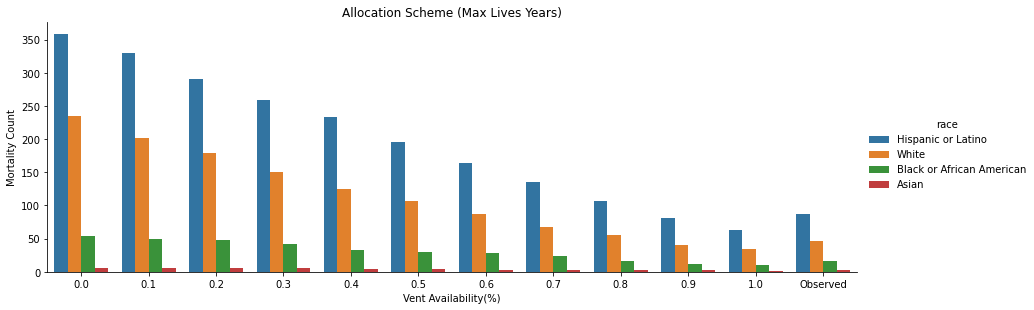

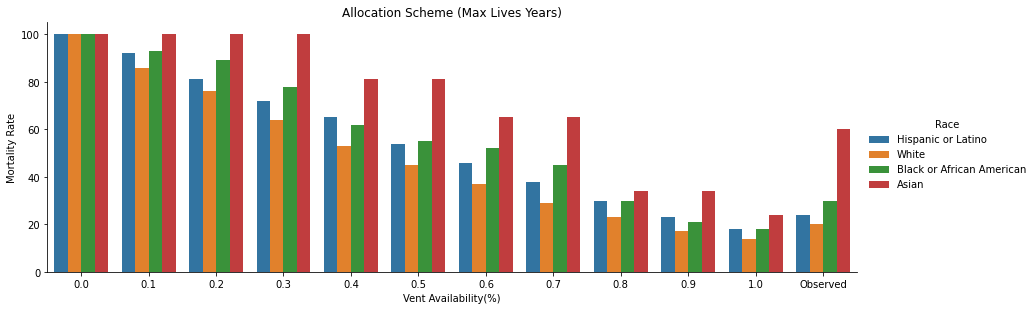

In [47]:
visualize_count_mortality(df_baseline_max_lives_years, 'Max Lives Years')
visualize_percentage_mortality(df_baseline_max_lives_years, 'Max Lives Years')

## Youngest First

In [48]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for pct in vent_availability_pct:
    print('------------------------------{}------------------------------'.format(round(pct, 1)))
    allocation = Allocation(df_sample, pct, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.youngest()                                         # Prioritize patients following Maryland CSC
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])

    df_death.rename(columns={'race_display': 'race', 'expected_death': 'count_death'}, inplace=True)
    
    df_death['level'] = round(pct, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)

    ls_df_count_death_race.append(df_death)

df_youngest = pd.concat(ls_df_count_death_race)
df_youngest['type_allocation'] = 'Youngest'
df_baseline_youngest = pd.concat([death_race_baseline, df_youngest])
df_baseline_youngest[['count_death', 'avg_death', 'percentage_death']] = df_baseline_youngest[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

------------------------------0.0------------------------------
Number of vents available: 0


<ipython-input-39-90e681612423>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs


SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20
13     4                      Asian      1
14     4  Black or African American      3
15     4         Hispanic or Latino     51
16     4                      White     30
17     5  Black or African American      5
18     5         Hispanic or Latino     31
19     5                      White     21
20     6                      Asian      1
21     6  Black or African American      9
22     6         Hispanic or Latino     27
23     6                      White     12
24     7                      Asian      1
25     7  Black or African American      3
26     7         Hispanic or Latino     17
27     7                      White     11
28     8  Black or African American      4
29     8         Hispanic or Latino     20
30     8                      White      6
31     9  Black or African American      1
32     9         Hispanic or Latino     21
33     9                      White     13
34    10                      Asian      1
35    10  Black or African American      1
36    10         Hispanic or Latino      7
37    10                      White      1
38    11  Black or African American      2
39    11         Hispanic or Latino     14
40    11                      White      3
41    12         Hispanic or Latino      8
42    13  Black or African American      2
43    13         Hispanic or Latino      2
44    13                      White      4
45    14                      White      1
46    15                      White      1
47    17                      White      1
48    19                      White      1

race_display  expected_death
0                      Asian               5
1  Black or African American              54
2         Hispanic or Latino             358
3                      White             235

------------------------------0.1------------------------------
Number of vents available: 65


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      1           0.000            0.00
1      0         Hispanic or Latino      7           0.000            0.00
2      0                      White     11           0.000            0.00
3      1         Hispanic or Latino      8           0.000            0.00
4      1                      White      4           0.000            0.00
5      2  Black or African American      2           0.064            0.13
6      2         Hispanic or Latino      2           0.064            0.13
7      2                      White      1           0.064            0.06
8      3  Black or African American      1           0.064            0.06
9      3         Hispanic or Latino      3           0.064            0.19
10     3                      White      1           0.064            0.06
11     4         Hispanic or Latino      8           0.202            1.62
12     4                      White      2           0.202            0.40
13     5         Hispanic or Latino      3           0.202            0.61
14     5                      White      1           0.202            0.20
15     6  Black or African American      1           0.215            0.22
16     6         Hispanic or Latino      3           0.215            0.64
17     7  Black or African American      1           0.215            0.22
18     7         Hispanic or Latino      1           0.215            0.22
19     9         Hispanic or Latino      2           0.333            0.67
20     9                      White      2           0.333            0.67

SOFA               race_display  count
0      0  Black or African American      5
1      0         Hispanic or Latino     65
2      0                      White     49
3      1  Black or African American      8
4      1         Hispanic or Latino     25
5      1                      White     29
6      2                      Asian      1
7      2  Black or African American      4
8      2         Hispanic or Latino     17
9      2                      White     16
10     3  Black or African American      3
11     3         Hispanic or Latino     33
12     3                      White     19
13     4                      Asian      1
14     4  Black or African American      3
15     4         Hispanic or Latino     43
16     4                      White     28
17     5  Black or African American      5
18     5         Hispanic or Latino     28
19     5                      White     20
20     6                      Asian      1
21     6  Black or African American      8
22     6         Hispanic or Latino     24
23     6                      White     12
24     7                      Asian      1
25     7  Black or African American      2
26     7         Hispanic or Latino     16
27     7                      White     11
28     8  Black or African American      4
29     8         Hispanic or Latino     20
30     8                      White      6
31     9  Black or African American      1
32     9         Hispanic or Latino     19
33     9                      White     11
34    10                      Asian      1
35    10  Black or African American      1
36    10         Hispanic or Latino      7
37    10                      White      1
38    11  Black or African American      2
39    11         Hispanic or Latino     14
40    11                      White      3
41    12         Hispanic or Latino      8
42    13  Black or African American      2
43    13         Hispanic or Latino      2
44    13                      White      4
45    14                      White      1
46    15                      White      1
47    17                      White      1
48    19                      White      1

race_display  expected_death
0                      Asian            5.00
1  Black or African American           48.63
2         Hispanic or Latino          325.08
3                      White          214.39

------------------------------0.2------------------------------
Number of vents available: 130


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      3           0.000            0.00
1      0         Hispanic or Latino     18           0.000            0.00
2      0                      White     21           0.000            0.00
3      1         Hispanic or Latino     10           0.000            0.00
4      1                      White      4           0.000            0.00
5      2  Black or African American      3           0.064            0.19
6      2         Hispanic or Latino      6           0.064            0.38
7      2                      White      3           0.064            0.19
8      3  Black or African American      1           0.064            0.06
9      3         Hispanic or Latino      8           0.064            0.51
10     3                      White      2           0.064            0.13
11     4  Black or African American      1           0.202            0.20
12     4         Hispanic or Latino     19           0.202            3.84
13     4                      White      4           0.202            0.81
14     5         Hispanic or Latino      5           0.202            1.01
15     5                      White      2           0.202            0.40
16     6  Black or African American      1           0.215            0.22
17     6         Hispanic or Latino      3           0.215            0.64
18     7                      Asian      1           0.215            0.22
19     7  Black or African American      1           0.215            0.22
20     7         Hispanic or Latino      2           0.215            0.43
21     8         Hispanic or Latino      1           0.333            0.33
22     8                      White      1           0.333            0.33
23     9         Hispanic or Latino      3           0.333            1.00
24     9                      White      3           0.333            1.00
25    11  Black or African American      1           0.500            0.50
26    11         Hispanic or Latino      1           0.500            0.50
27    11                      White      1           0.500            0.50
28    13                      White      1           0.952            0.95

SOFA               race_display  count
0      0  Black or African American      3
1      0         Hispanic or Latino     54
2      0                      White     39
3      1  Black or African American      8
4      1         Hispanic or Latino     23
5      1                      White     29
6      2                      Asian      1
7      2  Black or African American      3
8      2         Hispanic or Latino     13
9      2                      White     14
10     3  Black or African American      3
11     3         Hispanic or Latino     28
12     3                      White     18
13     4                      Asian      1
14     4  Black or African American      2
15     4         Hispanic or Latino     32
16     4                      White     26
17     5  Black or African American      5
18     5         Hispanic or Latino     26
19     5                      White     19
20     6                      Asian      1
21     6  Black or African American      8
22     6         Hispanic or Latino     24
23     6                      White     12
24     7  Black or African American      2
25     7         Hispanic or Latino     15
26     7                      White     11
27     8  Black or African American      4
28     8         Hispanic or Latino     19
29     8                      White      5
30     9  Black or African American      1
31     9         Hispanic or Latino     18
32     9                      White     10
33    10                      Asian      1
34    10  Black or African American      1
35    10         Hispanic or Latino      7
36    10                      White      1
37    11  Black or African American      1
38    11         Hispanic or Latino     13
39    11                      White      2
40    12         Hispanic or Latino      8
41    13  Black or African American      2
42    13         Hispanic or Latino      2
43    13                      White      3
44    14                      White      1
45    15                      White      1
46    17                      White      1
47    19                      White      1

race_display  expected_death
0                      Asian            4.22
1  Black or African American           44.39
2         Hispanic or Latino          290.64
3                      White          197.31

------------------------------0.3------------------------------
Number of vents available: 195
Tie occurs
------------------------------TIE SOFA: 1------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------
-----------------------ALLOCATED-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
0               33220             0  Female         Hispanic or Latino   
1               30021             5  Female  Black or African American   
2               33504             7    Male         Hispanic or Latino   

  insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0           Insured     78753         51053         17.6             17.80   
1         Uninsured     78207         27205         38.7             44.47   
2           Insured     78744         52345         18.9             79.15   

   vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                NaN     4                0                  0         100   
1              48.78     3                0                  0          95   
2                NaN     2                1                  1          93   

  discharge_disposition_display deceased_dt_tm  death  allocate_vent  
0                          Home            NaN      0              1  
1                       Expired            NaN      0              1  
2                          Home            NaN      0              1

SOFA               race_display  count  mortality rate  expected_death
0     2         Hispanic or Latino      1           0.064            0.06
1     3  Black or African American      1           0.064            0.06
2     4         Hispanic or Latino      1           0.202            0.20

race_display  expected_death
0  Black or African American            0.06
1         Hispanic or Latino            0.26

-----------------------TIE-----------------------


deid_fin_encounter  age_at_admit  gender               race_display  \
3                 13424             8  Female         Hispanic or Latino   
4                 28472             8    Male         Hispanic or Latino   
5                 15557            10    Male         Hispanic or Latino   
6                 14626            10    Male         Hispanic or Latino   
7                 25279            10    Male                      White   
..                  ...           ...     ...                        ...   
647               12333            93  Female         Hispanic or Latino   
648               25087            94    Male         Hispanic or Latino   
649               38437            94    Male                      White   
650               26729            95  Female                      White   
651               38186           100  Female  Black or African American   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
3             Insured     76574         54060         12.7             25.40   
4             Insured     78621         72500         10.5            239.22   
5             Insured     78724         50625         23.4            863.32   
6             Insured     78640         75689          9.1             24.32   
7             Insured     78752         48454         20.3             70.25   
..                ...       ...           ...          ...               ...   
647           Insured     78702         65689         22.3             21.65   
648           Insured     78640         75689          9.1            190.41   
649           Insured     78664         75766           10            255.18   
650           Insured     78731         94851            9             59.48   
651           Insured     78722         72428          9.4             51.08   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
3                  NaN     1                1                  2          92   
4                  NaN     3                0                  0          92   
5              1059.40     4                1                  2          90   
6                  NaN     3                0                  0          90   
7                  NaN     3                0                  0          90   
..                 ...   ...              ...                ...         ...   
647                NaN     2                1                  1           7   
648              26.67    11                1                  2           6   
649             247.35     5                1                  1           6   
650                NaN     3                1                  2           5   
651                NaN     1                1                  2           0   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
3                            Home              NaN      0              1  
4                            Home              NaN      0              1  
5                            Home              NaN      0              1  
6                            Home              NaN      0              1  
7                            Home              NaN      0              1  
..                            ...              ...    ...            ...  
647          Skilled Nursing Care              NaN      0              0  
648                       Expired  8/13/2020 14:09      0              0  
649                       Expired  7/19/2020 18:20      0              0  
650                       Expired   7/1/2020 22:10      0              0  
651                       Expired  4/14/2020 16:17      0              0  

[649 rows x 18 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      4          0.80   
1                      Asian              1      1          0.20   
2  Black or African American              0     41          0.77   
3  Black or African American              1     12          0.23   
4         Hispanic or Latino              0    242          0.68   
5         Hispanic or Latino              1    114          0.32   
6                      White              0    170          0.72   
7                      White              1     65          0.28   

   P[D|NV] & P[D|V]  P[D_sub]  
0               1.0      0.80  
1               0.0      0.00  
2               1.0      0.77  
3               0.0      0.00  
4               1.0      0.68  
5               0.0      0.00  
6               1.0      0.72  
7               0.0      0.00

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      4          0.80   
1                      Asian              1      1          0.20   
2  Black or African American              0     41          0.77   
3  Black or African American              1     12          0.23   
4         Hispanic or Latino              0    242          0.68   
5         Hispanic or Latino              1    114          0.32   
6                      White              0    170          0.72   
7                      White              1     65          0.28   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               1.0      0.80        0.80            4.00  
1               0.0      0.00        0.80            4.00  
2               1.0      0.77        0.77           40.81  
3               0.0      0.00        0.77           40.81  
4               1.0      0.68        0.68          242.08  
5               0.0      0.00        0.68          242.08  
6               1.0      0.72        0.72          169.20  
7               0.0      0.00        0.72          169.20

-----------------------NOT ALLOCATED-----------------------


Empty DataFrame
Columns: [deid_fin_encounter, age_at_admit, gender, race_display, insured_uninsured, zip_code, median_income, poverty_rate, icu_hours_summed, vent_hours_summed, SOFA, has_comorbidity, count_comorbidity, life_years, discharge_disposition_display, deceased_dt_tm, death, allocate_vent]
Index: []

Empty DataFrame
Columns: [SOFA, race_display, count]
Index: []

Empty DataFrame
Columns: [race_display, expected_death]
Index: []

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         4.00
2  Black or African American        40.87
4         Hispanic or Latino       242.34
6                      White       169.20

------------------------------0.4------------------------------
Number of vents available: 260


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      4           0.000            0.00
1      0         Hispanic or Latino     33           0.000            0.00
2      0                      White     34           0.000            0.00
3      1  Black or African American      3           0.000            0.00
4      1         Hispanic or Latino     13           0.000            0.00
5      1                      White      7           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      3           0.064            0.19
8      2         Hispanic or Latino      7           0.064            0.45
9      2                      White      7           0.064            0.45
10     3  Black or African American      2           0.064            0.13
11     3         Hispanic or Latino     16           0.064            1.02
12     3                      White      4           0.064            0.26
13     4  Black or African American      1           0.202            0.20
14     4         Hispanic or Latino     30           0.202            6.06
15     4                      White     13           0.202            2.63
16     5         Hispanic or Latino     14           0.202            2.83
17     5                      White      7           0.202            1.41
18     6  Black or African American      1           0.215            0.22
19     6         Hispanic or Latino      6           0.215            1.29
20     6                      White      4           0.215            0.86
21     7                      Asian      1           0.215            0.22
22     7  Black or African American      1           0.215            0.22
23     7         Hispanic or Latino      7           0.215            1.50
24     7                      White      3           0.215            0.64
25     8         Hispanic or Latino      8           0.333            2.66
26     8                      White      2           0.333            0.67
27     9         Hispanic or Latino      6           0.333            2.00
28     9                      White      5           0.333            1.66
29    10         Hispanic or Latino      1           0.500            0.50
30    11  Black or African American      1           0.500            0.50
31    11         Hispanic or Latino      8           0.500            4.00
32    11                      White      1           0.500            0.50
33    12         Hispanic or Latino      2           0.952            1.90
34    13  Black or African American      2           0.952            1.90
35    13                      White      2           0.952            1.90

SOFA               race_display  count
0      0  Black or African American      2
1      0         Hispanic or Latino     39
2      0                      White     26
3      1  Black or African American      5
4      1         Hispanic or Latino     20
5      1                      White     26
6      2  Black or African American      3
7      2         Hispanic or Latino     12
8      2                      White     10
9      3  Black or African American      2
10     3         Hispanic or Latino     20
11     3                      White     16
12     4                      Asian      1
13     4  Black or African American      2
14     4         Hispanic or Latino     21
15     4                      White     17
16     5  Black or African American      5
17     5         Hispanic or Latino     17
18     5                      White     14
19     6                      Asian      1
20     6  Black or African American      8
21     6         Hispanic or Latino     21
22     6                      White      8
23     7  Black or African American      2
24     7         Hispanic or Latino     10
25     7                      White      8
26     8  Black or African American      4
27     8         Hispanic or Latino     12
28     8                      White      4
29     9  Black or African American      1
30     9         Hispanic or Latino     15
31     9                      White      8
32    10                      Asian      1
33    10  Black or African American      1
34    10         Hispanic or Latino      6
35    10                      White      1
36    11  Black or African American      1
37    11         Hispanic or Latino      6
38    11                      White      2
39    12         Hispanic or Latino      6
40    13         Hispanic or Latino      2
41    13                      White      2
42    14                      White      1
43    15                      White      1
44    17                      White      1
45    19                      White      1

race_display  expected_death
0                      Asian            3.28
1  Black or African American           39.36
2         Hispanic or Latino          231.21
3                      White          156.98

------------------------------0.5------------------------------
Number of vents available: 326


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      4           0.000            0.00
1      0         Hispanic or Latino     46           0.000            0.00
2      0                      White     40           0.000            0.00
3      1  Black or African American      3           0.000            0.00
4      1         Hispanic or Latino     14           0.000            0.00
5      1                      White      9           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      3           0.064            0.19
8      2         Hispanic or Latino      8           0.064            0.51
9      2                      White      7           0.064            0.45
10     3  Black or African American      2           0.064            0.13
11     3         Hispanic or Latino     18           0.064            1.15
12     3                      White      5           0.064            0.32
13     4  Black or African American      2           0.202            0.40
14     4         Hispanic or Latino     35           0.202            7.07
15     4                      White     15           0.202            3.03
16     5  Black or African American      1           0.202            0.20
17     5         Hispanic or Latino     16           0.202            3.23
18     5                      White     10           0.202            2.02
19     6                      Asian      1           0.215            0.22
20     6  Black or African American      2           0.215            0.43
21     6         Hispanic or Latino     10           0.215            2.15
22     6                      White      5           0.215            1.08
23     7                      Asian      1           0.215            0.22
24     7  Black or African American      1           0.215            0.22
25     7         Hispanic or Latino     10           0.215            2.15
26     7                      White      3           0.215            0.64
27     8  Black or African American      1           0.333            0.33
28     8         Hispanic or Latino     11           0.333            3.66
29     8                      White      5           0.333            1.66
30     9  Black or African American      1           0.333            0.33
31     9         Hispanic or Latino      6           0.333            2.00
32     9                      White      6           0.333            2.00
33    10         Hispanic or Latino      3           0.500            1.50
34    10                      White      1           0.500            0.50
35    11  Black or African American      1           0.500            0.50
36    11         Hispanic or Latino     10           0.500            5.00
37    11                      White      2           0.500            1.00
38    12         Hispanic or Latino      2           0.952            1.90
39    13  Black or African American      2           0.952            1.90
40    13                      White      2           0.952            1.90
41    14                      White      1           0.952            0.95

SOFA               race_display  count
0      0  Black or African American      2
1      0         Hispanic or Latino     26
2      0                      White     20
3      1  Black or African American      5
4      1         Hispanic or Latino     19
5      1                      White     24
6      2  Black or African American      3
7      2         Hispanic or Latino     11
8      2                      White     10
9      3  Black or African American      2
10     3         Hispanic or Latino     18
11     3                      White     15
12     4                      Asian      1
13     4  Black or African American      1
14     4         Hispanic or Latino     16
15     4                      White     15
16     5  Black or African American      4
17     5         Hispanic or Latino     15
18     5                      White     11
19     6  Black or African American      7
20     6         Hispanic or Latino     17
21     6                      White      7
22     7  Black or African American      2
23     7         Hispanic or Latino      7
24     7                      White      8
25     8  Black or African American      3
26     8         Hispanic or Latino      9
27     8                      White      1
28     9         Hispanic or Latino     15
29     9                      White      7
30    10                      Asian      1
31    10  Black or African American      1
32    10         Hispanic or Latino      4
33    11  Black or African American      1
34    11         Hispanic or Latino      4
35    11                      White      1
36    12         Hispanic or Latino      6
37    13         Hispanic or Latino      2
38    13                      White      2
39    15                      White      1
40    17                      White      1
41    19                      White      1

race_display  expected_death
0                      Asian            2.50
1  Black or African American           35.63
2         Hispanic or Latino          199.32
3                      White          139.55

------------------------------0.6------------------------------
Number of vents available: 391


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     50           0.000            0.00
2      0                      White     42           0.000            0.00
3      1  Black or African American      3           0.000            0.00
4      1         Hispanic or Latino     17           0.000            0.00
5      1                      White     11           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      3           0.064            0.19
8      2         Hispanic or Latino     12           0.064            0.77
9      2                      White      9           0.064            0.58
10     3  Black or African American      2           0.064            0.13
11     3         Hispanic or Latino     24           0.064            1.54
12     3                      White      9           0.064            0.58
13     4  Black or African American      2           0.202            0.40
14     4         Hispanic or Latino     40           0.202            8.08
15     4                      White     18           0.202            3.64
16     5  Black or African American      1           0.202            0.20
17     5         Hispanic or Latino     19           0.202            3.84
18     5                      White     12           0.202            2.42
19     6                      Asian      1           0.215            0.22
20     6  Black or African American      3           0.215            0.64
21     6         Hispanic or Latino     13           0.215            2.80
22     6                      White      5           0.215            1.08
23     7                      Asian      1           0.215            0.22
24     7  Black or African American      1           0.215            0.22
25     7         Hispanic or Latino     15           0.215            3.22
26     7                      White      4           0.215            0.86
27     8  Black or African American      2           0.333            0.67
28     8         Hispanic or Latino     12           0.333            4.00
29     8                      White      5           0.333            1.66
30     9  Black or African American      1           0.333            0.33
31     9         Hispanic or Latino     12           0.333            4.00
32     9                      White      7           0.333            2.33
33    10         Hispanic or Latino      4           0.500            2.00
34    10                      White      1           0.500            0.50
35    11  Black or African American      1           0.500            0.50
36    11         Hispanic or Latino     10           0.500            5.00
37    11                      White      3           0.500            1.50
38    12         Hispanic or Latino      3           0.952            2.86
39    13  Black or African American      2           0.952            1.90
40    13         Hispanic or Latino      1           0.952            0.95
41    13                      White      2           0.952            1.90
42    14                      White      1           0.952            0.95

SOFA               race_display  count
0      0         Hispanic or Latino     22
1      0                      White     18
2      1  Black or African American      5
3      1         Hispanic or Latino     16
4      1                      White     22
5      2  Black or African American      3
6      2         Hispanic or Latino      7
7      2                      White      8
8      3  Black or African American      2
9      3         Hispanic or Latino     12
10     3                      White     11
11     4                      Asian      1
12     4  Black or African American      1
13     4         Hispanic or Latino     11
14     4                      White     12
15     5  Black or African American      4
16     5         Hispanic or Latino     12
17     5                      White      9
18     6  Black or African American      6
19     6         Hispanic or Latino     14
20     6                      White      7
21     7  Black or African American      2
22     7         Hispanic or Latino      2
23     7                      White      7
24     8  Black or African American      2
25     8         Hispanic or Latino      8
26     8                      White      1
27     9         Hispanic or Latino      9
28     9                      White      6
29    10                      Asian      1
30    10  Black or African American      1
31    10         Hispanic or Latino      3
32    11  Black or African American      1
33    11         Hispanic or Latino      4
34    12         Hispanic or Latino      5
35    13         Hispanic or Latino      1
36    13                      White      2
37    15                      White      1
38    17                      White      1
39    19                      White      1

race_display  expected_death
0                      Asian            2.50
1  Black or African American           32.18
2         Hispanic or Latino          165.06
3                      White          124.00

------------------------------0.7------------------------------
Number of vents available: 456


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     60           0.000            0.00
2      0                      White     45           0.000            0.00
3      1  Black or African American      4           0.000            0.00
4      1         Hispanic or Latino     21           0.000            0.00
5      1                      White     15           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      4           0.064            0.26
8      2         Hispanic or Latino     14           0.064            0.90
9      2                      White     13           0.064            0.83
10     3  Black or African American      3           0.064            0.19
11     3         Hispanic or Latino     27           0.064            1.73
12     3                      White     10           0.064            0.64
13     4  Black or African American      2           0.202            0.40
14     4         Hispanic or Latino     41           0.202            8.28
15     4                      White     20           0.202            4.04
16     5  Black or African American      2           0.202            0.40
17     5         Hispanic or Latino     21           0.202            4.24
18     5                      White     13           0.202            2.63
19     6                      Asian      1           0.215            0.22
20     6  Black or African American      5           0.215            1.08
21     6         Hispanic or Latino     16           0.215            3.44
22     6                      White      6           0.215            1.29
23     7                      Asian      1           0.215            0.22
24     7  Black or African American      2           0.215            0.43
25     7         Hispanic or Latino     16           0.215            3.44
26     7                      White      6           0.215            1.29
27     8  Black or African American      2           0.333            0.67
28     8         Hispanic or Latino     15           0.333            4.99
29     8                      White      5           0.333            1.66
30     9  Black or African American      1           0.333            0.33
31     9         Hispanic or Latino     13           0.333            4.33
32     9                      White      9           0.333            3.00
33    10         Hispanic or Latino      4           0.500            2.00
34    10                      White      1           0.500            0.50
35    11  Black or African American      1           0.500            0.50
36    11         Hispanic or Latino     13           0.500            6.50
37    11                      White      3           0.500            1.50
38    12         Hispanic or Latino      6           0.952            5.71
39    13  Black or African American      2           0.952            1.90
40    13         Hispanic or Latino      1           0.952            0.95
41    13                      White      4           0.952            3.81
42    14                      White      1           0.952            0.95

SOFA               race_display  count
0      0         Hispanic or Latino     12
1      0                      White     15
2      1  Black or African American      4
3      1         Hispanic or Latino     12
4      1                      White     18
5      2  Black or African American      2
6      2         Hispanic or Latino      5
7      2                      White      4
8      3  Black or African American      1
9      3         Hispanic or Latino      9
10     3                      White     10
11     4                      Asian      1
12     4  Black or African American      1
13     4         Hispanic or Latino     10
14     4                      White     10
15     5  Black or African American      3
16     5         Hispanic or Latino     10
17     5                      White      8
18     6  Black or African American      4
19     6         Hispanic or Latino     11
20     6                      White      6
21     7  Black or African American      1
22     7         Hispanic or Latino      1
23     7                      White      5
24     8  Black or African American      2
25     8         Hispanic or Latino      5
26     8                      White      1
27     9         Hispanic or Latino      8
28     9                      White      4
29    10                      Asian      1
30    10  Black or African American      1
31    10         Hispanic or Latino      3
32    11  Black or African American      1
33    11         Hispanic or Latino      1
34    12         Hispanic or Latino      2
35    13         Hispanic or Latino      1
36    15                      White      1
37    17                      White      1
38    19                      White      1

race_display  expected_death
0                      Asian            2.50
1  Black or African American           26.16
2         Hispanic or Latino          136.51
3                      White          106.14

------------------------------0.8------------------------------
Number of vents available: 521


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     64           0.000            0.00
2      0                      White     52           0.000            0.00
3      1  Black or African American      6           0.000            0.00
4      1         Hispanic or Latino     25           0.000            0.00
5      1                      White     22           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      4           0.064            0.26
8      2         Hispanic or Latino     16           0.064            1.02
9      2                      White     13           0.064            0.83
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     28           0.064            1.79
12     3                      White     13           0.064            0.83
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      2           0.202            0.40
15     4         Hispanic or Latino     43           0.202            8.69
16     4                      White     22           0.202            4.44
17     5  Black or African American      3           0.202            0.61
18     5         Hispanic or Latino     26           0.202            5.25
19     5                      White     16           0.202            3.23
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      5           0.215            1.08
22     6         Hispanic or Latino     20           0.215            4.30
23     6                      White      8           0.215            1.72
24     7                      Asian      1           0.215            0.22
25     7  Black or African American      3           0.215            0.64
26     7         Hispanic or Latino     16           0.215            3.44
27     7                      White      7           0.215            1.50
28     8  Black or African American      3           0.333            1.00
29     8         Hispanic or Latino     18           0.333            5.99
30     8                      White      5           0.333            1.66
31     9  Black or African American      1           0.333            0.33
32     9         Hispanic or Latino     15           0.333            4.99
33     9                      White     10           0.333            3.33
34    10                      Asian      1           0.500            0.50
35    10  Black or African American      1           0.500            0.50
36    10         Hispanic or Latino      5           0.500            2.50
37    10                      White      1           0.500            0.50
38    11  Black or African American      1           0.500            0.50
39    11         Hispanic or Latino     13           0.500            6.50
40    11                      White      3           0.500            1.50
41    12         Hispanic or Latino      7           0.952            6.66
42    13  Black or African American      2           0.952            1.90
43    13         Hispanic or Latino      2           0.952            1.90
44    13                      White      4           0.952            3.81
45    14                      White      1           0.952            0.95

SOFA               race_display  count
0      0         Hispanic or Latino      8
1      0                      White      8
2      1  Black or African American      2
3      1         Hispanic or Latino      8
4      1                      White     11
5      2  Black or African American      2
6      2         Hispanic or Latino      3
7      2                      White      4
8      3         Hispanic or Latino      8
9      3                      White      7
10     4  Black or African American      1
11     4         Hispanic or Latino      8
12     4                      White      8
13     5  Black or African American      2
14     5         Hispanic or Latino      5
15     5                      White      5
16     6  Black or African American      4
17     6         Hispanic or Latino      7
18     6                      White      4
19     7         Hispanic or Latino      1
20     7                      White      4
21     8  Black or African American      1
22     8         Hispanic or Latino      2
23     8                      White      1
24     9         Hispanic or Latino      6
25     9                      White      3
26    10         Hispanic or Latino      2
27    11  Black or African American      1
28    11         Hispanic or Latino      1
29    12         Hispanic or Latino      1
30    15                      White      1
31    17                      White      1
32    19                      White      1

race_display  expected_death
0                      Asian            1.20
1  Black or African American           20.48
2         Hispanic or Latino          113.03
3                      White           82.30

------------------------------0.9------------------------------
Number of vents available: 586


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     70           0.000            0.00
2      0                      White     57           0.000            0.00
3      1  Black or African American      6           0.000            0.00
4      1         Hispanic or Latino     28           0.000            0.00
5      1                      White     25           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      5           0.064            0.32
8      2         Hispanic or Latino     17           0.064            1.09
9      2                      White     16           0.064            1.02
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     32           0.064            2.05
12     3                      White     17           0.064            1.09
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      2           0.202            0.40
15     4         Hispanic or Latino     46           0.202            9.29
16     4                      White     24           0.202            4.85
17     5  Black or African American      3           0.202            0.61
18     5         Hispanic or Latino     28           0.202            5.66
19     5                      White     19           0.202            3.84
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     22           0.215            4.73
23     6                      White      9           0.215            1.94
24     7                      Asian      1           0.215            0.22
25     7  Black or African American      3           0.215            0.64
26     7         Hispanic or Latino     17           0.215            3.66
27     7                      White     10           0.215            2.15
28     8  Black or African American      3           0.333            1.00
29     8         Hispanic or Latino     19           0.333            6.33
30     8                      White      5           0.333            1.66
31     9  Black or African American      1           0.333            0.33
32     9         Hispanic or Latino     20           0.333            6.66
33     9                      White     11           0.333            3.66
34    10                      Asian      1           0.500            0.50
35    10  Black or African American      1           0.500            0.50
36    10         Hispanic or Latino      7           0.500            3.50
37    10                      White      1           0.500            0.50
38    11  Black or African American      2           0.500            1.00
39    11         Hispanic or Latino     13           0.500            6.50
40    11                      White      3           0.500            1.50
41    12         Hispanic or Latino      8           0.952            7.62
42    13  Black or African American      2           0.952            1.90
43    13         Hispanic or Latino      2           0.952            1.90
44    13                      White      4           0.952            3.81
45    14                      White      1           0.952            0.95
46    15                      White      1           0.952            0.95
47    17                      White      1           0.952            0.95
48    19                      White      1           0.952            0.95

SOFA               race_display  count
0      0         Hispanic or Latino      2
1      0                      White      3
2      1  Black or African American      2
3      1         Hispanic or Latino      5
4      1                      White      8
5      2  Black or African American      1
6      2         Hispanic or Latino      2
7      2                      White      1
8      3         Hispanic or Latino      4
9      3                      White      3
10     4  Black or African American      1
11     4         Hispanic or Latino      5
12     4                      White      6
13     5  Black or African American      2
14     5         Hispanic or Latino      3
15     5                      White      2
16     6         Hispanic or Latino      5
17     6                      White      3
18     7                      White      1
19     8  Black or African American      1
20     8         Hispanic or Latino      1
21     8                      White      1
22     9         Hispanic or Latino      1
23     9                      White      2
24    11         Hispanic or Latino      1

race_display  expected_death
0                      Asian            1.20
1  Black or African American           15.90
2         Hispanic or Latino           87.99
3                      White           59.82

------------------------------1.0------------------------------
Number of vents available: 652


<ipython-input-39-90e681612423>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06
17     5  Black or African American      5           0.202            1.01
18     5         Hispanic or Latino     31           0.202            6.26
19     5                      White     21           0.202            4.24
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     27           0.215            5.80
23     6                      White     12           0.215            2.58
24     7                      Asian      1           0.215            0.22
25     7  Black or African American      3           0.215            0.64
26     7         Hispanic or Latino     17           0.215            3.66
27     7                      White     11           0.215            2.37
28     8  Black or African American      4           0.333            1.33
29     8         Hispanic or Latino     20           0.333            6.66
30     8                      White      6           0.333            2.00
31     9  Black or African American      1           0.333            0.33
32     9         Hispanic or Latino     21           0.333            6.99
33     9                      White     13           0.333            4.33
34    10                      Asian      1           0.500            0.50
35    10  Black or African American      1           0.500            0.50
36    10         Hispanic or Latino      7           0.500            3.50
37    10                      White      1           0.500            0.50
38    11  Black or African American      2           0.500            1.00
39    11         Hispanic or Latino     14           0.500            7.00
40    11                      White      3           0.500            1.50
41    12         Hispanic or Latino      8           0.952            7.62
42    13  Black or African American      2           0.952            1.90
43    13         Hispanic or Latino      2           0.952            1.90
44    13                      White      4           0.952            3.81
45    14                      White      1           0.952            0.95
46    15                      White      1           0.952            0.95
47    17                      White      1           0.952            0.95
48    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            1.20
1  Black or African American            9.90
2         Hispanic or Latino           63.21
3                      White           33.56

In [49]:
df_youngest_tb = df_baseline_youngest.loc[df_baseline_youngest['level']!='Observed', ['race', 'count_death', 'level', 'type_allocation']].copy()
display(df_youngest_tb)

race  count_death  level type_allocation
0         Hispanic or Latino           87    2.0        Baseline
1                      White           46    2.0        Baseline
2  Black or African American           16    2.0        Baseline
3                      Asian            3    2.0        Baseline
0                      Asian            5    0.0        Youngest
1  Black or African American           54    0.0        Youngest
2         Hispanic or Latino          358    0.0        Youngest
3                      White          235    0.0        Youngest
0                      Asian            5    0.1        Youngest
1  Black or African American           49    0.1        Youngest
2         Hispanic or Latino          325    0.1        Youngest
3                      White          214    0.1        Youngest
0                      Asian            4    0.2        Youngest
1  Black or African American           44    0.2        Youngest
2         Hispanic or Latino          291    0.2        Youngest
3                      White          197    0.2        Youngest
0                      Asian            4    0.3        Youngest
2  Black or African American           41    0.3        Youngest
4         Hispanic or Latino          242    0.3        Youngest
6                      White          169    0.3        Youngest
0                      Asian            3    0.4        Youngest
1  Black or African American           39    0.4        Youngest
2         Hispanic or Latino          231    0.4        Youngest
3                      White          157    0.4        Youngest
0                      Asian            2    0.5        Youngest
1  Black or African American           36    0.5        Youngest
2         Hispanic or Latino          199    0.5        Youngest
3                      White          140    0.5        Youngest
0                      Asian            2    0.6        Youngest
1  Black or African American           32    0.6        Youngest
2         Hispanic or Latino          165    0.6        Youngest
3                      White          124    0.6        Youngest
0                      Asian            2    0.7        Youngest
1  Black or African American           26    0.7        Youngest
2         Hispanic or Latino          137    0.7        Youngest
3                      White          106    0.7        Youngest
0                      Asian            1    0.8        Youngest
1  Black or African American           20    0.8        Youngest
2         Hispanic or Latino          113    0.8        Youngest
3                      White           82    0.8        Youngest
0                      Asian            1    0.9        Youngest
1  Black or African American           16    0.9        Youngest
2         Hispanic or Latino           88    0.9        Youngest
3                      White           60    0.9        Youngest
0                      Asian            1    1.0        Youngest
1  Black or African American           10    1.0        Youngest
2         Hispanic or Latino           63    1.0        Youngest
3                      White           34    1.0        Youngest

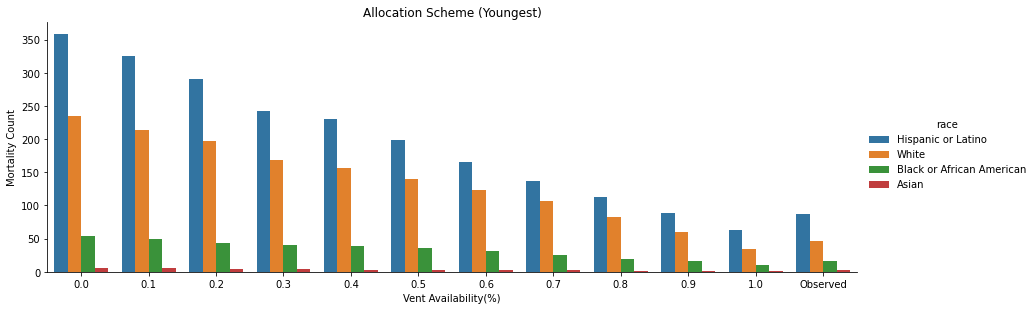

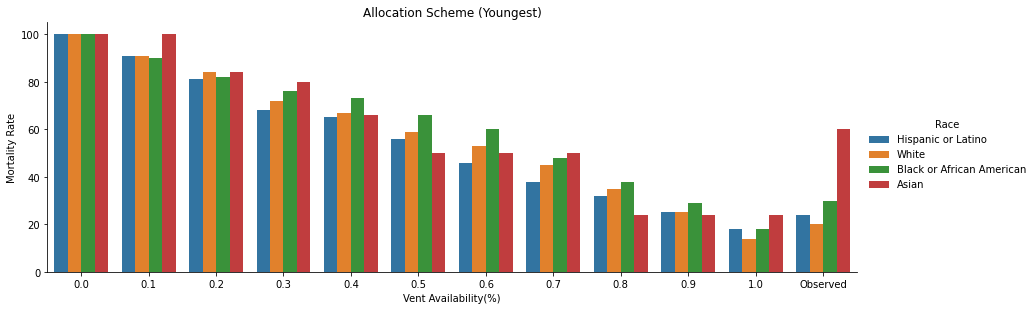

In [50]:
visualize_count_mortality(df_baseline_youngest, 'Youngest')
visualize_percentage_mortality(df_baseline_youngest, 'Youngest')

## Sickest First

In [51]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for pct in vent_availability_pct:
    print('------------------------------{}------------------------------'.format(round(pct, 1)))
    allocation = Allocation(df_sample, pct, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.sickest()                                         # Prioritize patients following Maryland CSC
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])

    df_death.rename(columns={'race_display': 'race', 'expected_death': 'count_death'}, inplace=True)
    
    df_death['level'] = round(pct, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)

    ls_df_count_death_race.append(df_death)

df_sickest = pd.concat(ls_df_count_death_race)
df_sickest['type_allocation'] = 'Sickest'
df_baseline_sickest = pd.concat([death_race_baseline, df_sickest])
df_baseline_sickest[['count_death', 'avg_death', 'percentage_death']] = df_baseline_sickest[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)


------------------------------0.0------------------------------
Number of vents available: 0


<ipython-input-39-90e681612423>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs


SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20
13     4                      Asian      1
14     4  Black or African American      3
15     4         Hispanic or Latino     51
16     4                      White     30
17     5  Black or African American      5
18     5         Hispanic or Latino     31
19     5                      White     21
20     6                      Asian      1
21     6  Black or African American      9
22     6         Hispanic or Latino     27
23     6                      White     12
24     7                      Asian      1
25     7  Black or African American      3
26     7         Hispanic or Latino     17
27     7                      White     11
28     8  Black or African American      4
29     8         Hispanic or Latino     20
30     8                      White      6
31     9  Black or African American      1
32     9         Hispanic or Latino     21
33     9                      White     13
34    10                      Asian      1
35    10  Black or African American      1
36    10         Hispanic or Latino      7
37    10                      White      1
38    11  Black or African American      2
39    11         Hispanic or Latino     14
40    11                      White      3
41    12         Hispanic or Latino      8
42    13  Black or African American      2
43    13         Hispanic or Latino      2
44    13                      White      4
45    14                      White      1
46    15                      White      1
47    17                      White      1
48    19                      White      1

race_display  expected_death
0                      Asian               5
1  Black or African American              54
2         Hispanic or Latino             358
3                      White             235

------------------------------0.1------------------------------
Number of vents available: 65
Tie occurs
------------------------------TIE SOFA: 9------------------------------
------------------------------MORTALITY PROBABILITY: 33.3------------------------------
-----------------------ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
0      52               32723            74    Male   
1      50               32723            74    Male   
2      51               32723            74    Male   
3     582               17790            58    Male   
4     636               33570            71    Male   
5     576               24068            66    Male   
6     526               19222            67    Male   
7     502               33932            38    Male   
8     295               37408            52    Male   
9      87               20938            63    Male   
10    296               37408            52    Male   
11    643               13488            50    Male   
12    249               41028            64    Male   
13    377               22868            65    Male   
14    457               27098            63    Male   
15    641               46133            70    Male   
16    253               30876            51  Female   
17    444               42127            64  Female   
18    455               45948            78  Female   
19    246               20192            54    Male   
20    585               14656            46    Male   
21    583               34707            56    Male   
22    449               33487            46    Male   
23    572               27325            38  Female   
24    306               35133            60    Male   
25     88               17401            38  Female   
26    108               30811            66  Female   
27    340               11253            45    Male   
28    163               27942            57    Male   
29    521               49072            64    Male   
30    132               48370            38  Female   
31    130               33547            77  Female   
32    344               36491            54    Male   
33      0               27818            44    Male   
34    106               30106            52  Female   
35    243               25087            94    Male   
36    227               40457            53    Male   
37    254               19398            65    Male   
38    605               16015            58    Male   
39    176               41218            74  Female   
40     85               35541            69    Male   
41    516               46873            69  Female   
42    557               28506            69    Male   
43    105               12922            51    Male   
44    294               42261            56  Female   
45    293               42261            56  Female   
46     29               17347            60  Female   
47    581               17790            58    Male   
48    192               40443            76    Male   

                 race_display insured_uninsured  zip_code median_income  \
0                       White           Insured     78753         51053   
1                       White           Insured     78753         51053   
2                       White           Insured     78753         51053   
3                       White           Insured     78639         48787   
4          Hispanic or Latino         Uninsured     79907         31784   
5                       White           Insured     76708         51432   
6                       White           Insured     78664         75766   
7                       White           Insured     78641        100562   
8   Black or African American           Insured     78617         62179   
9          Hispanic or Latino           Insured     78741         45835   
10  Black or African American           Insured     78617         62179   
11                      White           Insured     78681        107912   
12         Hispanic or Latino           Insured     78640         75689   
13         Hispanic or Latino           Insured     78702         65689   
14         Hispanic or Latino           Insured     78644         57637   
15         Hispanic or Latino           Insured     7

SOFA               race_display  count  mortality rate  expected_death
0     10                      Asian      1           0.500            0.50
1     10  Black or African American      1           0.500            0.50
2     10         Hispanic or Latino      7           0.500            3.50
3     10                      White      1           0.500            0.50
4     11  Black or African American      2           0.500            1.00
5     11         Hispanic or Latino     14           0.500            7.00
6     11                      White      3           0.500            1.50
7     12         Hispanic or Latino      8           0.952            7.62
8     13  Black or African American      2           0.952            1.90
9     13         Hispanic or Latino      2           0.952            1.90
10    13                      White      4           0.952            3.81
11    14                      White      1           0.952            0.95
12    15                      White      1           0.952            0.95
13    17                      White      1           0.952            0.95
14    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            0.50
1  Black or African American            3.40
2         Hispanic or Latino           20.02
3                      White            9.61

-----------------------TIE-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
49    644               37993            85  Female   
50    376               37421            61    Male   
51    250               31229            74    Male   
52    247               23765            20    Male   
53    147               47188            77    Male   
54    146               29123            75  Female   
55    138               30090            73  Female   
56    226               11183            64  Female   
57    131               27408            80    Male   
58    443               47828            65  Female   
59    124               37577            75    Male   
60    220               34716            54    Male   
61     86               20938            63    Male   
62    630               20577            78    Male   
63     11               37705            24    Male   
64     91               11843            25    Male   
65    642               45774            50    Male   
66    439               15653            58  Female   
67    309               10998            62  Female   
68    501               33932            38    Male   
69    202               13054            54  Female   
70    350               33208            25    Male   
71    332               49955            49  Female   
72    174               37368            41    Male   
73    597               19794            57  Female   
74    335               39848            63  Female   
75    336               17709            70    Male   
76    170               49789            83  Female   
77     58               42438            49    Male   
78    286               13321            63    Male   
79    208               19288            63    Male   
80     68               45711            72    Male   
81    525               19222            67    Male   
82    358               45929            78  Female   
83    531               33974            61    Male   

                 race_display insured_uninsured  zip_code median_income  \
49                      White           Insured     78681        107912   
50         Hispanic or Latino         Uninsured     78702         65689   
51         Hispanic or Latino           Insured     78640         75689   
52         Hispanic or Latino           Insured     78640         75689   
53                      White           Insured     78758         55074   
54         Hispanic or Latino           Insured     78758         55074   
55                      White           Insured     78626         71638   
56         Hispanic or Latino         Uninsured     78640         75689   
57                      White           Insured     78628         95238   
58                      White           Insured     78644         57637   
59         Hispanic or Latino           Insured     78723         59197   
60         Hispanic or Latino         Uninsured     78640         75689   
61         Hispanic or Latino           Insured     78741         45835   
62         Hispanic or Latino           Insured     78801         42360   
63                      White           Insured     78753         51053   
64                      White         Uninsured     78741         45835   
65                      White           Insured     78681        107912   
66  Black or African American           Insured     78644         57637   
67         Hispanic or Latino           Insured     78724         50625   
68                      White           Insured     78641        100562   
69                      White           Insured     78727         80758   
70         Hispanic or Latino         Uninsured     78621         72500   
71         Hispanic or Latino           Insured     78648         47854   
72         Hispanic or Latino         Uninsured     78744         52345   
73                      White           Insured     78701        122182   
74         Hispanic or Latino         Uninsured     78648         47854  

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      1          1.00   
1         Hispanic or Latino              0     12          0.57   
2         Hispanic or Latino              1      9          0.43   
3                      White              0      6          0.46   
4                      White              1      7          0.54   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000   1.00000  
1             1.000   0.57000  
2             0.333   0.14319  
3             1.000   0.46000  
4             0.333   0.17982

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      1          1.00   
1         Hispanic or Latino              0     12          0.57   
2         Hispanic or Latino              1      9          0.43   
3                      White              0      6          0.46   
4                      White              1      7          0.54   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000   1.00000     1.00000         1.00000  
1             1.000   0.57000     0.71319        14.97699  
2             0.333   0.14319     0.71319        14.97699  
3             1.000   0.46000     0.63982         8.31766  
4             0.333   0.17982     0.63982         8.31766

-----------------------NOT ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
84     245               20192            54    Male  Hispanic or Latino   
85     154               21053            64    Male  Hispanic or Latino   
86     242               22478            82  Female  Hispanic or Latino   
87     213               34789            45  Female  Hispanic or Latino   
88     211               26620            52    Male  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
647    503               47687            39  Female               White   
648    510               36424            73  Female               White   
649    304               39285            69  Female  Hispanic or Latino   
650    513               40191            59    Male  Hispanic or Latino   
651    234               14102            75    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
84            Insured     78640         75689          9.1            365.94   
85          Uninsured     78744         52345         18.9             92.80   
86            Insured     78640         75689          9.1            541.76   
87            Insured     78660         88204            6            455.67   
88          Uninsured     78660         88204            6            130.25   
..                ...       ...           ...          ...               ...   
647           Insured     78641        100562            5             30.02   
648           Insured     78629         53783         15.8             40.17   
649           Insured     78724         50625         23.4             48.93   
650         Uninsured     78664         75766           10             22.69   
651           Insured     78640         75689          9.1              2.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
84              367.41     8                1                  3          46   
85              100.82     8                0                  0          36   
86              492.08     8                0                  0          18   
87              474.57     8                1                  1          55   
88              134.18     8                0                  0          48   
..                 ...   ...              ...                ...         ...   
647                NaN     0                0                  0          61   
648                NaN     0                0                  0          27   
649                NaN     0                1                  2          31   
650                NaN     0                1                  2          41   
651                NaN     0                1                  1          25   

    discharge_disposition_display    deceased_dt_tm  death  allocate_vent  
84                        Expired   8/13/2020 20:54      0              0  
85                        Expired    4/25/2020 1:02      0              0  
86                        Expired   8/13/2020 15:42      0              0  
87                        Expired  10/27/2020 18:40      0              0  
88                        Expired   6/30/2020 21:40      0              0  
..                            ...               ...    ...            ...  
647                          Home               NaN      0              0  
648                          Home               NaN      0              0  
649                          Home               NaN      0              0  
650                          Home               NaN      0              0  
651                          Home               NaN      0              0  

[568 rows x 19 columns]

SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20
13     4                      Asian      1
14     4  Black or African American      3
15     4         Hispanic or Latino     51
16     4                      White     30
17     5  Black or African American      5
18     5         Hispanic or Latino     31
19     5                      White     21
20     6                      Asian      1
21     6  Black or African American      9
22     6         Hispanic or Latino     27
23     6                      White     12
24     7                      Asian      1
25     7  Black or African American      3
26     7         Hispanic or Latino     17
27     7                      White     11
28     8  Black or African American      4
29     8         Hispanic or Latino     20
30     8                      White      6

race_display  expected_death
0                      Asian               4
1  Black or African American              48
2         Hispanic or Latino             306
3                      White             210

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      4.50000
1  Black or African American     52.40000
2         Hispanic or Latino    340.99699
4                      White    227.92766

------------------------------0.2------------------------------
Number of vents available: 130
Tie occurs
------------------------------TIE SOFA: 7------------------------------
------------------------------MORTALITY PROBABILITY: 21.5------------------------------
-----------------------ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
0       52               32723            74    Male               White   
1       50               32723            74    Male               White   
2       51               32723            74    Male               White   
3      582               17790            58    Male               White   
4      636               33570            71    Male  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
109    640               46133            70    Male  Hispanic or Latino   
110    481               14844            46    Male  Hispanic or Latino   
111    645               37599            55    Male  Hispanic or Latino   
112    454               45948            78  Female  Hispanic or Latino   
113    441               48951            66  Female  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78753         51053         17.6             30.60   
1             Insured     78753         51053         17.6             30.60   
2             Insured     78753         51053         17.6             30.60   
3             Insured     78639         48787          9.9            318.77   
4           Uninsured     79907         31784         27.6            494.30   
..                ...       ...           ...          ...               ...   
109           Insured     79719         42708         24.8              3.88   
110         Uninsured     78610         80256          6.3           2691.02   
111           Insured     79924         43397         20.7              5.95   
112           Insured     78644         57637         12.3            522.50   
113           Insured     78644         57637         12.3            586.67   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                18.44    19                1                  2          26   
1                18.44    17                1                  2          26   
2                18.44    15                1                  2          26   
3               233.28    14                1                  1          42   
4               494.65    13                1                  2          29   
..                 ...   ...              ...                ...         ...   
109               0.02     8                0                  0          30   
110            2207.33     8                1                  1          54   
111             223.50     8                0                  0          45   
112             517.10     8                1                  3          22   
113             562.97     8                1                  3          34   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                         Expired  11/5/2020 16:40      0              1  
1                         Expired  11/5/2020 16:40      0              1  
2                         Expired  11/5/2020 16:40      0              1  
3                             NaN              NaN      0              1  
4                         Expired  11/18/2020 6:07      0              1  
..                            ...              ...    ...            ...  
109                           NaN              NaN      0              1  
110                    Rehab Care              NaN      0              1  
111                           NaN              NaN      0              1  
112                       Expired    9/8/2020 9:51      0              1  
113                       Expired    8/2/2020 7:50      0              1  

[114 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      8  Black or African American      4           0.333            1.33
1      8         Hispanic or Latino     20           0.333            6.66
2      8                      White      6           0.333            2.00
3      9  Black or African American      1           0.333            0.33
4      9         Hispanic or Latino     21           0.333            6.99
5      9                      White     13           0.333            4.33
6     10                      Asian      1           0.500            0.50
7     10  Black or African American      1           0.500            0.50
8     10         Hispanic or Latino      7           0.500            3.50
9     10                      White      1           0.500            0.50
10    11  Black or African American      2           0.500            1.00
11    11         Hispanic or Latino     14           0.500            7.00
12    11                      White      3           0.500            1.50
13    12         Hispanic or Latino      8           0.952            7.62
14    13  Black or African American      2           0.952            1.90
15    13         Hispanic or Latino      2           0.952            1.90
16    13                      White      4           0.952            3.81
17    14                      White      1           0.952            0.95
18    15                      White      1           0.952            0.95
19    17                      White      1           0.952            0.95
20    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            0.50
1  Black or African American            5.06
2         Hispanic or Latino           33.67
3                      White           15.94

-----------------------TIE-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
114     62               20496            56  Female   
115    487               42865            60    Male   
116     28               35200            57  Female   
117    136               30090            73  Female   
118    592               38255            68    Male   
119     34               27145            47  Female   
120    586               45756            28    Male   
121    382               30432            63    Male   
122    298               36295            68  Female   
123     49               48179            54  Female   
124    307               43747            53    Male   
125    189               28935            54  Female   
126    133               45991            48    Male   
127    571               17498            27  Female   
128    331               33426            75  Female   
129    161               38028            54  Female   
130    357               45929            78  Female   
131    566               38481            73    Male   
132    238               32542            59  Female   
133    555               19424            42  Female   
134    251               14391            46    Male   
135     94               41628            49    Male   
136    616               26312            61    Male   
137     92               27780            60    Male   
138     89               25299            34    Male   
139    624               12540            73  Female   
140    629               16059            56    Male   
141    268               42304            69    Male   
142    456               37953            79  Female   
143     97               15030            60    Male   
144    283               32616            66  Female   
145    617               20647            65    Male   

                  race_display insured_uninsured  zip_code median_income  \
114         Hispanic or Latino           Insured     78602         63592   
115         Hispanic or Latino           Insured     78610         80256   
116         Hispanic or Latino           Insured     78753         51053   
117                      White           Insured     78626         71638   
118  Black or African American           Insured     78701        122182   
119         Hispanic or Latino           Insured     78753         51053   
120  Black or African American           Insured     78701        122182   
121         Hispanic or Latino           Insured     76574         54060   
122                      White         Uninsured     78617         62179   
123         Hispanic or Latino         Uninsured     78753         51053   
124         Hispanic or Latino         Uninsured     78724         50625   
125                      White           Insured     78759         85555   
126                      White           Insured     78626         71638   
127         Hispanic or Latino           Insured     78654         54034   
128                      White           Insured     78648         47854   
129         Hispanic or Latino           Insured     78744         52345   
130         Hispanic or Latino           Insured     78621         72500   
131                      White           Insured     78633         80117   
132         Hispanic or Latino           Insured     78640         75689   
133         Hispanic or Latino         Uninsured     78748         76909   
134         Hispanic or Latino           Insured     78640         75689   
135                      White           Insured     78741         45835   
136                      White           Insured     77356         92378   
137         Hispanic or Latino           Insured     78741         45835   
138                      Asian           Insured     78741         45835   
139                      White           Insured     78739        162274   
140         Hispanic or Latino         Uninsured     76578         70406   
141  Black or African Americ

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1          1.00   
1  Black or African American              0      1          0.33   
2  Black or African American              1      2          0.67   
3         Hispanic or Latino              0      8          0.47   
4         Hispanic or Latino              1      9          0.53   
5                      White              0      6          0.55   
6                      White              1      5          0.45   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000   1.00000  
1             1.000   0.33000  
2             0.215   0.14405  
3             1.000   0.47000  
4             0.215   0.11395  
5             1.000   0.55000  
6             0.215   0.09675

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1          1.00   
1  Black or African American              0      1          0.33   
2  Black or African American              1      2          0.67   
3         Hispanic or Latino              0      8          0.47   
4         Hispanic or Latino              1      9          0.53   
5                      White              0      6          0.55   
6                      White              1      5          0.45   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000   1.00000     1.00000         1.00000  
1             1.000   0.33000     0.47405         1.42215  
2             0.215   0.14405     0.47405         1.42215  
3             1.000   0.47000     0.58395         9.92715  
4             0.215   0.11395     0.58395         9.92715  
5             1.000   0.55000     0.64675         7.11425  
6             0.215   0.09675     0.64675         7.11425

-----------------------NOT ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
146      6               36262            70    Male   
147    565               28583            82    Male   
148    313               35732            64  Female   
149    619               49492            76    Male   
150    333               49461            56  Female   
..     ...                 ...           ...     ...   
647    503               47687            39  Female   
648    510               36424            73  Female   
649    304               39285            69  Female   
650    513               40191            59    Male   
651    234               14102            75    Male   

                  race_display insured_uninsured  zip_code median_income  \
146         Hispanic or Latino           Insured     78612         69213   
147                      White           Insured     78613        104308   
148         Hispanic or Latino           Insured     78724         50625   
149  Black or African American           Insured     78957         58446   
150                      White           Insured     78648         47854   
..                         ...               ...       ...           ...   
647                      White           Insured     78641        100562   
648                      White           Insured     78629         53783   
649         Hispanic or Latino           Insured     78724         50625   
650         Hispanic or Latino         Uninsured     78664         75766   
651                      White           Insured     78640         75689   

    poverty_rate  icu_hours_summed  vent_hours_summed  SOFA  has_comorbidity  \
146         10.6            600.23             465.20     6                1   
147          4.8             62.32                NaN     6                1   
148         23.4             23.68              28.37     6                1   
149           12             55.68              27.27     6                1   
150         25.5            161.12             166.25     6                1   
..           ...               ...                ...   ...              ...   
647            5             30.02                NaN     0                0   
648         15.8             40.17                NaN     0                0   
649         23.4             48.93                NaN     0                1   
650           10             22.69                NaN     0                1   
651          9.1              2.60                NaN     0                1   

     count_comorbidity  life_years discharge_disposition_display  \
146                  2          30                       Expired   
147                  4          18       Long Term Care Hospital   
148                  2          36                       Expired   
149                  5          24    Home Care with Home Health   
150                  3          44                       Expired   
..                 ...         ...                           ...   
647                  0          61                          Home   
648                  0          27                          Home   
649                  2          31                          Home   
650                  2          41                          Home   
651                  1          25                          Home   

       deceased_dt_tm  death  allocate_vent  
146  10/23/2020 12:35      0              0  
147               NaN      0              0  
148   6/24/2020 18:21      0              0  
149               NaN      0              0  
150    7/31/2020 3:33      0              0  
..                ...    ...            ...  
647               NaN      0              0  
648               NaN      0              0  
649               NaN      0              0  
650               NaN      0              0  
651               NaN      0              0  

[506 rows x 19 columns]

SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20
13     4                      Asian      1
14     4  Black or African American      3
15     4         Hispanic or Latino     51
16     4                      White     30
17     5  Black or African American      5
18     5         Hispanic or Latino     31
19     5                      White     21
20     6                      Asian      1
21     6  Black or African American      9
22     6         Hispanic or Latino     27
23     6                      White     12

race_display  expected_death
0                      Asian               3
1  Black or African American              41
2         Hispanic or Latino             269
3                      White             193

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      4.50000
1  Black or African American     47.48215
3         Hispanic or Latino    312.59715
5                      White    216.05425

------------------------------0.3------------------------------
Number of vents available: 195


SOFA               race_display  count  mortality rate  expected_death
0      6                      Asian      1           0.215            0.22
1      6  Black or African American      9           0.215            1.94
2      6         Hispanic or Latino     27           0.215            5.80
3      6                      White     12           0.215            2.58
4      7                      Asian      1           0.215            0.22
5      7  Black or African American      3           0.215            0.64
6      7         Hispanic or Latino     17           0.215            3.66
7      7                      White     11           0.215            2.37
8      8  Black or African American      4           0.333            1.33
9      8         Hispanic or Latino     20           0.333            6.66
10     8                      White      6           0.333            2.00
11     9  Black or African American      1           0.333            0.33
12     9         Hispanic or Latino     21           0.333            6.99
13     9                      White     13           0.333            4.33
14    10                      Asian      1           0.500            0.50
15    10  Black or African American      1           0.500            0.50
16    10         Hispanic or Latino      7           0.500            3.50
17    10                      White      1           0.500            0.50
18    11  Black or African American      2           0.500            1.00
19    11         Hispanic or Latino     14           0.500            7.00
20    11                      White      3           0.500            1.50
21    12         Hispanic or Latino      8           0.952            7.62
22    13  Black or African American      2           0.952            1.90
23    13         Hispanic or Latino      2           0.952            1.90
24    13                      White      4           0.952            3.81
25    14                      White      1           0.952            0.95
26    15                      White      1           0.952            0.95
27    17                      White      1           0.952            0.95
28    19                      White      1           0.952            0.95

SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20
13     4                      Asian      1
14     4  Black or African American      3
15     4         Hispanic or Latino     51
16     4                      White     30
17     5  Black or African American      5
18     5         Hispanic or Latino     31
19     5                      White     21

race_display  expected_death
0                      Asian            2.94
1  Black or African American           39.64
2         Hispanic or Latino          285.13
3                      White          201.89

------------------------------0.4------------------------------
Number of vents available: 260
Tie occurs
------------------------------TIE SOFA: 4------------------------------
------------------------------MORTALITY PROBABILITY: 20.2------------------------------
-----------------------ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
0       52               32723            74    Male               White   
1       50               32723            74    Male               White   
2       51               32723            74    Male               White   
3      582               17790            58    Male               White   
4      636               33570            71    Male  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
247    149               32640            47    Male  Hispanic or Latino   
248    137               30090            73  Female               White   
249    183               19251            64    Male  Hispanic or Latino   
250     78               19159            74  Female               White   
251     74               42071            17    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78753         51053         17.6             30.60   
1             Insured     78753         51053         17.6             30.60   
2             Insured     78753         51053         17.6             30.60   
3             Insured     78639         48787          9.9            318.77   
4           Uninsured     79907         31784         27.6            494.30   
..                ...       ...           ...          ...               ...   
247           Insured     78758         55074         18.1            138.38   
248           Insured     78626         71638          9.7            342.73   
249         Uninsured     78744         52345         18.9            235.51   
250           Insured     78722         72428          9.4              4.07   
251           Insured     78704         75233         12.3            684.56   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                18.44    19                1                  2          26   
1                18.44    17                1                  2          26   
2                18.44    15                1                  2          26   
3               233.28    14                1                  1          42   
4               494.65    13                1                  2          29   
..                 ...   ...              ...                ...         ...   
247              94.18     5                0                  0          53   
248              93.05     5                1                  1          27   
249             123.98     5                1                  1          36   
250                NaN     5                1                  2          26   
251             454.23     5                1                  1          83   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                         Expired  11/5/2020 16:40      0              1  
1                         Expired  11/5/2020 16:40      0              1  
2                         Expired  11/5/2020 16:40      0              1  
3                             NaN              NaN      0              1  
4                         Expired  11/18/2020 6:07      0              1  
..                            ...              ...    ...            ...  
247                          Home              NaN      0              1  
248                       Expired   9/12/2020 8:10      0              1  
249              Another Hospital   4/25/2020 1:02      0              1  
250          Skilled Nursing Care              NaN      0              1  
251                          Home              NaN      0              1  

[252 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      5  Black or African American      5           0.202            1.01
1      5         Hispanic or Latino     31           0.202            6.26
2      5                      White     21           0.202            4.24
3      6                      Asian      1           0.215            0.22
4      6  Black or African American      9           0.215            1.94
5      6         Hispanic or Latino     27           0.215            5.80
6      6                      White     12           0.215            2.58
7      7                      Asian      1           0.215            0.22
8      7  Black or African American      3           0.215            0.64
9      7         Hispanic or Latino     17           0.215            3.66
10     7                      White     11           0.215            2.37
11     8  Black or African American      4           0.333            1.33
12     8         Hispanic or Latino     20           0.333            6.66
13     8                      White      6           0.333            2.00
14     9  Black or African American      1           0.333            0.33
15     9         Hispanic or Latino     21           0.333            6.99
16     9                      White     13           0.333            4.33
17    10                      Asian      1           0.500            0.50
18    10  Black or African American      1           0.500            0.50
19    10         Hispanic or Latino      7           0.500            3.50
20    10                      White      1           0.500            0.50
21    11  Black or African American      2           0.500            1.00
22    11         Hispanic or Latino     14           0.500            7.00
23    11                      White      3           0.500            1.50
24    12         Hispanic or Latino      8           0.952            7.62
25    13  Black or African American      2           0.952            1.90
26    13         Hispanic or Latino      2           0.952            1.90
27    13                      White      4           0.952            3.81
28    14                      White      1           0.952            0.95
29    15                      White      1           0.952            0.95
30    17                      White      1           0.952            0.95
31    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            0.94
1  Black or African American            8.65
2         Hispanic or Latino           49.39
3                      White           25.13

-----------------------TIE-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
252    432               19621            24    Male               White   
253    186               14922            74    Male               White   
254    488               42728            41    Male  Hispanic or Latino   
255    114               40051            46    Male  Hispanic or Latino   
256    498               37911            41  Female  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
332    215               10555            63    Male  Hispanic or Latino   
333    568               48690            83    Male               White   
334    364               12693            45    Male               White   
335    570               21094            60    Male               White   
336    285               20467            51    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
252         Uninsured     78656         61913         18.2              7.56   
253           Insured     78759         85555          5.6            377.58   
254         Uninsured     78610         80256          6.3            376.02   
255         Uninsured     78723         59197         17.7            513.47   
256           Insured     78641        100562            5            113.85   
..                ...       ...           ...          ...               ...   
332           Insured     78660         88204            6            584.14   
333           Insured     78726         77384            5            114.18   
334           Insured     78611         58199         12.3             52.08   
335           Insured     78654         54034         11.4            156.10   
336           Insured     78617         62179         14.2            792.46   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
252               1.27     4                0                  0          76   
253              57.43     4                1                  2          26   
254             368.68     4                1                  2          59   
255             354.53     4                1                  2          54   
256                NaN     4                1                  1          59   
..                 ...   ...              ...                ...         ...   
332             583.85     4                1                  1          37   
333                NaN     4                1                  2          17   
334                NaN     4                0                  0          55   
335               0.02     4                1                  2          40   
336             306.88     4                1                  3          49   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
252                          Home              NaN      0              1  
253                       Expired  4/26/2020 13:02      0              1  
254                       Expired    8/9/2020 1:55      0              1  
255    Home Care with Home Health              NaN      0              1  
256                          Home              NaN      0              1  
..                            ...              ...    ...            ...  
332              Another Hospital              NaN      0              0  
333                       Expired  7/15/2020 14:40      0              0  
334    Home Care with Home Health              NaN      0              0  
335                          Home              NaN      0              0  
336                          Home              NaN      0              0  

[85 rows x 19 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1           1.0   
1  Black or African American              0      3           1.0   
2         Hispanic or Latino              0     46           0.9   
3         Hispanic or Latino              1      5           0.1   
4                      White              0     27           0.9   
5                      White              1      3           0.1   

   P[D|NV] & P[D|V]  P[D_sub]  
0             1.000    1.0000  
1             1.000    1.0000  
2             1.000    0.9000  
3             0.202    0.0202  
4             1.000    0.9000  
5             0.202    0.0202

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              0      1           1.0   
1  Black or African American              0      3           1.0   
2         Hispanic or Latino              0     46           0.9   
3         Hispanic or Latino              1      5           0.1   
4                      White              0     27           0.9   
5                      White              1      3           0.1   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             1.000    1.0000      1.0000          1.0000  
1             1.000    1.0000      1.0000          3.0000  
2             1.000    0.9000      0.9202         46.9302  
3             0.202    0.0202      0.9202         46.9302  
4             1.000    0.9000      0.9202         27.6060  
5             0.202    0.0202      0.9202         27.6060

-----------------------NOT ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
337    141               16005            86    Male  Hispanic or Latino   
338    430               25279            10    Male               White   
339    422               23852            60  Female  Hispanic or Latino   
340    406               35166            69  Female               White   
341    434               43466            67    Male  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
647    503               47687            39  Female               White   
648    510               36424            73  Female               White   
649    304               39285            69  Female  Hispanic or Latino   
650    513               40191            59    Male  Hispanic or Latino   
651    234               14102            75    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
337           Insured     78758         55074         18.1             15.70   
338           Insured     78752         48454         20.3             70.25   
339         Uninsured     78752         48454         20.3             56.37   
340           Insured     78703        108548          4.8            166.83   
341           Insured     78644         57637         12.3            130.00   
..                ...       ...           ...          ...               ...   
647           Insured     78641        100562            5             30.02   
648           Insured     78629         53783         15.8             40.17   
649           Insured     78724         50625         23.4             48.93   
650         Uninsured     78664         75766           10             22.69   
651           Insured     78640         75689          9.1              2.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
337                NaN     3                1                  1          14   
338                NaN     3                0                  0          90   
339                NaN     3                1                  1          40   
340                NaN     3                0                  0          31   
341                NaN     3                1                  4          33   
..                 ...   ...              ...                ...         ...   
647                NaN     0                0                  0          61   
648                NaN     0                0                  0          27   
649                NaN     0                1                  2          31   
650                NaN     0                1                  2          41   
651                NaN     0                1                  1          25   

    discharge_disposition_display    deceased_dt_tm  death  allocate_vent  
337    Home Care with Home Health               NaN      0              0  
338                          Home               NaN      0              0  
339                          Home               NaN      0              0  
340                       Expired  10/28/2020 18:42      0              0  
341                          Home               NaN      0              0  
..                            ...               ...    ...            ...  
647                          Home               NaN      0              0  
648                          Home               NaN      0              0  
649                          Home               NaN      0              0  
650                          Home               NaN      0              0  
651                          Home               NaN      0              0  

[315 rows x 19 columns]

SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20

race_display  expected_death
0                      Asian               1
1  Black or African American              24
2         Hispanic or Latino             160
3                      White             130

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian       2.9400
1  Black or African American      35.6500
2         Hispanic or Latino     256.3202
4                      White     182.7360

------------------------------0.5------------------------------
Number of vents available: 326
Tie occurs
------------------------------TIE SOFA: 4------------------------------
------------------------------MORTALITY PROBABILITY: 20.2------------------------------
-----------------------ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
0       52               32723            74    Male               White   
1       50               32723            74    Male               White   
2       51               32723            74    Male               White   
3      582               17790            58    Male               White   
4      636               33570            71    Male  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
247    149               32640            47    Male  Hispanic or Latino   
248    137               30090            73  Female               White   
249    183               19251            64    Male  Hispanic or Latino   
250     78               19159            74  Female               White   
251     74               42071            17    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78753         51053         17.6             30.60   
1             Insured     78753         51053         17.6             30.60   
2             Insured     78753         51053         17.6             30.60   
3             Insured     78639         48787          9.9            318.77   
4           Uninsured     79907         31784         27.6            494.30   
..                ...       ...           ...          ...               ...   
247           Insured     78758         55074         18.1            138.38   
248           Insured     78626         71638          9.7            342.73   
249         Uninsured     78744         52345         18.9            235.51   
250           Insured     78722         72428          9.4              4.07   
251           Insured     78704         75233         12.3            684.56   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                18.44    19                1                  2          26   
1                18.44    17                1                  2          26   
2                18.44    15                1                  2          26   
3               233.28    14                1                  1          42   
4               494.65    13                1                  2          29   
..                 ...   ...              ...                ...         ...   
247              94.18     5                0                  0          53   
248              93.05     5                1                  1          27   
249             123.98     5                1                  1          36   
250                NaN     5                1                  2          26   
251             454.23     5                1                  1          83   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                         Expired  11/5/2020 16:40      0              1  
1                         Expired  11/5/2020 16:40      0              1  
2                         Expired  11/5/2020 16:40      0              1  
3                             NaN              NaN      0              1  
4                         Expired  11/18/2020 6:07      0              1  
..                            ...              ...    ...            ...  
247                          Home              NaN      0              1  
248                       Expired   9/12/2020 8:10      0              1  
249              Another Hospital   4/25/2020 1:02      0              1  
250          Skilled Nursing Care              NaN      0              1  
251                          Home              NaN      0              1  

[252 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      5  Black or African American      5           0.202            1.01
1      5         Hispanic or Latino     31           0.202            6.26
2      5                      White     21           0.202            4.24
3      6                      Asian      1           0.215            0.22
4      6  Black or African American      9           0.215            1.94
5      6         Hispanic or Latino     27           0.215            5.80
6      6                      White     12           0.215            2.58
7      7                      Asian      1           0.215            0.22
8      7  Black or African American      3           0.215            0.64
9      7         Hispanic or Latino     17           0.215            3.66
10     7                      White     11           0.215            2.37
11     8  Black or African American      4           0.333            1.33
12     8         Hispanic or Latino     20           0.333            6.66
13     8                      White      6           0.333            2.00
14     9  Black or African American      1           0.333            0.33
15     9         Hispanic or Latino     21           0.333            6.99
16     9                      White     13           0.333            4.33
17    10                      Asian      1           0.500            0.50
18    10  Black or African American      1           0.500            0.50
19    10         Hispanic or Latino      7           0.500            3.50
20    10                      White      1           0.500            0.50
21    11  Black or African American      2           0.500            1.00
22    11         Hispanic or Latino     14           0.500            7.00
23    11                      White      3           0.500            1.50
24    12         Hispanic or Latino      8           0.952            7.62
25    13  Black or African American      2           0.952            1.90
26    13         Hispanic or Latino      2           0.952            1.90
27    13                      White      4           0.952            3.81
28    14                      White      1           0.952            0.95
29    15                      White      1           0.952            0.95
30    17                      White      1           0.952            0.95
31    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            0.94
1  Black or African American            8.65
2         Hispanic or Latino           49.39
3                      White           25.13

-----------------------TIE-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
252    432               19621            24    Male               White   
253    186               14922            74    Male               White   
254    488               42728            41    Male  Hispanic or Latino   
255    114               40051            46    Male  Hispanic or Latino   
256    498               37911            41  Female  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
332    215               10555            63    Male  Hispanic or Latino   
333    568               48690            83    Male               White   
334    364               12693            45    Male               White   
335    570               21094            60    Male               White   
336    285               20467            51    Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
252         Uninsured     78656         61913         18.2              7.56   
253           Insured     78759         85555          5.6            377.58   
254         Uninsured     78610         80256          6.3            376.02   
255         Uninsured     78723         59197         17.7            513.47   
256           Insured     78641        100562            5            113.85   
..                ...       ...           ...          ...               ...   
332           Insured     78660         88204            6            584.14   
333           Insured     78726         77384            5            114.18   
334           Insured     78611         58199         12.3             52.08   
335           Insured     78654         54034         11.4            156.10   
336           Insured     78617         62179         14.2            792.46   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
252               1.27     4                0                  0          76   
253              57.43     4                1                  2          26   
254             368.68     4                1                  2          59   
255             354.53     4                1                  2          54   
256                NaN     4                1                  1          59   
..                 ...   ...              ...                ...         ...   
332             583.85     4                1                  1          37   
333                NaN     4                1                  2          17   
334                NaN     4                0                  0          55   
335               0.02     4                1                  2          40   
336             306.88     4                1                  3          49   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
252                          Home              NaN      0              1  
253                       Expired  4/26/2020 13:02      0              1  
254                       Expired    8/9/2020 1:55      0              1  
255    Home Care with Home Health              NaN      0              1  
256                          Home              NaN      0              1  
..                            ...              ...    ...            ...  
332              Another Hospital              NaN      0              0  
333                       Expired  7/15/2020 14:40      0              0  
334    Home Care with Home Health              NaN      0              0  
335                          Home              NaN      0              0  
336                          Home              NaN      0              0  

[85 rows x 19 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              1      1          1.00   
1  Black or African American              1      3          1.00   
2         Hispanic or Latino              0      6          0.12   
3         Hispanic or Latino              1     45          0.88   
4                      White              0      5          0.17   
5                      White              1     25          0.83   

   P[D|NV] & P[D|V]  P[D_sub]  
0             0.202   0.20200  
1             0.202   0.20200  
2             1.000   0.12000  
3             0.202   0.17776  
4             1.000   0.17000  
5             0.202   0.16766

race_display  allocate_vent  count  P[NV] & P[V]  \
0                      Asian              1      1          1.00   
1  Black or African American              1      3          1.00   
2         Hispanic or Latino              0      6          0.12   
3         Hispanic or Latino              1     45          0.88   
4                      White              0      5          0.17   
5                      White              1     25          0.83   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             0.202   0.20200     0.20200         0.20200  
1             0.202   0.20200     0.20200         0.60600  
2             1.000   0.12000     0.29776        15.18576  
3             0.202   0.17776     0.29776        15.18576  
4             1.000   0.17000     0.33766        10.12980  
5             0.202   0.16766     0.33766        10.12980

-----------------------NOT ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
337    141               16005            86    Male  Hispanic or Latino   
338    430               25279            10    Male               White   
339    422               23852            60  Female  Hispanic or Latino   
340    406               35166            69  Female               White   
341    434               43466            67    Male  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
647    503               47687            39  Female               White   
648    510               36424            73  Female               White   
649    304               39285            69  Female  Hispanic or Latino   
650    513               40191            59    Male  Hispanic or Latino   
651    234               14102            75    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
337           Insured     78758         55074         18.1             15.70   
338           Insured     78752         48454         20.3             70.25   
339         Uninsured     78752         48454         20.3             56.37   
340           Insured     78703        108548          4.8            166.83   
341           Insured     78644         57637         12.3            130.00   
..                ...       ...           ...          ...               ...   
647           Insured     78641        100562            5             30.02   
648           Insured     78629         53783         15.8             40.17   
649           Insured     78724         50625         23.4             48.93   
650         Uninsured     78664         75766           10             22.69   
651           Insured     78640         75689          9.1              2.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
337                NaN     3                1                  1          14   
338                NaN     3                0                  0          90   
339                NaN     3                1                  1          40   
340                NaN     3                0                  0          31   
341                NaN     3                1                  4          33   
..                 ...   ...              ...                ...         ...   
647                NaN     0                0                  0          61   
648                NaN     0                0                  0          27   
649                NaN     0                1                  2          31   
650                NaN     0                1                  2          41   
651                NaN     0                1                  1          25   

    discharge_disposition_display    deceased_dt_tm  death  allocate_vent  
337    Home Care with Home Health               NaN      0              0  
338                          Home               NaN      0              0  
339                          Home               NaN      0              0  
340                       Expired  10/28/2020 18:42      0              0  
341                          Home               NaN      0              0  
..                            ...               ...    ...            ...  
647                          Home               NaN      0              0  
648                          Home               NaN      0              0  
649                          Home               NaN      0              0  
650                          Home               NaN      0              0  
651                          Home               NaN      0              0  

[315 rows x 19 columns]

SOFA               race_display  count
0      0  Black or African American      6
1      0         Hispanic or Latino     72
2      0                      White     60
3      1  Black or African American      8
4      1         Hispanic or Latino     33
5      1                      White     33
6      2                      Asian      1
7      2  Black or African American      6
8      2         Hispanic or Latino     19
9      2                      White     17
10     3  Black or African American      4
11     3         Hispanic or Latino     36
12     3                      White     20

race_display  expected_death
0                      Asian               1
1  Black or African American              24
2         Hispanic or Latino             160
3                      White             130

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      2.14200
1  Black or African American     33.25600
2         Hispanic or Latino    224.57576
4                      White    165.25980

------------------------------0.6------------------------------
Number of vents available: 391
Tie occurs
------------------------------TIE SOFA: 3------------------------------
------------------------------MORTALITY PROBABILITY: 6.4------------------------------
-----------------------ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit gender        race_display  \
0       52               32723            74   Male               White   
1       50               32723            74   Male               White   
2       51               32723            74   Male               White   
3      582               17790            58   Male               White   
4      636               33570            71   Male  Hispanic or Latino   
..     ...                 ...           ...    ...                 ...   
332    215               10555            63   Male  Hispanic or Latino   
333    568               48690            83   Male               White   
334    364               12693            45   Male               White   
335    570               21094            60   Male               White   
336    285               20467            51   Male  Hispanic or Latino   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
0             Insured     78753         51053         17.6             30.60   
1             Insured     78753         51053         17.6             30.60   
2             Insured     78753         51053         17.6             30.60   
3             Insured     78639         48787          9.9            318.77   
4           Uninsured     79907         31784         27.6            494.30   
..                ...       ...           ...          ...               ...   
332           Insured     78660         88204            6            584.14   
333           Insured     78726         77384            5            114.18   
334           Insured     78611         58199         12.3             52.08   
335           Insured     78654         54034         11.4            156.10   
336           Insured     78617         62179         14.2            792.46   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
0                18.44    19                1                  2          26   
1                18.44    17                1                  2          26   
2                18.44    15                1                  2          26   
3               233.28    14                1                  1          42   
4               494.65    13                1                  2          29   
..                 ...   ...              ...                ...         ...   
332             583.85     4                1                  1          37   
333                NaN     4                1                  2          17   
334                NaN     4                0                  0          55   
335               0.02     4                1                  2          40   
336             306.88     4                1                  3          49   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
0                         Expired  11/5/2020 16:40      0              1  
1                         Expired  11/5/2020 16:40      0              1  
2                         Expired  11/5/2020 16:40      0              1  
3                             NaN              NaN      0              1  
4                         Expired  11/18/2020 6:07      0              1  
..                            ...              ...    ...            ...  
332              Another Hospital              NaN      0              1  
333                       Expired  7/15/2020 14:40      0              1  
334    Home Care with Home Health              NaN      0              1  
335                          Home              NaN      0              1  
336                          Home              NaN      0              1  

[337 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      4                      Asian      1           0.202            0.20
1      4  Black or African American      3           0.202            0.61
2      4         Hispanic or Latino     51           0.202           10.30
3      4                      White     30           0.202            6.06
4      5  Black or African American      5           0.202            1.01
5      5         Hispanic or Latino     31           0.202            6.26
6      5                      White     21           0.202            4.24
7      6                      Asian      1           0.215            0.22
8      6  Black or African American      9           0.215            1.94
9      6         Hispanic or Latino     27           0.215            5.80
10     6                      White     12           0.215            2.58
11     7                      Asian      1           0.215            0.22
12     7  Black or African American      3           0.215            0.64
13     7         Hispanic or Latino     17           0.215            3.66
14     7                      White     11           0.215            2.37
15     8  Black or African American      4           0.333            1.33
16     8         Hispanic or Latino     20           0.333            6.66
17     8                      White      6           0.333            2.00
18     9  Black or African American      1           0.333            0.33
19     9         Hispanic or Latino     21           0.333            6.99
20     9                      White     13           0.333            4.33
21    10                      Asian      1           0.500            0.50
22    10  Black or African American      1           0.500            0.50
23    10         Hispanic or Latino      7           0.500            3.50
24    10                      White      1           0.500            0.50
25    11  Black or African American      2           0.500            1.00
26    11         Hispanic or Latino     14           0.500            7.00
27    11                      White      3           0.500            1.50
28    12         Hispanic or Latino      8           0.952            7.62
29    13  Black or African American      2           0.952            1.90
30    13         Hispanic or Latino      2           0.952            1.90
31    13                      White      4           0.952            3.81
32    14                      White      1           0.952            0.95
33    15                      White      1           0.952            0.95
34    17                      White      1           0.952            0.95
35    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            1.14
1  Black or African American            9.26
2         Hispanic or Latino           59.69
3                      White           31.19

-----------------------TIE-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
337    141               16005            86    Male   
338    430               25279            10    Male   
339    422               23852            60  Female   
340    406               35166            69  Female   
341    434               43466            67    Male   
342    100               38915            61  Female   
343    101               31898            48    Male   
344    448               14070            63  Female   
345    451               32493            39  Female   
346    569               31541            93  Female   
347     42               43336            34    Male   
348    574               12593            70    Male   
349     41               47284            68    Male   
350    578               11869            26  Female   
351    579               40424            71    Male   
352     38               11330            43    Male   
353     22               47563            49    Male   
354    606               22188            63  Female   
355     21               49646            45  Female   
356    612               26729            95  Female   
357     16               29300            79  Female   
358    623               13106            83    Male   
359      9               25093            63    Male   
360    647               30021             5  Female   
361    561               14488            76  Female   
362    552               13039            67    Male   
363    550               10779            58    Male   
364    512               11432            73    Male   
365    453               39980            77    Male   
366    467               47329            54  Female   
367    486               34439            47    Male   
368    489               21690            76    Male   
369    497               39187            61    Male   
370    385               28503            45  Female   
371    514               24269            74    Male   
372    537               11504            57    Male   
373    517               17170            88  Female   
374    518               37448            66  Female   
375    520               15547            73  Female   
376    523               32146            61  Female   
377    524               44009            42    Male   
378     64               18447            40  Female   
379    390               23463            43    Male   
380    651               41226            59  Female   
381    352               36569            66    Male   
382    217               45285            76  Female   
383    228               19432            54  Female   
384    165               13648            39    Male   
385    229               26915            73    Male   
386    232               10893            51    Male   
387    351               46649            76    Male   
388    159               10474            83    Male   
389    330               16369            40    Male   
390    244               37397            72  Female   
391    179               21138            57    Male   
392    210               18299            60  Female   
393    359               28472             8    Male   
394    212               30292            50    Male   
395    260               14626            10    Male   
396    168               18826            63    Male   

                  race_display insured_uninsured  zip_code median_income  \
337         Hispanic or Latino           Insured     78758         55074   
338                      White           Insured     78752         48454   
339         Hispanic or Latino         Uninsured     78752         48454   
340                      White           Insured     78703        108548   
341         Hispanic or Latino           Insured     78644         57637   
342         Hispanic or Latino           Insured     78741         45835   
343         Hispanic or Latino         Uninsured     787

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      4          1.00   
1         Hispanic or Latino              0      4          0.11   
2         Hispanic or Latino              1     32          0.89   
3                      White              0      2          0.10   
4                      White              1     18          0.90   

   P[D|NV] & P[D|V]  P[D_sub]  
0             0.064   0.06400  
1             1.000   0.11000  
2             0.064   0.05696  
3             1.000   0.10000  
4             0.064   0.05760

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              1      4          1.00   
1         Hispanic or Latino              0      4          0.11   
2         Hispanic or Latino              1     32          0.89   
3                      White              0      2          0.10   
4                      White              1     18          0.90   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0             0.064   0.06400     0.06400         0.25600  
1             1.000   0.11000     0.16696         6.01056  
2             0.064   0.05696     0.16696         6.01056  
3             1.000   0.10000     0.15760         3.15200  
4             0.064   0.05760     0.15760         3.15200

-----------------------NOT ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender        race_display  \
397    261               17579            77  Female               White   
398    297               30317            68  Female               White   
399    349               17180            88    Male               White   
400    348               43457            70    Male  Hispanic or Latino   
401     36               24649            46  Female  Hispanic or Latino   
..     ...                 ...           ...     ...                 ...   
647    503               47687            39  Female               White   
648    510               36424            73  Female               White   
649    304               39285            69  Female  Hispanic or Latino   
650    513               40191            59    Male  Hispanic or Latino   
651    234               14102            75    Male               White   

    insured_uninsured  zip_code median_income poverty_rate  icu_hours_summed  \
397           Insured     78640         75689          9.1              6.08   
398         Uninsured     78617         62179         14.2             12.38   
399           Insured     78621         72500         10.5            119.75   
400           Insured     78621         72500         10.5             93.77   
401         Uninsured     78753         51053         17.6             17.65   
..                ...       ...           ...          ...               ...   
647           Insured     78641        100562            5             30.02   
648           Insured     78629         53783         15.8             40.17   
649           Insured     78724         50625         23.4             48.93   
650         Uninsured     78664         75766           10             22.69   
651           Insured     78640         75689          9.1              2.60   

     vent_hours_summed  SOFA  has_comorbidity  count_comorbidity  life_years  \
397                4.6     2                1                  2          23   
398                NaN     2                1                  2          32   
399                NaN     2                1                  1          12   
400                NaN     2                1                  2          30   
401                NaN     2                1                  2          54   
..                 ...   ...              ...                ...         ...   
647                NaN     0                0                  0          61   
648                NaN     0                0                  0          27   
649                NaN     0                1                  2          31   
650                NaN     0                1                  2          41   
651                NaN     0                1                  1          25   

    discharge_disposition_display   deceased_dt_tm  death  allocate_vent  
397              Another Hospital              NaN      0              0  
398                          Home              NaN      0              0  
399                       Expired  5/29/2020 16:26      0              0  
400       Long Term Care Hospital              NaN      0              0  
401                          Home              NaN      0              0  
..                            ...              ...    ...            ...  
647                          Home              NaN      0              0  
648                          Home              NaN      0              0  
649                          Home              NaN      0              0  
650                          Home              NaN      0              0  
651                          Home              NaN      0              0  

[255 rows x 19 columns]

SOFA               race_display  count
0     0  Black or African American      6
1     0         Hispanic or Latino     72
2     0                      White     60
3     1  Black or African American      8
4     1         Hispanic or Latino     33
5     1                      White     33
6     2                      Asian      1
7     2  Black or African American      6
8     2         Hispanic or Latino     19
9     2                      White     17

race_display  expected_death
0                      Asian               1
1  Black or African American              20
2         Hispanic or Latino             124
3                      White             110

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian      2.14000
1  Black or African American     29.51600
2         Hispanic or Latino    189.70056
4                      White    144.34200

------------------------------0.7------------------------------
Number of vents available: 456
Tie occurs
------------------------------TIE SOFA: 1------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------
-----------------------ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
0       52               32723            74    Male   
1       50               32723            74    Male   
2       51               32723            74    Male   
3      582               17790            58    Male   
4      636               33570            71    Male   
..     ...                 ...           ...     ...   
435    143               29012            61    Male   
436    650               39810            51    Male   
437    387               16171            75    Male   
438    649               46693            61  Female   
439    267               10469            68    Male   

                  race_display insured_uninsured  zip_code median_income  \
0                        White           Insured     78753         51053   
1                        White           Insured     78753         51053   
2                        White           Insured     78753         51053   
3                        White           Insured     78639         48787   
4           Hispanic or Latino         Uninsured     79907         31784   
..                         ...               ...       ...           ...   
435         Hispanic or Latino           Insured     78758         55074   
436                      White         Uninsured     76527         54940   
437  Black or African American           Insured     78750        102130   
438                      White           Insured     78652         86404   
439                      White           Insured     78640         75689   

    poverty_rate  icu_hours_summed  vent_hours_summed  SOFA  has_comorbidity  \
0           17.6             30.60              18.44    19                1   
1           17.6             30.60              18.44    17                1   
2           17.6             30.60              18.44    15                1   
3            9.9            318.77             233.28    14                1   
4           27.6            494.30             494.65    13                1   
..           ...               ...                ...   ...              ...   
435         18.1             98.55               4.63     2                0   
436         13.6            158.55                NaN     2                1   
437          5.7             95.30                NaN     2                1   
438          8.5            204.05                NaN     2                1   
439          9.1            112.08                NaN     2                1   

     count_comorbidity  life_years discharge_disposition_display  \
0                    2          26                       Expired   
1                    2          26                       Expired   
2                    2          26                       Expired   
3                    1          42                           NaN   
4                    2          29                       Expired   
..                 ...         ...                           ...   
435                  0          39                          Home   
436                  3          49                          Home   
437                  1          25          Skilled Nursing Care   
438                  2          39                          Home   
439                  3          32                          Home   

      deceased_dt_tm  death  allocate_vent  
0    11/5/2020 16:40      0              1  
1    11/5/2020 16:40      0              1  
2    11/5/2020 16:40      0              1  
3                NaN      0              1  
4    11/18/2020 6:07      0              1  
..               ...    ...            ...  
435              NaN      0              1  
436              NaN      0              1  
437              NaN      0              1  
438              NaN      0              1  
439              NaN      0              1  

[440 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      2                      Asian      1           0.064            0.06
1      2  Black or African American      6           0.064            0.38
2      2         Hispanic or Latino     19           0.064            1.22
3      2                      White     17           0.064            1.09
4      3  Black or African American      4           0.064            0.26
5      3         Hispanic or Latino     36           0.064            2.30
6      3                      White     20           0.064            1.28
7      4                      Asian      1           0.202            0.20
8      4  Black or African American      3           0.202            0.61
9      4         Hispanic or Latino     51           0.202           10.30
10     4                      White     30           0.202            6.06
11     5  Black or African American      5           0.202            1.01
12     5         Hispanic or Latino     31           0.202            6.26
13     5                      White     21           0.202            4.24
14     6                      Asian      1           0.215            0.22
15     6  Black or African American      9           0.215            1.94
16     6         Hispanic or Latino     27           0.215            5.80
17     6                      White     12           0.215            2.58
18     7                      Asian      1           0.215            0.22
19     7  Black or African American      3           0.215            0.64
20     7         Hispanic or Latino     17           0.215            3.66
21     7                      White     11           0.215            2.37
22     8  Black or African American      4           0.333            1.33
23     8         Hispanic or Latino     20           0.333            6.66
24     8                      White      6           0.333            2.00
25     9  Black or African American      1           0.333            0.33
26     9         Hispanic or Latino     21           0.333            6.99
27     9                      White     13           0.333            4.33
28    10                      Asian      1           0.500            0.50
29    10  Black or African American      1           0.500            0.50
30    10         Hispanic or Latino      7           0.500            3.50
31    10                      White      1           0.500            0.50
32    11  Black or African American      2           0.500            1.00
33    11         Hispanic or Latino     14           0.500            7.00
34    11                      White      3           0.500            1.50
35    12         Hispanic or Latino      8           0.952            7.62
36    13  Black or African American      2           0.952            1.90
37    13         Hispanic or Latino      2           0.952            1.90
38    13                      White      4           0.952            3.81
39    14                      White      1           0.952            0.95
40    15                      White      1           0.952            0.95
41    17                      White      1           0.952            0.95
42    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            1.20
1  Black or African American            9.90
2         Hispanic or Latino           63.21
3                      White           33.56

-----------------------TIE-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
440    563               41951            73  Female   
441    495               22123            51  Female   
442     75               31763            43    Male   
443    188               45217            82  Female   
444    591               12476            60  Female   
..     ...                 ...           ...     ...   
509    646               32172            73  Female   
510      5               45992            26  Female   
511    219               29086            54    Male   
512    600               38997            62    Male   
513    614               31296            81    Male   

                  race_display insured_uninsured  zip_code median_income  \
440                      White           Insured     78613        104308   
441                      White           Insured     78610         80256   
442  Black or African American           Insured     78722         72428   
443                      White           Insured     78759         85555   
444         Hispanic or Latino           Insured     78701        122182   
..                         ...               ...       ...           ...   
509  Black or African American           Insured     78940         57500   
510         Hispanic or Latino           Insured     78612         69213   
511         Hispanic or Latino         Uninsured     78640         75689   
512                      White           Insured     78676         77028   
513                      White           Insured     78662         79792   

    poverty_rate  icu_hours_summed  vent_hours_summed  SOFA  has_comorbidity  \
440          4.8             18.46                NaN     1                1   
441          6.3             40.12                NaN     1                1   
442          9.4            495.78             507.80     1                1   
443          5.6             26.90                NaN     1                1   
444         13.3             33.33                NaN     1                1   
..           ...               ...                ...   ...              ...   
509           12             85.13                NaN     1                1   
510         10.6             31.97                NaN     1                0   
511          9.1             12.20                NaN     1                1   
512          5.9            113.33               1.87     1                1   
513           11            130.27                NaN     1                1   

     count_comorbidity  life_years discharge_disposition_display  \
440                  3          27          Skilled Nursing Care   
441                  3          49                          Home   
442                  1          57    Home Care with Home Health   
443                  3          18          Skilled Nursing Care   
444                  2          40                          Home   
..                 ...         ...                           ...   
509                  2          27                          Home   
510                  0          74                          Home   
511                  2          46                          Home   
512                  4          38                          Home   
513                  4          19          Skilled Nursing Care   

    deceased_dt_tm  death  allocate_vent  
440            NaN      0              1  
441            NaN      0              1  
442            NaN      0              1  
443            NaN      0              1  
444            NaN      0              1  
..             ...    ...            ...  
509            NaN      0              0  
510            NaN      0              0  
511            NaN      0              0  
512            NaN      0              0  
513            NaN      0              0  

[74 rows x 19 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      6          0.75   
1  Black or African American              1      2          0.25   
2         Hispanic or Latino              0     30          0.91   
3         Hispanic or Latino              1      3          0.09   
4                      White              0     22          0.67   
5                      White              1     11          0.33   

   P[D|NV] & P[D|V]  P[D_sub]  
0               1.0      0.75  
1               0.0      0.00  
2               1.0      0.91  
3               0.0      0.00  
4               1.0      0.67  
5               0.0      0.00

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      6          0.75   
1  Black or African American              1      2          0.25   
2         Hispanic or Latino              0     30          0.91   
3         Hispanic or Latino              1      3          0.09   
4                      White              0     22          0.67   
5                      White              1     11          0.33   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               1.0      0.75        0.75            6.00  
1               0.0      0.00        0.75            6.00  
2               1.0      0.91        0.91           30.03  
3               0.0      0.00        0.91           30.03  
4               1.0      0.67        0.67           22.11  
5               0.0      0.00        0.67           22.11

-----------------------NOT ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
514    634               47997            37    Male   
515    633               26059            17  Female   
516    562               29126            73    Male   
517    239               45632            60    Male   
518    637               20732            74  Female   
..     ...                 ...           ...     ...   
647    503               47687            39  Female   
648    510               36424            73  Female   
649    304               39285            69  Female   
650    513               40191            59    Male   
651    234               14102            75    Male   

                  race_display insured_uninsured  zip_code median_income  \
514                      White           Insured     78619        132568   
515                      White           Insured     78738        129907   
516                      White           Insured     78613        104308   
517  Black or African American           Insured     78640         75689   
518         Hispanic or Latino           Insured     79907         31784   
..                         ...               ...       ...           ...   
647                      White           Insured     78641        100562   
648                      White           Insured     78629         53783   
649         Hispanic or Latino           Insured     78724         50625   
650         Hispanic or Latino         Uninsured     78664         75766   
651                      White           Insured     78640         75689   

    poverty_rate  icu_hours_summed  vent_hours_summed  SOFA  has_comorbidity  \
514          4.2             37.05                NaN     0                0   
515          4.3             14.35                NaN     0                1   
516          4.8            224.03                NaN     0                1   
517          9.1              4.55                NaN     0                1   
518         27.6             42.15                NaN     0                1   
..           ...               ...                ...   ...              ...   
647            5             30.02                NaN     0                0   
648         15.8             40.17                NaN     0                0   
649         23.4             48.93                NaN     0                1   
650           10             22.69                NaN     0                1   
651          9.1              2.60                NaN     0                1   

     count_comorbidity  life_years discharge_disposition_display  \
514                  0          63                          Home   
515                  1          83                          Home   
516                  1          27          Skilled Nursing Care   
517                  2          40                          Home   
518                  2          26                          Home   
..                 ...         ...                           ...   
647                  0          61                          Home   
648                  0          27                          Home   
649                  2          31                          Home   
650                  2          41                          Home   
651                  1          25                          Home   

    deceased_dt_tm  death  allocate_vent  
514            NaN      0              0  
515            NaN      0              0  
516            NaN      0              0  
517            NaN      0              0  
518            NaN      0              0  
..             ...    ...            ...  
647            NaN      0              0  
648            NaN      0              0  
649            NaN      0              0  
650            NaN      0              0  
651            NaN      0              0  

[138 rows x 19 columns]

SOFA               race_display  count
0     0  Black or African American      6
1     0         Hispanic or Latino     72
2     0                      White     60

race_display  expected_death
0  Black or African American               6
1         Hispanic or Latino              72
2                      White              60

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         1.20
1  Black or African American        21.90
3         Hispanic or Latino       165.24
5                      White       115.67

------------------------------0.8------------------------------
Number of vents available: 521
Tie occurs
------------------------------TIE SOFA: 0------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------
-----------------------ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
0       52               32723            74    Male   
1       50               32723            74    Male   
2       51               32723            74    Male   
3      582               17790            58    Male   
4      636               33570            71    Male   
..     ...                 ...           ...     ...   
509    646               32172            73  Female   
510      5               45992            26  Female   
511    219               29086            54    Male   
512    600               38997            62    Male   
513    614               31296            81    Male   

                  race_display insured_uninsured  zip_code median_income  \
0                        White           Insured     78753         51053   
1                        White           Insured     78753         51053   
2                        White           Insured     78753         51053   
3                        White           Insured     78639         48787   
4           Hispanic or Latino         Uninsured     79907         31784   
..                         ...               ...       ...           ...   
509  Black or African American           Insured     78940         57500   
510         Hispanic or Latino           Insured     78612         69213   
511         Hispanic or Latino         Uninsured     78640         75689   
512                      White           Insured     78676         77028   
513                      White           Insured     78662         79792   

    poverty_rate  icu_hours_summed  vent_hours_summed  SOFA  has_comorbidity  \
0           17.6             30.60              18.44    19                1   
1           17.6             30.60              18.44    17                1   
2           17.6             30.60              18.44    15                1   
3            9.9            318.77             233.28    14                1   
4           27.6            494.30             494.65    13                1   
..           ...               ...                ...   ...              ...   
509           12             85.13                NaN     1                1   
510         10.6             31.97                NaN     1                0   
511          9.1             12.20                NaN     1                1   
512          5.9            113.33               1.87     1                1   
513           11            130.27                NaN     1                1   

     count_comorbidity  life_years discharge_disposition_display  \
0                    2          26                       Expired   
1                    2          26                       Expired   
2                    2          26                       Expired   
3                    1          42                           NaN   
4                    2          29                       Expired   
..                 ...         ...                           ...   
509                  2          27                          Home   
510                  0          74                          Home   
511                  2          46                          Home   
512                  4          38                          Home   
513                  4          19          Skilled Nursing Care   

      deceased_dt_tm  death  allocate_vent  
0    11/5/2020 16:40      0              1  
1    11/5/2020 16:40      0              1  
2    11/5/2020 16:40      0              1  
3                NaN      0              1  
4    11/18/2020 6:07      0              1  
..               ...    ...            ...  
509              NaN      0              1  
510              NaN      0              1  
511              NaN      0              1  
512              NaN      0              1  
513              NaN      0              1  

[514 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      1  Black or African American      8           0.000            0.00
1      1         Hispanic or Latino     33           0.000            0.00
2      1                      White     33           0.000            0.00
3      2                      Asian      1           0.064            0.06
4      2  Black or African American      6           0.064            0.38
5      2         Hispanic or Latino     19           0.064            1.22
6      2                      White     17           0.064            1.09
7      3  Black or African American      4           0.064            0.26
8      3         Hispanic or Latino     36           0.064            2.30
9      3                      White     20           0.064            1.28
10     4                      Asian      1           0.202            0.20
11     4  Black or African American      3           0.202            0.61
12     4         Hispanic or Latino     51           0.202           10.30
13     4                      White     30           0.202            6.06
14     5  Black or African American      5           0.202            1.01
15     5         Hispanic or Latino     31           0.202            6.26
16     5                      White     21           0.202            4.24
17     6                      Asian      1           0.215            0.22
18     6  Black or African American      9           0.215            1.94
19     6         Hispanic or Latino     27           0.215            5.80
20     6                      White     12           0.215            2.58
21     7                      Asian      1           0.215            0.22
22     7  Black or African American      3           0.215            0.64
23     7         Hispanic or Latino     17           0.215            3.66
24     7                      White     11           0.215            2.37
25     8  Black or African American      4           0.333            1.33
26     8         Hispanic or Latino     20           0.333            6.66
27     8                      White      6           0.333            2.00
28     9  Black or African American      1           0.333            0.33
29     9         Hispanic or Latino     21           0.333            6.99
30     9                      White     13           0.333            4.33
31    10                      Asian      1           0.500            0.50
32    10  Black or African American      1           0.500            0.50
33    10         Hispanic or Latino      7           0.500            3.50
34    10                      White      1           0.500            0.50
35    11  Black or African American      2           0.500            1.00
36    11         Hispanic or Latino     14           0.500            7.00
37    11                      White      3           0.500            1.50
38    12         Hispanic or Latino      8           0.952            7.62
39    13  Black or African American      2           0.952            1.90
40    13         Hispanic or Latino      2           0.952            1.90
41    13                      White      4           0.952            3.81
42    14                      White      1           0.952            0.95
43    15                      White      1           0.952            0.95
44    17                      White      1           0.952            0.95
45    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            1.20
1  Black or African American            9.90
2         Hispanic or Latino           63.21
3                      White           33.56

-----------------------TIE-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
514    634               47997            37    Male   
515    633               26059            17  Female   
516    562               29126            73    Male   
517    239               45632            60    Male   
518    637               20732            74  Female   
..     ...                 ...           ...     ...   
647    503               47687            39  Female   
648    510               36424            73  Female   
649    304               39285            69  Female   
650    513               40191            59    Male   
651    234               14102            75    Male   

                  race_display insured_uninsured  zip_code median_income  \
514                      White           Insured     78619        132568   
515                      White           Insured     78738        129907   
516                      White           Insured     78613        104308   
517  Black or African American           Insured     78640         75689   
518         Hispanic or Latino           Insured     79907         31784   
..                         ...               ...       ...           ...   
647                      White           Insured     78641        100562   
648                      White           Insured     78629         53783   
649         Hispanic or Latino           Insured     78724         50625   
650         Hispanic or Latino         Uninsured     78664         75766   
651                      White           Insured     78640         75689   

    poverty_rate  icu_hours_summed  vent_hours_summed  SOFA  has_comorbidity  \
514          4.2             37.05                NaN     0                0   
515          4.3             14.35                NaN     0                1   
516          4.8            224.03                NaN     0                1   
517          9.1              4.55                NaN     0                1   
518         27.6             42.15                NaN     0                1   
..           ...               ...                ...   ...              ...   
647            5             30.02                NaN     0                0   
648         15.8             40.17                NaN     0                0   
649         23.4             48.93                NaN     0                1   
650           10             22.69                NaN     0                1   
651          9.1              2.60                NaN     0                1   

     count_comorbidity  life_years discharge_disposition_display  \
514                  0          63                          Home   
515                  1          83                          Home   
516                  1          27          Skilled Nursing Care   
517                  2          40                          Home   
518                  2          26                          Home   
..                 ...         ...                           ...   
647                  0          61                          Home   
648                  0          27                          Home   
649                  2          31                          Home   
650                  2          41                          Home   
651                  1          25                          Home   

    deceased_dt_tm  death  allocate_vent  
514            NaN      0              1  
515            NaN      0              1  
516            NaN      0              1  
517            NaN      0              1  
518            NaN      0              1  
..             ...    ...            ...  
647            NaN      0              0  
648            NaN      0              0  
649            NaN      0              0  
650            NaN      0              0  
651            NaN      0              0  

[138 rows x 19 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      5          0.83   
1  Black or African American              1      1          0.17   
2         Hispanic or Latino              0     69          0.96   
3         Hispanic or Latino              1      3          0.04   
4                      White              0     57          0.95   
5                      White              1      3          0.05   

   P[D|NV] & P[D|V]  P[D_sub]  
0               1.0      0.83  
1               0.0      0.00  
2               1.0      0.96  
3               0.0      0.00  
4               1.0      0.95  
5               0.0      0.00

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      5          0.83   
1  Black or African American              1      1          0.17   
2         Hispanic or Latino              0     69          0.96   
3         Hispanic or Latino              1      3          0.04   
4                      White              0     57          0.95   
5                      White              1      3          0.05   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               1.0      0.83        0.83            4.98  
1               0.0      0.00        0.83            4.98  
2               1.0      0.96        0.96           69.12  
3               0.0      0.00        0.96           69.12  
4               1.0      0.95        0.95           57.00  
5               0.0      0.00        0.95           57.00

-----------------------NOT ALLOCATED-----------------------


Empty DataFrame
Columns: [index, deid_fin_encounter, age_at_admit, gender, race_display, insured_uninsured, zip_code, median_income, poverty_rate, icu_hours_summed, vent_hours_summed, SOFA, has_comorbidity, count_comorbidity, life_years, discharge_disposition_display, deceased_dt_tm, death, allocate_vent]
Index: []

Empty DataFrame
Columns: [SOFA, race_display, count]
Index: []

Empty DataFrame
Columns: [race_display, expected_death]
Index: []

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         1.20
1  Black or African American        14.88
3         Hispanic or Latino       132.33
5                      White        90.56

------------------------------0.9------------------------------
Number of vents available: 586
Tie occurs
------------------------------TIE SOFA: 0------------------------------
------------------------------MORTALITY PROBABILITY: 0.0------------------------------
-----------------------ALLOCATED-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
0       52               32723            74    Male   
1       50               32723            74    Male   
2       51               32723            74    Male   
3      582               17790            58    Male   
4      636               33570            71    Male   
..     ...                 ...           ...     ...   
509    646               32172            73  Female   
510      5               45992            26  Female   
511    219               29086            54    Male   
512    600               38997            62    Male   
513    614               31296            81    Male   

                  race_display insured_uninsured  zip_code median_income  \
0                        White           Insured     78753         51053   
1                        White           Insured     78753         51053   
2                        White           Insured     78753         51053   
3                        White           Insured     78639         48787   
4           Hispanic or Latino         Uninsured     79907         31784   
..                         ...               ...       ...           ...   
509  Black or African American           Insured     78940         57500   
510         Hispanic or Latino           Insured     78612         69213   
511         Hispanic or Latino         Uninsured     78640         75689   
512                      White           Insured     78676         77028   
513                      White           Insured     78662         79792   

    poverty_rate  icu_hours_summed  vent_hours_summed  SOFA  has_comorbidity  \
0           17.6             30.60              18.44    19                1   
1           17.6             30.60              18.44    17                1   
2           17.6             30.60              18.44    15                1   
3            9.9            318.77             233.28    14                1   
4           27.6            494.30             494.65    13                1   
..           ...               ...                ...   ...              ...   
509           12             85.13                NaN     1                1   
510         10.6             31.97                NaN     1                0   
511          9.1             12.20                NaN     1                1   
512          5.9            113.33               1.87     1                1   
513           11            130.27                NaN     1                1   

     count_comorbidity  life_years discharge_disposition_display  \
0                    2          26                       Expired   
1                    2          26                       Expired   
2                    2          26                       Expired   
3                    1          42                           NaN   
4                    2          29                       Expired   
..                 ...         ...                           ...   
509                  2          27                          Home   
510                  0          74                          Home   
511                  2          46                          Home   
512                  4          38                          Home   
513                  4          19          Skilled Nursing Care   

      deceased_dt_tm  death  allocate_vent  
0    11/5/2020 16:40      0              1  
1    11/5/2020 16:40      0              1  
2    11/5/2020 16:40      0              1  
3                NaN      0              1  
4    11/18/2020 6:07      0              1  
..               ...    ...            ...  
509              NaN      0              1  
510              NaN      0              1  
511              NaN      0              1  
512              NaN      0              1  
513              NaN      0              1  

[514 rows x 19 columns]

SOFA               race_display  count  mortality rate  expected_death
0      1  Black or African American      8           0.000            0.00
1      1         Hispanic or Latino     33           0.000            0.00
2      1                      White     33           0.000            0.00
3      2                      Asian      1           0.064            0.06
4      2  Black or African American      6           0.064            0.38
5      2         Hispanic or Latino     19           0.064            1.22
6      2                      White     17           0.064            1.09
7      3  Black or African American      4           0.064            0.26
8      3         Hispanic or Latino     36           0.064            2.30
9      3                      White     20           0.064            1.28
10     4                      Asian      1           0.202            0.20
11     4  Black or African American      3           0.202            0.61
12     4         Hispanic or Latino     51           0.202           10.30
13     4                      White     30           0.202            6.06
14     5  Black or African American      5           0.202            1.01
15     5         Hispanic or Latino     31           0.202            6.26
16     5                      White     21           0.202            4.24
17     6                      Asian      1           0.215            0.22
18     6  Black or African American      9           0.215            1.94
19     6         Hispanic or Latino     27           0.215            5.80
20     6                      White     12           0.215            2.58
21     7                      Asian      1           0.215            0.22
22     7  Black or African American      3           0.215            0.64
23     7         Hispanic or Latino     17           0.215            3.66
24     7                      White     11           0.215            2.37
25     8  Black or African American      4           0.333            1.33
26     8         Hispanic or Latino     20           0.333            6.66
27     8                      White      6           0.333            2.00
28     9  Black or African American      1           0.333            0.33
29     9         Hispanic or Latino     21           0.333            6.99
30     9                      White     13           0.333            4.33
31    10                      Asian      1           0.500            0.50
32    10  Black or African American      1           0.500            0.50
33    10         Hispanic or Latino      7           0.500            3.50
34    10                      White      1           0.500            0.50
35    11  Black or African American      2           0.500            1.00
36    11         Hispanic or Latino     14           0.500            7.00
37    11                      White      3           0.500            1.50
38    12         Hispanic or Latino      8           0.952            7.62
39    13  Black or African American      2           0.952            1.90
40    13         Hispanic or Latino      2           0.952            1.90
41    13                      White      4           0.952            3.81
42    14                      White      1           0.952            0.95
43    15                      White      1           0.952            0.95
44    17                      White      1           0.952            0.95
45    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            1.20
1  Black or African American            9.90
2         Hispanic or Latino           63.21
3                      White           33.56

-----------------------TIE-----------------------


index  deid_fin_encounter  age_at_admit  gender  \
514    634               47997            37    Male   
515    633               26059            17  Female   
516    562               29126            73    Male   
517    239               45632            60    Male   
518    637               20732            74  Female   
..     ...                 ...           ...     ...   
647    503               47687            39  Female   
648    510               36424            73  Female   
649    304               39285            69  Female   
650    513               40191            59    Male   
651    234               14102            75    Male   

                  race_display insured_uninsured  zip_code median_income  \
514                      White           Insured     78619        132568   
515                      White           Insured     78738        129907   
516                      White           Insured     78613        104308   
517  Black or African American           Insured     78640         75689   
518         Hispanic or Latino           Insured     79907         31784   
..                         ...               ...       ...           ...   
647                      White           Insured     78641        100562   
648                      White           Insured     78629         53783   
649         Hispanic or Latino           Insured     78724         50625   
650         Hispanic or Latino         Uninsured     78664         75766   
651                      White           Insured     78640         75689   

    poverty_rate  icu_hours_summed  vent_hours_summed  SOFA  has_comorbidity  \
514          4.2             37.05                NaN     0                0   
515          4.3             14.35                NaN     0                1   
516          4.8            224.03                NaN     0                1   
517          9.1              4.55                NaN     0                1   
518         27.6             42.15                NaN     0                1   
..           ...               ...                ...   ...              ...   
647            5             30.02                NaN     0                0   
648         15.8             40.17                NaN     0                0   
649         23.4             48.93                NaN     0                1   
650           10             22.69                NaN     0                1   
651          9.1              2.60                NaN     0                1   

     count_comorbidity  life_years discharge_disposition_display  \
514                  0          63                          Home   
515                  1          83                          Home   
516                  1          27          Skilled Nursing Care   
517                  2          40                          Home   
518                  2          26                          Home   
..                 ...         ...                           ...   
647                  0          61                          Home   
648                  0          27                          Home   
649                  2          31                          Home   
650                  2          41                          Home   
651                  1          25                          Home   

    deceased_dt_tm  death  allocate_vent  
514            NaN      0              1  
515            NaN      0              1  
516            NaN      0              1  
517            NaN      0              1  
518            NaN      0              1  
..             ...    ...            ...  
647            NaN      0              0  
648            NaN      0              0  
649            NaN      0              0  
650            NaN      0              0  
651            NaN      0              0  

[138 rows x 19 columns]

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      5          0.83   
1  Black or African American              1      1          0.17   
2         Hispanic or Latino              0     32          0.44   
3         Hispanic or Latino              1     40          0.56   
4                      White              0     29          0.48   
5                      White              1     31          0.52   

   P[D|NV] & P[D|V]  P[D_sub]  
0               1.0      0.83  
1               0.0      0.00  
2               1.0      0.44  
3               0.0      0.00  
4               1.0      0.48  
5               0.0      0.00

race_display  allocate_vent  count  P[NV] & P[V]  \
0  Black or African American              0      5          0.83   
1  Black or African American              1      1          0.17   
2         Hispanic or Latino              0     32          0.44   
3         Hispanic or Latino              1     40          0.56   
4                      White              0     29          0.48   
5                      White              1     31          0.52   

   P[D|NV] & P[D|V]  P[D_sub]  P[D_total]  expected_death  
0               1.0      0.83        0.83            4.98  
1               0.0      0.00        0.83            4.98  
2               1.0      0.44        0.44           31.68  
3               0.0      0.00        0.44           31.68  
4               1.0      0.48        0.48           28.80  
5               0.0      0.00        0.48           28.80

-----------------------NOT ALLOCATED-----------------------


Empty DataFrame
Columns: [index, deid_fin_encounter, age_at_admit, gender, race_display, insured_uninsured, zip_code, median_income, poverty_rate, icu_hours_summed, vent_hours_summed, SOFA, has_comorbidity, count_comorbidity, life_years, discharge_disposition_display, deceased_dt_tm, death, allocate_vent]
Index: []

Empty DataFrame
Columns: [SOFA, race_display, count]
Index: []

Empty DataFrame
Columns: [race_display, expected_death]
Index: []

-----------------------TOTAL-----------------------


race_display  count_death
0                      Asian         1.20
1  Black or African American        14.88
3         Hispanic or Latino        94.89
5                      White        62.36

------------------------------1.0------------------------------
Number of vents available: 652


<ipython-input-39-90e681612423>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values == df_prioritized.loc[df_prioritized.index==(self.num_vent), 'SOFA'].values:    # When a tie occurs


SOFA               race_display  count  mortality rate  expected_death
0      0  Black or African American      6           0.000            0.00
1      0         Hispanic or Latino     72           0.000            0.00
2      0                      White     60           0.000            0.00
3      1  Black or African American      8           0.000            0.00
4      1         Hispanic or Latino     33           0.000            0.00
5      1                      White     33           0.000            0.00
6      2                      Asian      1           0.064            0.06
7      2  Black or African American      6           0.064            0.38
8      2         Hispanic or Latino     19           0.064            1.22
9      2                      White     17           0.064            1.09
10     3  Black or African American      4           0.064            0.26
11     3         Hispanic or Latino     36           0.064            2.30
12     3                      White     20           0.064            1.28
13     4                      Asian      1           0.202            0.20
14     4  Black or African American      3           0.202            0.61
15     4         Hispanic or Latino     51           0.202           10.30
16     4                      White     30           0.202            6.06
17     5  Black or African American      5           0.202            1.01
18     5         Hispanic or Latino     31           0.202            6.26
19     5                      White     21           0.202            4.24
20     6                      Asian      1           0.215            0.22
21     6  Black or African American      9           0.215            1.94
22     6         Hispanic or Latino     27           0.215            5.80
23     6                      White     12           0.215            2.58
24     7                      Asian      1           0.215            0.22
25     7  Black or African American      3           0.215            0.64
26     7         Hispanic or Latino     17           0.215            3.66
27     7                      White     11           0.215            2.37
28     8  Black or African American      4           0.333            1.33
29     8         Hispanic or Latino     20           0.333            6.66
30     8                      White      6           0.333            2.00
31     9  Black or African American      1           0.333            0.33
32     9         Hispanic or Latino     21           0.333            6.99
33     9                      White     13           0.333            4.33
34    10                      Asian      1           0.500            0.50
35    10  Black or African American      1           0.500            0.50
36    10         Hispanic or Latino      7           0.500            3.50
37    10                      White      1           0.500            0.50
38    11  Black or African American      2           0.500            1.00
39    11         Hispanic or Latino     14           0.500            7.00
40    11                      White      3           0.500            1.50
41    12         Hispanic or Latino      8           0.952            7.62
42    13  Black or African American      2           0.952            1.90
43    13         Hispanic or Latino      2           0.952            1.90
44    13                      White      4           0.952            3.81
45    14                      White      1           0.952            0.95
46    15                      White      1           0.952            0.95
47    17                      White      1           0.952            0.95
48    19                      White      1           0.952            0.95

race_display  expected_death
0                      Asian            1.20
1  Black or African American            9.90
2         Hispanic or Latino           63.21
3                      White           33.56

In [52]:
df_sickest_tb = df_baseline_sickest.loc[df_baseline_sickest['level']!='Observed', ['race', 'count_death', 'level', 'type_allocation']].copy()
display(df_sickest_tb)

race  count_death  level type_allocation
0         Hispanic or Latino           87    2.0        Baseline
1                      White           46    2.0        Baseline
2  Black or African American           16    2.0        Baseline
3                      Asian            3    2.0        Baseline
0                      Asian            5    0.0         Sickest
1  Black or African American           54    0.0         Sickest
2         Hispanic or Latino          358    0.0         Sickest
3                      White          235    0.0         Sickest
0                      Asian            4    0.1         Sickest
1  Black or African American           52    0.1         Sickest
2         Hispanic or Latino          341    0.1         Sickest
4                      White          228    0.1         Sickest
0                      Asian            4    0.2         Sickest
1  Black or African American           47    0.2         Sickest
3         Hispanic or Latino          313    0.2         Sickest
5                      White          216    0.2         Sickest
0                      Asian            3    0.3         Sickest
1  Black or African American           40    0.3         Sickest
2         Hispanic or Latino          285    0.3         Sickest
3                      White          202    0.3         Sickest
0                      Asian            3    0.4         Sickest
1  Black or African American           36    0.4         Sickest
2         Hispanic or Latino          256    0.4         Sickest
4                      White          183    0.4         Sickest
0                      Asian            2    0.5         Sickest
1  Black or African American           33    0.5         Sickest
2         Hispanic or Latino          225    0.5         Sickest
4                      White          165    0.5         Sickest
0                      Asian            2    0.6         Sickest
1  Black or African American           30    0.6         Sickest
2         Hispanic or Latino          190    0.6         Sickest
4                      White          144    0.6         Sickest
0                      Asian            1    0.7         Sickest
1  Black or African American           22    0.7         Sickest
3         Hispanic or Latino          165    0.7         Sickest
5                      White          116    0.7         Sickest
0                      Asian            1    0.8         Sickest
1  Black or African American           15    0.8         Sickest
3         Hispanic or Latino          132    0.8         Sickest
5                      White           91    0.8         Sickest
0                      Asian            1    0.9         Sickest
1  Black or African American           15    0.9         Sickest
3         Hispanic or Latino           95    0.9         Sickest
5                      White           62    0.9         Sickest
0                      Asian            1    1.0         Sickest
1  Black or African American           10    1.0         Sickest
2         Hispanic or Latino           63    1.0         Sickest
3                      White           34    1.0         Sickest

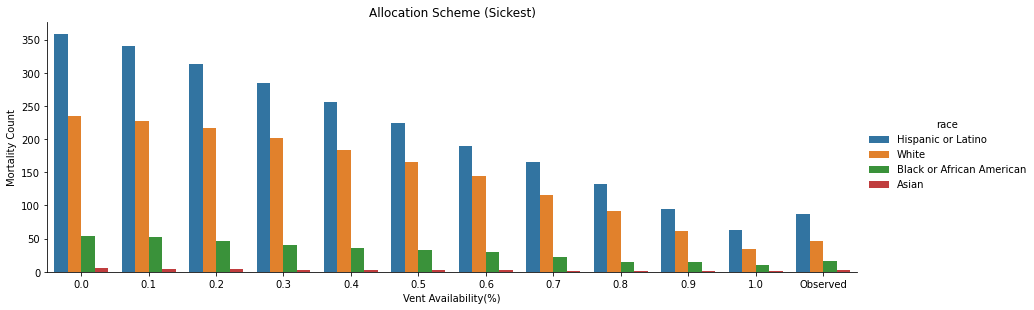

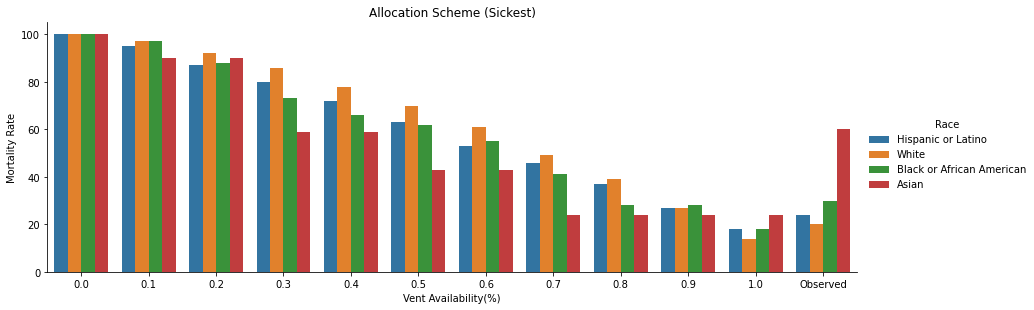

In [53]:
visualize_count_mortality(df_baseline_sickest, 'Sickest')
visualize_percentage_mortality(df_baseline_sickest, 'Sickest')

# Allocate ventilators (Simulation)

## New York

In [54]:
ls_df_count_death_race_level = [] # Store dataframes for all scarcity levels
#ls_df_count_death_race_level.append(death_race_baseline)

for pct in vent_availability_pct:
    print('-------------------------{}-------------------------'.format(pct))
    ls_df_alloc_iter = []               # Store allocated dataframes within iteration
    ls_df_count_death_race_iter = []    # Store dataframes of racial death counts within iteration
    ls_dict_count_death_race_iter = []  # Store dictionary of racial death counts within iteration

    for _ in range(iter_simulation):    # Iterate 1000 times per scarcity level
        # Allocate ventilators to patients
        allocation = Allocation(df_sample, pct, calibration_sofa_mortality)
        df_death = allocation.new_york()
        
        # Convert dictionary to dataframe
        dict_count_death_race = Counter(df_death['race_display'])

        ls_df_count_death_race_iter.append(df_death)
    
    df_count_death_race_level = pd.concat(ls_df_count_death_race_iter)
    df_count_death_race_level.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_count_death_race_level = df_count_death_race_level.groupby('race').agg(['mean']).round(0).astype(int)
    df_count_death_race_level = df_count_death_race_level.reset_index(level=['race'], col_level=1)
    df_count_death_race_level.columns = df_count_death_race_level.columns.droplevel(0)
    df_count_death_race_level.rename(columns={'mean': 'count_death'}, inplace=True)

    df_count_death_race_level['level'] = round(pct, 1)
    df_count_death_race_level['type_allocation'] = 'New York'
    df_count_death_race_level['avg_death'] = statistics.mean(df_count_death_race_level.loc[: ,'count_death'])
    df_count_death_race_level['percentage_death'] = df_count_death_race_level.apply(lambda row: percentage_death(row), axis=1)
    
    ls_df_count_death_race_level.append(df_count_death_race_level)

df_new_york = pd.concat(ls_df_count_death_race_level)
df_baseline_new_york = pd.concat([death_race_baseline, df_new_york])
df_baseline_new_york[['count_death', 'avg_death', 'percentage_death']] = df_baseline_new_york[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

-------------------------0.0-------------------------
-------------------------0.1-------------------------
-------------------------0.2-------------------------
-------------------------0.30000000000000004-------------------------
-------------------------0.4-------------------------
-------------------------0.5-------------------------
-------------------------0.6000000000000001-------------------------
-------------------------0.7000000000000001-------------------------
-------------------------0.8-------------------------
-------------------------0.9-------------------------
-------------------------1.0-------------------------


In [55]:
df_new_york_tb = df_baseline_new_york.loc[df_baseline_new_york['level']!='Observed', ['race', 'count_death', 'level', 'type_allocation']].copy()
display(df_new_york_tb)

race  count_death  level type_allocation
0         Hispanic or Latino           87    2.0        Baseline
1                      White           46    2.0        Baseline
2  Black or African American           16    2.0        Baseline
3                      Asian            3    2.0        Baseline
0                      Asian            5    0.0        New York
1  Black or African American           54    0.0        New York
2         Hispanic or Latino          358    0.0        New York
3                      White          235    0.0        New York
0                      Asian            5    0.1        New York
1  Black or African American           51    0.1        New York
2         Hispanic or Latino          323    0.1        New York
3                      White          208    0.1        New York
0                      Asian            5    0.2        New York
1  Black or African American           48    0.2        New York
2         Hispanic or Latino          290    0.2        New York
3                      White          179    0.2        New York
0                      Asian            5    0.3        New York
1  Black or African American           41    0.3        New York
2         Hispanic or Latino          261    0.3        New York
3                      White          149    0.3        New York
0                      Asian            4    0.4        New York
1  Black or African American           34    0.4        New York
2         Hispanic or Latino          232    0.4        New York
3                      White          125    0.4        New York
0                      Asian            4    0.5        New York
1  Black or African American           30    0.5        New York
2         Hispanic or Latino          196    0.5        New York
3                      White          104    0.5        New York
0                      Asian            3    0.6        New York
1  Black or African American           29    0.6        New York
2         Hispanic or Latino          165    0.6        New York
3                      White           86    0.6        New York
0                      Asian            3    0.7        New York
1  Black or African American           24    0.7        New York
2         Hispanic or Latino          137    0.7        New York
3                      White           67    0.7        New York
0                      Asian            2    0.8        New York
1  Black or African American           16    0.8        New York
2         Hispanic or Latino          109    0.8        New York
3                      White           53    0.8        New York
0                      Asian            2    0.9        New York
1  Black or African American           12    0.9        New York
2         Hispanic or Latino           81    0.9        New York
3                      White           40    0.9        New York
0                      Asian            1    1.0        New York
1  Black or African American           10    1.0        New York
2         Hispanic or Latino           63    1.0        New York
3                      White           34    1.0        New York

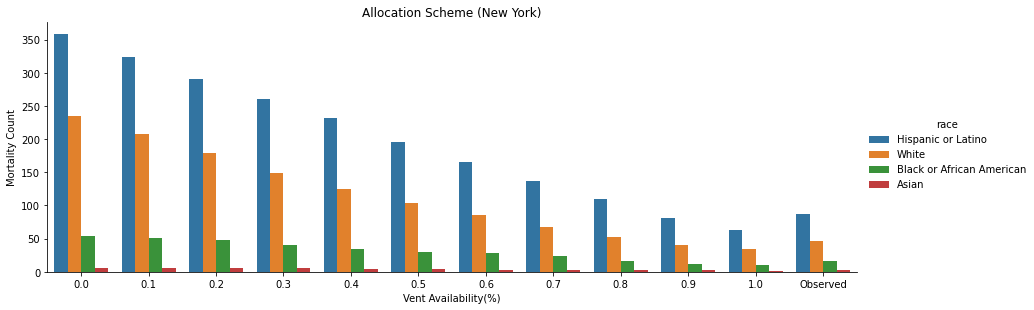

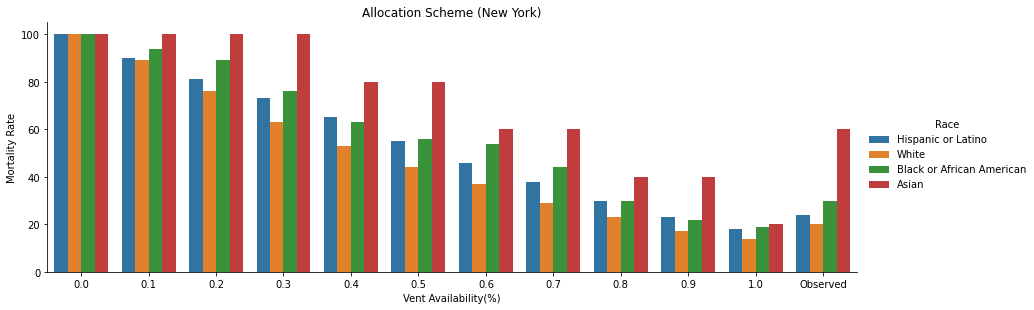

In [56]:
visualize_count_mortality(df_baseline_new_york, 'New York')
visualize_percentage_mortality(df_baseline_new_york, 'New York')

## Lottery

In [57]:
ls_df_count_death_race_level = [] # Store dataframes for all scarcity levels
#ls_df_count_death_race_level.append(death_race_baseline)

for pct in vent_availability_pct:
    print('-------------------------{}-------------------------'.format(pct))
    ls_df_alloc_iter = []               # Store allocated dataframes within iteration
    ls_df_count_death_race_iter = []    # Store dataframes of racial death counts within iteration
    ls_dict_count_death_race_iter = []  # Store dictionary of racial death counts within iteration

    for _ in range(iter_simulation):    # Iterate 1000 times per scarcity level

        allocation = Allocation(df_sample, pct, calibration_sofa_mortality)
        df_death = allocation.lottery()
        
        # Convert dictionary to dataframe
        dict_count_death_race = Counter(df_death['race_display'])
        
        ls_df_count_death_race_iter.append(df_death)
    
    df_count_death_race_level = pd.concat(ls_df_count_death_race_iter)
    df_count_death_race_level.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_count_death_race_level = df_count_death_race_level.groupby('race').agg(['mean']).round(0).astype(int)
    df_count_death_race_level = df_count_death_race_level.reset_index(level=['race'], col_level=1)
    df_count_death_race_level.columns = df_count_death_race_level.columns.droplevel(0)
    df_count_death_race_level.rename(columns={'mean': 'count_death'}, inplace=True)
    
    df_count_death_race_level['level'] = round(pct, 1)
    df_count_death_race_level['type_allocation'] = 'Lottery'
    df_count_death_race_level['avg_death'] = statistics.mean(df_count_death_race_level.loc[: ,'count_death'])
    df_count_death_race_level['percentage_death'] = df_count_death_race_level.apply(lambda row: percentage_death(row), axis=1)
    
    ls_df_count_death_race_level.append(df_count_death_race_level)

df_lottery = pd.concat(ls_df_count_death_race_level)
df_baseline_lottery = pd.concat([death_race_baseline, df_lottery])
df_baseline_lottery[['count_death', 'avg_death', 'percentage_death']] = df_baseline_lottery[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

-------------------------0.0-------------------------
-------------------------0.1-------------------------
-------------------------0.2-------------------------
-------------------------0.30000000000000004-------------------------
-------------------------0.4-------------------------
-------------------------0.5-------------------------
-------------------------0.6000000000000001-------------------------
-------------------------0.7000000000000001-------------------------
-------------------------0.8-------------------------
-------------------------0.9-------------------------
-------------------------1.0-------------------------


In [58]:
df_lottery_tb = df_baseline_lottery.loc[df_baseline_lottery['level']!='Observed', ['race', 'count_death', 'level', 'type_allocation']].copy()
display(df_lottery_tb)

race  count_death  level type_allocation
0         Hispanic or Latino           87    2.0        Baseline
1                      White           46    2.0        Baseline
2  Black or African American           16    2.0        Baseline
3                      Asian            3    2.0        Baseline
0                      Asian            5    0.0         Lottery
1  Black or African American           54    0.0         Lottery
2         Hispanic or Latino          358    0.0         Lottery
3                      White          235    0.0         Lottery
0                      Asian            5    0.1         Lottery
1  Black or African American           52    0.1         Lottery
2         Hispanic or Latino          319    0.1         Lottery
3                      White          222    0.1         Lottery
0                      Asian            4    0.2         Lottery
1  Black or African American           42    0.2         Lottery
2         Hispanic or Latino          294    0.2         Lottery
3                      White          204    0.2         Lottery
0                      Asian            4    0.3         Lottery
1  Black or African American           41    0.3         Lottery
2         Hispanic or Latino          263    0.3         Lottery
3                      White          181    0.3         Lottery
0                      Asian            4    0.4         Lottery
1  Black or African American           37    0.4         Lottery
2         Hispanic or Latino          236    0.4         Lottery
3                      White          161    0.4         Lottery
0                      Asian            3    0.5         Lottery
1  Black or African American           33    0.5         Lottery
2         Hispanic or Latino          195    0.5         Lottery
3                      White          151    0.5         Lottery
0                      Asian            3    0.6         Lottery
1  Black or African American           28    0.6         Lottery
2         Hispanic or Latino          164    0.6         Lottery
3                      White          132    0.6         Lottery
0                      Asian            3    0.7         Lottery
1  Black or African American           24    0.7         Lottery
2         Hispanic or Latino          131    0.7         Lottery
3                      White          116    0.7         Lottery
0                      Asian            3    0.8         Lottery
1  Black or African American           21    0.8         Lottery
2         Hispanic or Latino          101    0.8         Lottery
3                      White           93    0.8         Lottery
0                      Asian            2    0.9         Lottery
1  Black or African American           16    0.9         Lottery
2         Hispanic or Latino           78    0.9         Lottery
3                      White           68    0.9         Lottery
0                      Asian            1    1.0         Lottery
1  Black or African American           10    1.0         Lottery
2         Hispanic or Latino           63    1.0         Lottery
3                      White           34    1.0         Lottery

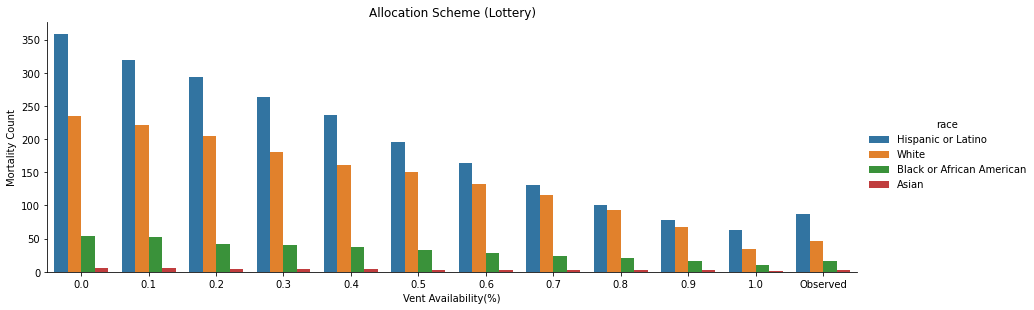

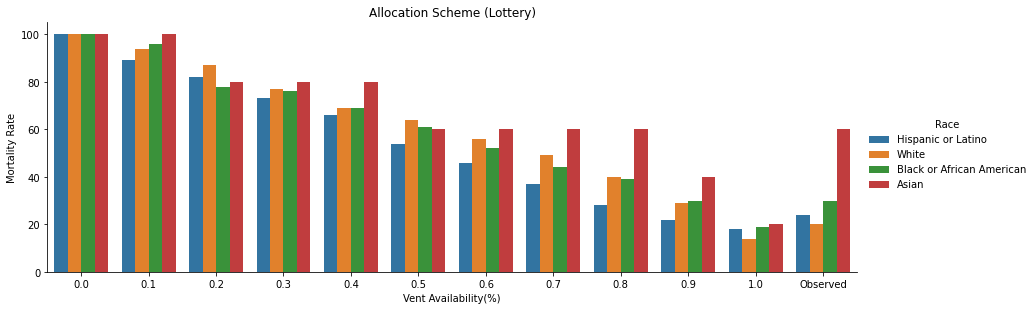

In [59]:
visualize_count_mortality(df_baseline_lottery, 'Lottery')
visualize_percentage_mortality(df_baseline_lottery, 'Lottery')

# Total

In [62]:
df_csc_all = pd.concat([
    df_new_york[['type_allocation', 'level', 'avg_death']], 
    df_maryland[['type_allocation', 'level', 'avg_death']], 
    df_max_lives_years[['type_allocation', 'level', 'avg_death']], 
    df_youngest[['type_allocation', 'level', 'avg_death']], 
    df_sickest[['type_allocation', 'level', 'avg_death']], 
    df_lottery[['type_allocation', 'level', 'avg_death']], 
])

In [ ]:
def visualize_percentage_mortality(df, policy):
    df['level'] = df['level'].replace(to_replace=[2.0], value=['Observed'])
    x_val = list(df['level'].unique())
    x_val.append(x_val.pop(0))
    sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', data=df, kind='bar', order=x_val, height=4, aspect=3)
    plt.title('Allocation Scheme ({})'.format(policy))
    plt.xlabel('Vent Availability(%)')
    plt.ylabel('Mortality Rate')
    sns_plot._legend.set_title('Race')
    sns_plot.savefig("figures_new/percentage_death_{}.png".format(policy))

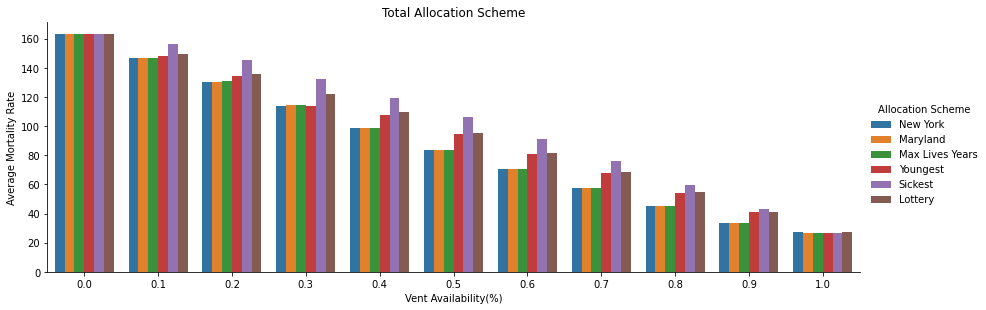

In [271]:
#%matplotlib qt
sns_plot = sns.catplot(x='level', y='avg_death', hue='type_allocation', data=df_csc_all[df_csc_all['level']!=2.0], kind='bar', legend_out=True, height=4, aspect=3)
plt.title('Total Allocation Scheme')
sns_plot._legend.set_title('Allocation Scheme')
plt.xlabel('Vent Availability(%)')
plt.ylabel('Average Mortality Rate')
sns_plot.savefig("figures_new/percentage_death_total_avg.png")

# Statistics

In [64]:
count_race

Counter({'Hispanic or Latino': 358,
         'White': 235,
         'Black or African American': 54,
         'Asian': 5})

## Table: Racial group mortality

In [272]:
df_tb_comb = pd.concat([df_maryland_tb, df_new_york_tb, df_max_lives_years_tb, df_youngest_tb, df_sickest_tb, df_lottery_tb])
df_tb_comb.reset_index(drop=True, inplace=True)
df_tb_comb.rename(columns={'type_allocation': 'allocation', 'level': 'vent availability(%)'}, inplace=True)

for i, value in df_tb_comb.iterrows():
    if df_tb_comb.loc[i, 'race']=='Hispanic or Latino':
        df_tb_comb.loc[i, 'count_patients'] = count_race['Hispanic or Latino']
    elif df_tb_comb.loc[i, 'race']=='White':
        df_tb_comb.loc[i, 'count_patients'] = count_race['White']
    elif df_tb_comb.loc[i, 'race']=='Black or African American':
        df_tb_comb.loc[i, 'count_patients'] = count_race['Black or African American']
    elif df_tb_comb.loc[i, 'race']=='Asian':
        df_tb_comb.loc[i, 'count_patients'] = count_race['Asian']
        
    df_tb_comb.loc[i, 'mortality'] = round(df_tb_comb.loc[i, 'count_death']/df_tb_comb.loc[i, 'count_patients']*100, 1)

df_tb_comb

race  count_death  vent availability(%) allocation  \
0                        Asian            5                   0.0   Maryland   
1    Black or African American           54                   0.0   Maryland   
2           Hispanic or Latino          358                   0.0   Maryland   
3                        White          235                   0.0   Maryland   
4                        Asian            5                   0.1   Maryland   
..                         ...          ...                   ...        ...   
279                      White           68                   0.9    Lottery   
280                      Asian            1                   1.0    Lottery   
281  Black or African American           10                   1.0    Lottery   
282         Hispanic or Latino           63                   1.0    Lottery   
283                      White           34                   1.0    Lottery   

     count_patients  mortality  
0               5.0      100.0  
1              54.0      100.0  
2             358.0      100.0  
3             235.0      100.0  
4               5.0      100.0  
..              ...        ...  
279           235.0       28.9  
280             5.0       20.0  
281            54.0       18.5  
282           358.0       17.6  
283           235.0       14.5  

[284 rows x 6 columns]

In [273]:
cols_order_allocation = ['Maryland', 'New York', 'Max Lives Years', 'Youngest', 'Sickest', 'Lottery']
cols_order_race = ['White', 'Hispanic or Latino', 'Black or African American', 'Asian']
df_tb_comb['allocation'] = df_tb_comb['allocation'].astype(pd.api.types.CategoricalDtype(categories=cols_order_allocation))
df_tb_comb['race'] = df_tb_comb['race'].astype(pd.api.types.CategoricalDtype(categories=cols_order_race))
df_tb_pivot = df_tb_comb.pivot_table(values='mortality', columns='vent availability(%)', index=['allocation', 'race'])

dfi.export(df_tb_pivot, 'figures_new/tb_mortality.png')
df_tb_pivot

vent availability(%)                         0.0    0.1    0.2    0.3   0.4  \
allocation      race                                                          
Maryland        White                      100.0   85.5   75.7   64.7  53.6   
                Hispanic or Latino         100.0   92.2   81.3   71.8  64.5   
                Black or African American  100.0   94.4   88.9   79.6  63.0   
                Asian                      100.0  100.0  100.0  100.0  80.0   
New York        White                      100.0   88.5   76.2   63.4  53.2   
                Hispanic or Latino         100.0   90.2   81.0   72.9  64.8   
                Black or African American  100.0   94.4   88.9   75.9  63.0   
                Asian                      100.0  100.0  100.0  100.0  80.0   
Max Lives Years White                      100.0   86.0   76.2   64.3  53.2   
                Hispanic or Latino         100.0   92.2   81.0   72.3  65.1   
                Black or African American  100.0   92.6   88.9   77.8  61.1   
                Asian                      100.0  100.0  100.0  100.0  80.0   
Youngest        White                      100.0   91.1   83.8   71.9  66.8   
                Hispanic or Latino         100.0   90.8   81.3   67.6  64.5   
                Black or African American  100.0   90.7   81.5   75.9  72.2   
                Asian                      100.0  100.0   80.0   80.0  60.0   
Sickest         White                      100.0   97.0   91.9   86.0  77.9   
                Hispanic or Latino         100.0   95.3   87.4   79.6  71.5   
                Black or African American  100.0   96.3   87.0   74.1  66.7   
                Asian                      100.0   80.0   80.0   60.0  60.0   
Lottery         White                      100.0   94.5   86.8   77.0  68.5   
                Hispanic or Latino         100.0   89.1   82.1   73.5  65.9   
                Black or African American  100.0   96.3   77.8   75.9  68.5   
                Asian                      100.0  100.0   80.0   80.0  80.0   

vent availability(%)                        0.5   0.6   0.7   0.8   0.9   1.0  
allocation      race                                                           
Maryland        White                      45.5  37.0  28.9  23.0  17.4  14.5  
                Hispanic or Latino         53.9  45.5  38.0  30.2  22.3  17.6  
                Black or African American  57.4  51.9  44.4  29.6  22.2  18.5  
                Asian                      80.0  80.0  60.0  40.0  40.0  20.0  
New York        White                      44.3  36.6  28.5  22.6  17.0  14.5  
                Hispanic or Latino         54.7  46.1  38.3  30.4  22.6  17.6  
                Black or African American  55.6  53.7  44.4  29.6  22.2  18.5  
                Asian                      80.0  60.0  60.0  40.0  40.0  20.0  
Max Lives Years White                      45.1  37.0  28.9  23.4  17.0  14.5  
                Hispanic or Latino         54.5  45.8  38.0  29.9  22.6  17.6  
                Black or African American  55.6  51.9  44.4  29.6  22.2  18.5  
                Asian                      80.0  60.0  60.0  40.0  40.0  20.0  
Youngest        White                      59.6  52.8  45.1  34.9  25.5  14.5  
                Hispanic or Latino         55.6  46.1  38.3  31.6  24.6  17.6  
                Black or African American  66.7  59.3  48.1  37.0  29.6  18.5  
                Asian                      40.0  40.0  40.0  20.0  20.0  20.0  
Sickest         White                      70.2  61.3  49.4  38.7  26.4  14.5  
                Hispanic or Latino         62.8  53.1  46.1  36.9  26.5  17.6  
                Black or African American  61.1  55.6  40.7  27.8  27.8  18.5  
                Asian                      40.0  40.0  20.0  20.0  20.0  20.0  
Lottery         White                      64.3  56.2  49.4  39.6  28.9  14.5  
                Hispanic or Latino         54.5  45.8  36.6  28.2  21.8  17.6  
                Black or 

## Table: Max-Min Difference

In [274]:
cols_max_min = ['allocation', 0.0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_tmp = df_tb_pivot.reset_index(level=['allocation', 'race'], col_level=1)
df_tmp = df_tmp.loc[df_tmp['race']!='Asian', cols_max_min]
df_tmp

vent availability(%)       allocation    0.0   0.1   0.2   0.3   0.4   0.5  \
0                            Maryland  100.0  85.5  75.7  64.7  53.6  45.5   
1                            Maryland  100.0  92.2  81.3  71.8  64.5  53.9   
2                            Maryland  100.0  94.4  88.9  79.6  63.0  57.4   
4                            New York  100.0  88.5  76.2  63.4  53.2  44.3   
5                            New York  100.0  90.2  81.0  72.9  64.8  54.7   
6                            New York  100.0  94.4  88.9  75.9  63.0  55.6   
8                     Max Lives Years  100.0  86.0  76.2  64.3  53.2  45.1   
9                     Max Lives Years  100.0  92.2  81.0  72.3  65.1  54.5   
10                    Max Lives Years  100.0  92.6  88.9  77.8  61.1  55.6   
12                           Youngest  100.0  91.1  83.8  71.9  66.8  59.6   
13                           Youngest  100.0  90.8  81.3  67.6  64.5  55.6   
14                           Youngest  100.0  90.7  81.5  75.9  72.2  66.7   
16                            Sickest  100.0  97.0  91.9  86.0  77.9  70.2   
17                            Sickest  100.0  95.3  87.4  79.6  71.5  62.8   
18                            Sickest  100.0  96.3  87.0  74.1  66.7  61.1   
20                            Lottery  100.0  94.5  86.8  77.0  68.5  64.3   
21                            Lottery  100.0  89.1  82.1  73.5  65.9  54.5   
22                            Lottery  100.0  96.3  77.8  75.9  68.5  61.1   

vent availability(%)   0.6   0.7   0.8   0.9   1.0  
0                     37.0  28.9  23.0  17.4  14.5  
1                     45.5  38.0  30.2  22.3  17.6  
2                     51.9  44.4  29.6  22.2  18.5  
4                     36.6  28.5  22.6  17.0  14.5  
5                     46.1  38.3  30.4  22.6  17.6  
6                     53.7  44.4  29.6  22.2  18.5  
8                     37.0  28.9  23.4  17.0  14.5  
9                     45.8  38.0  29.9  22.6  17.6  
10                    51.9  44.4  29.6  22.2  18.5  
12                    52.8  45.1  34.9  25.5  14.5  
13                    46.1  38.3  31.6  24.6  17.6  
14                    59.3  48.1  37.0  29.6  18.5  
16                    61.3  49.4  38.7  26.4  14.5  
17                    53.1  46.1  36.9  26.5  17.6  
18                    55.6  40.7  27.8  27.8  18.5  
20                    56.2  49.4  39.6  28.9  14.5  
21                    45.8  36.6  28.2  21.8  17.6  
22                    51.9  44.4  38.9  29.6  18.5

In [275]:
df_tmp.groupby('allocation').agg(['max', 'min'])

0.0          0.1         0.2         0.3         0.4        \
                   max    min   max   min   max   min   max   min   max   min   
allocation                                                                      
Maryland         100.0  100.0  94.4  85.5  88.9  75.7  79.6  64.7  64.5  53.6   
New York         100.0  100.0  94.4  88.5  88.9  76.2  75.9  63.4  64.8  53.2   
Max Lives Years  100.0  100.0  92.6  86.0  88.9  76.2  77.8  64.3  65.1  53.2   
Youngest         100.0  100.0  91.1  90.7  83.8  81.3  75.9  67.6  72.2  64.5   
Sickest          100.0  100.0  97.0  95.3  91.9  87.0  86.0  74.1  77.9  66.7   
Lottery          100.0  100.0  96.3  89.1  86.8  77.8  77.0  73.5  68.5  65.9   

                  0.5         0.6         0.7         0.8         0.9        \
                  max   min   max   min   max   min   max   min   max   min   
allocation                                                                    
Maryland         57.4  45.5  51.9  37.0  44.4  28.9  30.2  23.0  22.3  17.4   
New York         55.6  44.3  53.7  36.6  44.4  28.5  30.4  22.6  22.6  17.0   
Max Lives Years  55.6  45.1  51.9  37.0  44.4  28.9  29.9  23.4  22.6  17.0   
Youngest         66.7  55.6  59.3  46.1  48.1  38.3  37.0  31.6  29.6  24.6   
Sickest          70.2  61.1  61.3  53.1  49.4  40.7  38.7  27.8  27.8  26.4   
Lottery          64.3  54.5  56.2  45.8  49.4  36.6  39.6  28.2  29.6  21.8   

                  1.0        
                  max   min  
allocation                   
Maryland         18.5  14.5  
New York         18.5  14.5  
Max Lives Years  18.5  14.5  
Youngest         18.5  14.5  
Sickest          18.5  14.5  
Lottery          18.5  14.5

In [277]:
cols_order_allocation = ['Maryland', 'New York', 'Max Lives Years', 'Youngest', 'Sickest', 'Lottery']
df_diff_max_min = df_tmp.groupby('allocation').agg(np.ptp)
#df_diff_max_min.rename(index={'allocation':'allocation'}, inplace=True)
df_diff_max_min = df_diff_max_min.reindex(cols_order_allocation)
df_diff_max_min

vent availability(%)  0.0  0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8  0.9  \
allocation                                                                      
Maryland              0.0  8.9  13.2  14.9  10.9  11.9  14.9  15.5   7.2  4.9   
New York              0.0  5.9  12.7  12.5  11.6  11.3  17.1  15.9   7.8  5.6   
Max Lives Years       0.0  6.6  12.7  13.5  11.9  10.5  14.9  15.5   6.5  5.6   
Youngest              0.0  0.4   2.5   8.3   7.7  11.1  13.2   9.8   5.4  5.0   
Sickest               0.0  1.7   4.9  11.9  11.2   9.1   8.2   8.7  10.9  1.4   
Lottery               0.0  7.2   9.0   3.5   2.6   9.8  10.4  12.8  11.4  7.8   

vent availability(%)  1.0  
allocation                 
Maryland              4.0  
New York              4.0  
Max Lives Years       4.0  
Youngest              4.0  
Sickest               4.0  
Lottery               4.0

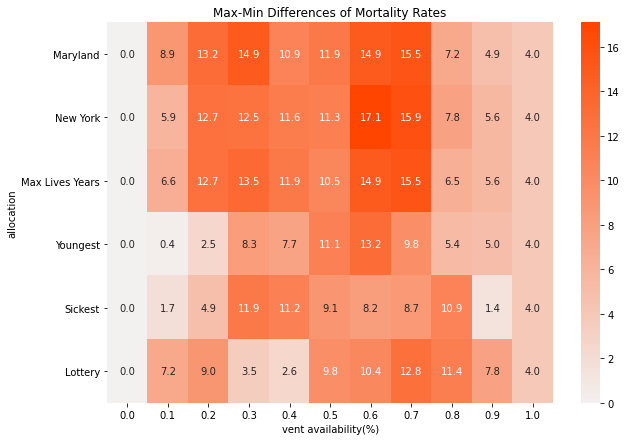

In [278]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_diff_max_min, annot=True, fmt='.1f', cmap=sns.light_palette("#FF4500", as_cmap=True))
plt.title('Max-Min Differences of Mortality Rates')
plt.savefig("figures_new/heat_mortality_diff_max_min.png")

In [248]:
display(df_diff_max_min.mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_max_min.mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_max_min_allo.png')

display(df_diff_max_min.mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_max_min.mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_max_min_avai.png')

AVG
type_allocation     
Maryland         9.7
New York         9.5
Max Lives Years  9.2
Youngest         6.1
Sickest          6.5
Lottery          7.1

AVG
availability(%)      
0.0               0.0
0.1               5.1
0.2               9.2
0.3              10.8
0.4               9.3
0.5              10.6
0.6              13.1
0.7              13.0
0.8               8.2
0.9               5.1
1.0               4.0

In [279]:
ls_avai_1_9 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [254]:
display(df_diff_max_min[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_max_min[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_max_min_allo_0.1_0.9.png')

display(df_diff_max_min[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_max_min[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_max_min_avai_0.1_0.9.png')

AVG
type_allocation      
Maryland         11.4
New York         11.2
Max Lives Years  10.9
Youngest          7.0
Sickest           7.6
Lottery           8.3

AVG
availability(%)      
0.1               5.1
0.2               9.2
0.3              10.8
0.4               9.3
0.5              10.6
0.6              13.1
0.7              13.0
0.8               8.2
0.9               5.1

## Table: Minority-White Difference (Reference Point: Best Group)

In [280]:
cols_minor_white = ['allocation', 'race', 0.0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_tmp = df_tb_pivot.reset_index(level=['allocation', 'race'], col_level=1)
df_tmp = df_tmp.loc[df_tmp['race']!='Asian', cols_minor_white]
df_tmp

vent availability(%)       allocation                       race    0.0   0.1  \
0                            Maryland                      White  100.0  85.5   
1                            Maryland         Hispanic or Latino  100.0  92.2   
2                            Maryland  Black or African American  100.0  94.4   
4                            New York                      White  100.0  88.5   
5                            New York         Hispanic or Latino  100.0  90.2   
6                            New York  Black or African American  100.0  94.4   
8                     Max Lives Years                      White  100.0  86.0   
9                     Max Lives Years         Hispanic or Latino  100.0  92.2   
10                    Max Lives Years  Black or African American  100.0  92.6   
12                           Youngest                      White  100.0  91.1   
13                           Youngest         Hispanic or Latino  100.0  90.8   
14                           Youngest  Black or African American  100.0  90.7   
16                            Sickest                      White  100.0  97.0   
17                            Sickest         Hispanic or Latino  100.0  95.3   
18                            Sickest  Black or African American  100.0  96.3   
20                            Lottery                      White  100.0  94.5   
21                            Lottery         Hispanic or Latino  100.0  89.1   
22                            Lottery  Black or African American  100.0  96.3   

vent availability(%)   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.0  
0                     75.7  64.7  53.6  45.5  37.0  28.9  23.0  17.4  14.5  
1                     81.3  71.8  64.5  53.9  45.5  38.0  30.2  22.3  17.6  
2                     88.9  79.6  63.0  57.4  51.9  44.4  29.6  22.2  18.5  
4                     76.2  63.4  53.2  44.3  36.6  28.5  22.6  17.0  14.5  
5                     81.0  72.9  64.8  54.7  46.1  38.3  30.4  22.6  17.6  
6                     88.9  75.9  63.0  55.6  53.7  44.4  29.6  22.2  18.5  
8                     76.2  64.3  53.2  45.1  37.0  28.9  23.4  17.0  14.5  
9                     81.0  72.3  65.1  54.5  45.8  38.0  29.9  22.6  17.6  
10                    88.9  77.8  61.1  55.6  51.9  44.4  29.6  22.2  18.5  
12                    83.8  71.9  66.8  59.6  52.8  45.1  34.9  25.5  14.5  
13                    81.3  67.6  64.5  55.6  46.1  38.3  31.6  24.6  17.6  
14                    81.5  75.9  72.2  66.7  59.3  48.1  37.0  29.6  18.5  
16                    91.9  86.0  77.9  70.2  61.3  49.4  38.7  26.4  14.5  
17                    87.4  79.6  71.5  62.8  53.1  46.1  36.9  26.5  17.6  
18                    87.0  74.1  66.7  61.1  55.6  40.7  27.8  27.8  18.5  
20                    86.8  77.0  68.5  64.3  56.2  49.4  39.6  28.9  14.5  
21                    82.1  73.5  65.9  54.5  45.8  36.6  28.2  21.8  17.6  
22                    77.8  75.9  68.5  61.1  51.9  44.4  38.9  29.6  18.5

In [281]:
df_h = df_tmp.loc[df_tmp['race']=='Hispanic or Latino', ['allocation', 0.0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]].set_index('allocation')
df_h

vent availability(%)    0.0   0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8  \
allocation                                                                    
Maryland              100.0  92.2  81.3  71.8  64.5  53.9  45.5  38.0  30.2   
New York              100.0  90.2  81.0  72.9  64.8  54.7  46.1  38.3  30.4   
Max Lives Years       100.0  92.2  81.0  72.3  65.1  54.5  45.8  38.0  29.9   
Youngest              100.0  90.8  81.3  67.6  64.5  55.6  46.1  38.3  31.6   
Sickest               100.0  95.3  87.4  79.6  71.5  62.8  53.1  46.1  36.9   
Lottery               100.0  89.1  82.1  73.5  65.9  54.5  45.8  36.6  28.2   

vent availability(%)   0.9   1.0  
allocation                        
Maryland              22.3  17.6  
New York              22.6  17.6  
Max Lives Years       22.6  17.6  
Youngest              24.6  17.6  
Sickest               26.5  17.6  
Lottery               21.8  17.6

In [282]:
df_b = df_tmp.loc[df_tmp['race']=='Black or African American', ['allocation', 0.0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]].set_index('allocation')
df_b

vent availability(%)    0.0   0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8  \
allocation                                                                    
Maryland              100.0  94.4  88.9  79.6  63.0  57.4  51.9  44.4  29.6   
New York              100.0  94.4  88.9  75.9  63.0  55.6  53.7  44.4  29.6   
Max Lives Years       100.0  92.6  88.9  77.8  61.1  55.6  51.9  44.4  29.6   
Youngest              100.0  90.7  81.5  75.9  72.2  66.7  59.3  48.1  37.0   
Sickest               100.0  96.3  87.0  74.1  66.7  61.1  55.6  40.7  27.8   
Lottery               100.0  96.3  77.8  75.9  68.5  61.1  51.9  44.4  38.9   

vent availability(%)   0.9   1.0  
allocation                        
Maryland              22.2  18.5  
New York              22.2  18.5  
Max Lives Years       22.2  18.5  
Youngest              29.6  18.5  
Sickest               27.8  18.5  
Lottery               29.6  18.5

In [283]:
df_w = df_tmp.loc[df_tmp['race']=='White', ['allocation', 0.0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]].set_index('allocation')
df_w

vent availability(%)    0.0   0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8  \
allocation                                                                    
Maryland              100.0  85.5  75.7  64.7  53.6  45.5  37.0  28.9  23.0   
New York              100.0  88.5  76.2  63.4  53.2  44.3  36.6  28.5  22.6   
Max Lives Years       100.0  86.0  76.2  64.3  53.2  45.1  37.0  28.9  23.4   
Youngest              100.0  91.1  83.8  71.9  66.8  59.6  52.8  45.1  34.9   
Sickest               100.0  97.0  91.9  86.0  77.9  70.2  61.3  49.4  38.7   
Lottery               100.0  94.5  86.8  77.0  68.5  64.3  56.2  49.4  39.6   

vent availability(%)   0.9   1.0  
allocation                        
Maryland              17.4  14.5  
New York              17.0  14.5  
Max Lives Years       17.0  14.5  
Youngest              25.5  14.5  
Sickest               26.4  14.5  
Lottery               28.9  14.5

### Hispanic-White (Absolute Difference)

In [284]:
df_diff_h_w_ab = df_h.subtract(df_w)
df_diff_h_w_ab

vent availability(%)  0.0  0.1  0.2  0.3   0.4   0.5   0.6   0.7   0.8  0.9  \
allocation                                                                    
Maryland              0.0  6.7  5.6  7.1  10.9   8.4   8.5   9.1   7.2  4.9   
New York              0.0  1.7  4.8  9.5  11.6  10.4   9.5   9.8   7.8  5.6   
Max Lives Years       0.0  6.2  4.8  8.0  11.9   9.4   8.8   9.1   6.5  5.6   
Youngest              0.0 -0.3 -2.5 -4.3  -2.3  -4.0  -6.7  -6.8  -3.3 -0.9   
Sickest               0.0 -1.7 -4.5 -6.4  -6.4  -7.4  -8.2  -3.3  -1.8  0.1   
Lottery               0.0 -5.4 -4.7 -3.5  -2.6  -9.8 -10.4 -12.8 -11.4 -7.1   

vent availability(%)  1.0  
allocation                 
Maryland              3.1  
New York              3.1  
Max Lives Years       3.1  
Youngest              3.1  
Sickest               3.1  
Lottery               3.1

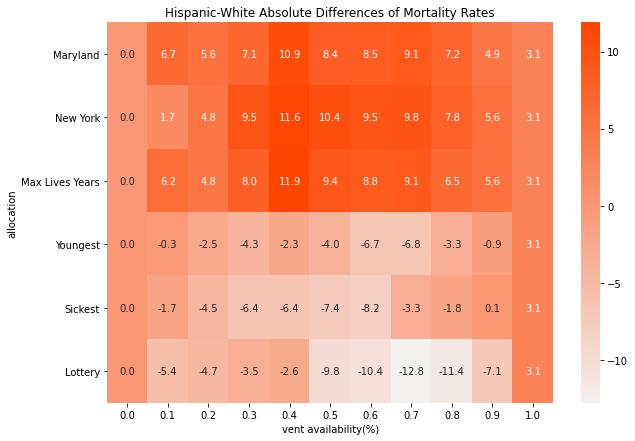

In [285]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_diff_h_w_ab, annot=True, fmt='.1f', cmap=sns.light_palette("#FF4500", as_cmap=True))
plt.title('Hispanic-White Absolute Differences of Mortality Rates')
plt.savefig("figures_new/heat_mortality_diff_h_w_ab.png")

In [238]:
display(df_diff_h_w_ab.mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_w_ab.mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_h_w_ab_allo.png')

display(df_diff_h_w_ab.mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_w_ab.mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_h_w_ab_avai.png')

In [255]:
display(df_diff_h_w_ab[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_w_ab[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_h_w_ab_allo_0.1_0.9.png')

display(df_diff_h_w_ab[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_w_ab[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_h_w_ab_avai_0.1_0.9.png')

AVG
type_allocation     
Maryland         7.6
New York         7.9
Max Lives Years  7.8
Youngest        -3.5
Sickest         -4.4
Lottery         -7.5

AVG
availability(%)     
0.1              1.2
0.2              0.6
0.3              1.7
0.4              3.8
0.5              1.2
0.6              0.2
0.7              0.9
0.8              0.8
0.9              1.4

### Hispanic-White (Relative Difference)

In [286]:
df_diff_h_w_re = df_h.subtract(df_w)
df_diff_h_w_re = df_diff_h_w_re.divide(df_w)*100
df_diff_h_w_re = df_diff_h_w_re.round(1)
df_diff_h_w_re

vent availability(%)  0.0  0.1  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9  \
allocation                                                                      
Maryland              0.0  7.8  7.4  11.0  20.3  18.5  23.0  31.5  31.3  28.2   
New York              0.0  1.9  6.3  15.0  21.8  23.5  26.0  34.4  34.5  32.9   
Max Lives Years       0.0  7.2  6.3  12.4  22.4  20.8  23.8  31.5  27.8  32.9   
Youngest              0.0 -0.3 -3.0  -6.0  -3.4  -6.7 -12.7 -15.1  -9.5  -3.5   
Sickest               0.0 -1.8 -4.9  -7.4  -8.2 -10.5 -13.4  -6.7  -4.7   0.4   
Lottery               0.0 -5.7 -5.4  -4.5  -3.8 -15.2 -18.5 -25.9 -28.8 -24.6   

vent availability(%)   1.0  
allocation                  
Maryland              21.4  
New York              21.4  
Max Lives Years       21.4  
Youngest              21.4  
Sickest               21.4  
Lottery               21.4

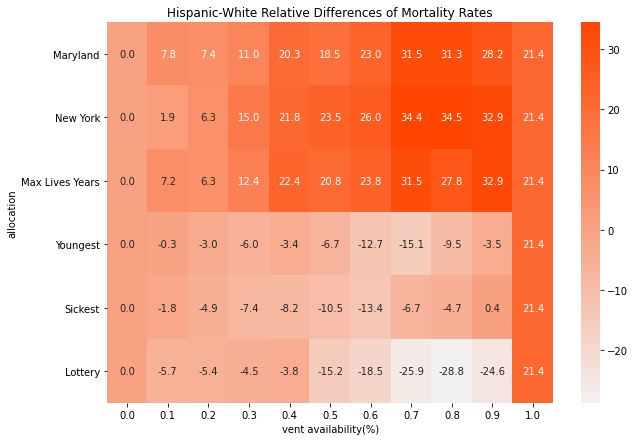

In [287]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_diff_h_w_re, annot=True, fmt='.1f', cmap=sns.light_palette("#FF4500", as_cmap=True))
plt.title('Hispanic-White Relative Differences of Mortality Rates')
plt.savefig("figures_new/heat_mortality_diff_h_w_re.png")

In [239]:
display(df_diff_h_w_re.mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_w_re.mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_h_w_re_allo.png')

display(df_diff_h_w_re.mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_w_re.mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_h_w_re_avai.png')

In [256]:
display(df_diff_h_w_re[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_w_re[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_h_w_re_allo_0.1_0.9.png')

display(df_diff_h_w_re[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_w_re[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_h_w_re_avai_0.1_0.9.png')

AVG
type_allocation      
Maryland         19.9
New York         21.8
Max Lives Years  20.6
Youngest         -6.7
Sickest          -6.4
Lottery         -14.7

AVG
availability(%)      
0.1               1.5
0.2               1.1
0.3               3.4
0.4               8.2
0.5               5.1
0.6               4.7
0.7               8.3
0.8               8.4
0.9              11.1

### Black-White (Absolute Difference)

In [207]:
df_diff_b_w_ab = df_b.subtract(df_w)
df_diff_b_w_ab

availability(%)  0.0  0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8  0.9  1.0
type_allocation                                                              
Maryland         0.0  8.9  13.2  14.9   9.4  11.9  14.9  15.5   6.6  4.8  4.0
New York         0.0  5.9  12.7  12.5   9.8  11.3  17.1  15.9   7.0  5.2  4.0
Max Lives Years  0.0  6.6  12.7  13.5   7.9  10.5  14.9  15.5   6.2  5.2  4.0
Youngest         0.0 -0.4  -2.3   4.0   5.4   7.1   6.5   3.0   2.1  4.1  4.0
Sickest          0.0 -0.7  -4.9 -11.9 -11.2  -9.1  -5.7  -8.7 -10.9  1.4  4.0
Lottery          0.0  1.8  -9.0  -1.1   0.0  -3.2  -4.3  -5.0  -0.7  0.7  4.0

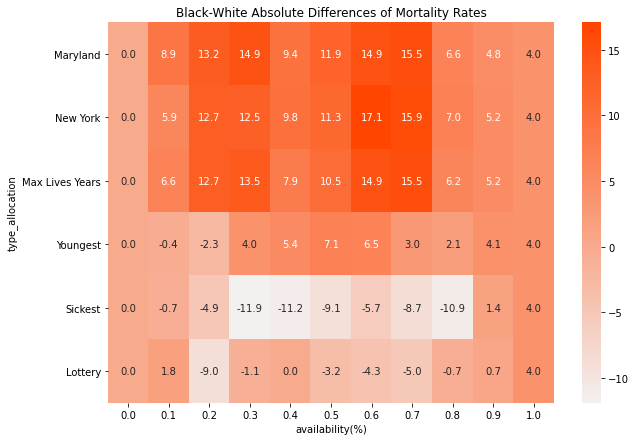

In [288]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_diff_b_w_ab, annot=True, fmt='.1f', cmap=sns.light_palette("#FF4500", as_cmap=True))
plt.title('Black-White Absolute Differences of Mortality Rates')
plt.savefig("figures_new/heat_mortality_diff_b_w_ab.png")

In [ ]:
display(df_diff_b_w_ab.mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_b_w_ab.mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_b_w_ab_allo.png')

display(df_diff_b_w_ab.mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_b_w_ab.mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_b_w_ab_avai.png')

In [263]:
display(df_diff_b_w_ab[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_b_w_ab[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_b_w_ab_allo_0.1_0.9.png')

display(df_diff_b_w_ab[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_b_w_ab[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_b_w_ab_avai_0.1_0.9.png')

AVG
type_allocation      
Maryland         11.1
New York         10.8
Max Lives Years  10.3
Youngest          3.3
Sickest          -6.9
Lottery          -2.3

AVG
availability(%)     
0.1              3.7
0.2              3.7
0.3              5.3
0.4              3.5
0.5              4.8
0.6              7.2
0.7              6.0
0.8              1.7
0.9              3.6

### Black-White (Relative Difference)

In [212]:
df_diff_b_w_re = df_b.subtract(df_w)
df_diff_b_w_re = df_diff_b_w_re.divide(df_w)*100
df_diff_b_w_re = df_diff_b_w_re.round(1)
df_diff_b_w_re

availability(%)  0.0   0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9  \
type_allocation                                                              
Maryland         0.0  10.4  17.4  23.0  17.5  26.2  40.3  53.6  28.7  27.6   
New York         0.0   6.7  16.7  19.7  18.4  25.5  46.7  55.8  31.0  30.6   
Max Lives Years  0.0   7.7  16.7  21.0  14.8  23.3  40.3  53.6  26.5  30.6   
Youngest         0.0  -0.4  -2.7   5.6   8.1  11.9  12.3   6.7   6.0  16.1   
Sickest          0.0  -0.7  -5.3 -13.8 -14.4 -13.0  -9.3 -17.6 -28.2   5.3   
Lottery          0.0   1.9 -10.4  -1.4   0.0  -5.0  -7.7 -10.1  -1.8   2.4   

availability(%)   1.0  
type_allocation        
Maryland         27.6  
New York         27.6  
Max Lives Years  27.6  
Youngest         27.6  
Sickest          27.6  
Lottery          27.6

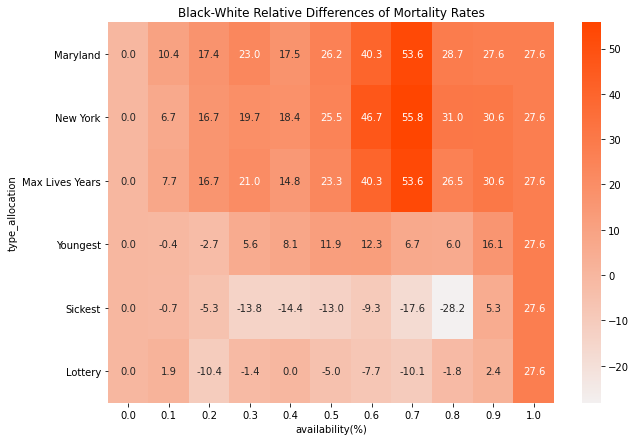

In [289]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_diff_b_w_re, annot=True, fmt='.1f', cmap=sns.light_palette("#FF4500", as_cmap=True))
plt.title('Black-White Relative Differences of Mortality Rates')
plt.savefig("figures_new/heat_mortality_diff_b_w_re.png")

In [242]:
display(df_diff_b_w_re.mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_b_w_re.mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_b_w_re_allo.png')

display(df_diff_b_w_re.mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_b_w_re.mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_b_w_re_avai.png')

AVG
type_allocation      
Maryland         24.8
New York         25.3
Max Lives Years  23.8
Youngest          8.3
Sickest          -6.3
Lottery          -0.4

AVG
availability(%)      
0.0               0.0
0.1               4.3
0.2               5.4
0.3               9.0
0.4               7.4
0.5              11.5
0.6              20.4
0.7              23.7
0.8              10.4
0.9              18.8
1.0              27.6

In [264]:
display(df_diff_b_w_re[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_b_w_re[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_b_w_re_allo_0.1_0.9.png')

display(df_diff_b_w_re[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_b_w_re[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_b_w_re_avai_0.1_0.9.png')

AVG
type_allocation      
Maryland         27.2
New York         27.9
Max Lives Years  26.1
Youngest          7.1
Sickest         -10.8
Lottery          -3.6

AVG
availability(%)      
0.1               4.3
0.2               5.4
0.3               9.0
0.4               7.4
0.5              11.5
0.6              20.4
0.7              23.7
0.8              10.4
0.9              18.8

### Avg(Hispanic-White & Black-White) (Absolute)

In [266]:
df_diff_h_w = df_h.subtract(df_w)
df_diff_b_w = df_b.subtract(df_w)
df_diff_h_b_w_avg_ab = df_diff_h_w.add(df_diff_b_w).divide(2)
df_diff_h_b_w_avg_ab = df_diff_h_b_w_avg_ab.round(1)
df_diff_h_b_w_avg_ab

availability(%)  0.0  0.1  0.2   0.3   0.4   0.5   0.6   0.7  0.8  0.9  1.0
type_allocation                                                            
Maryland         0.0  7.8  9.4  11.0  10.1  10.1  11.7  12.3  6.9  4.9  3.6
New York         0.0  3.8  8.8  11.0  10.7  10.9  13.3  12.8  7.4  5.4  3.6
Max Lives Years  0.0  6.4  8.8  10.8   9.9  10.0  11.8  12.3  6.4  5.4  3.6
Youngest         0.0 -0.3 -2.4  -0.2   1.6   1.6  -0.1  -1.9 -0.6  1.6  3.6
Sickest          0.0 -1.2 -4.7  -9.2  -8.8  -8.3  -6.9  -6.0 -6.4  0.8  3.6
Lottery          0.0 -1.8 -6.9  -2.3  -1.3  -6.5  -7.4  -8.9 -6.1 -3.2  3.6

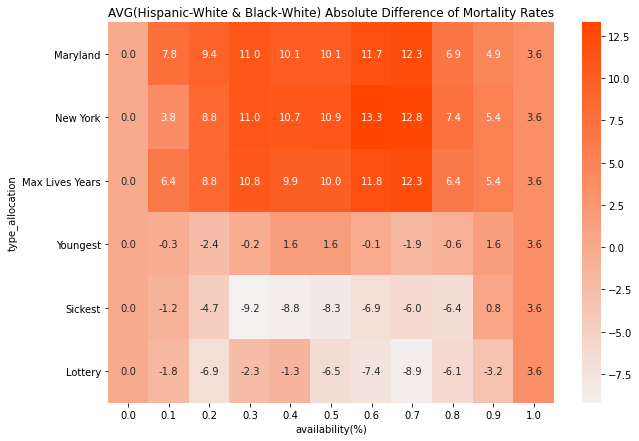

In [290]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_diff_h_b_w_avg_ab, annot=True, fmt='.1f', cmap=sns.light_palette("#FF4500", as_cmap=True))
plt.title('AVG(Hispanic-White & Black-White) Absolute Difference of Mortality Rates')
plt.savefig("figures_new/heat_mortality_diff_avg_ab.png")

In [244]:
display(df_diff_h_b_w_avg_ab.mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_b_w_avg_ab.mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_avg_ab_allo.png')

display(df_diff_h_b_w_avg_ab.mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_b_w_avg_ab.mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_avg_ab_avai.png')

AVG
type_allocation     
Maryland         8.0
New York         8.0
Max Lives Years  7.8
Youngest         0.3
Sickest         -4.3
Lottery         -3.7

AVG
availability(%)     
0.0              0.0
0.1              2.4
0.2              2.2
0.3              3.5
0.4              3.7
0.5              3.0
0.6              3.7
0.7              3.4
0.8              1.3
0.9              2.5
1.0              3.6

In [268]:
display(df_diff_h_b_w_avg_ab[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_b_w_avg_ab[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_avg_ab_allo_0.1_0.9.png')

display(df_diff_h_b_w_avg_ab[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_b_w_avg_ab[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_avg_ab_avai_0.1_0.9.png')

AVG
type_allocation     
Maryland         9.4
New York         9.3
Max Lives Years  9.1
Youngest        -0.1
Sickest         -5.6
Lottery         -4.9

AVG
availability(%)     
0.1              2.4
0.2              2.2
0.3              3.5
0.4              3.7
0.5              3.0
0.6              3.7
0.7              3.4
0.8              1.3
0.9              2.5

### Avg(Hispanic-White & Black-White) (Relative)

In [220]:
df_diff_b_w_re = df_b.subtract(df_w)
df_diff_b_w_re = df_diff_b_w_re.divide(df_w)*100
df_diff_b_w_re = df_diff_b_w_re.round(1)
df_diff_b_w_re

availability(%)  0.0   0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9  \
type_allocation                                                              
Maryland         0.0  10.4  17.4  23.0  17.5  26.2  40.3  53.6  28.7  27.6   
New York         0.0   6.7  16.7  19.7  18.4  25.5  46.7  55.8  31.0  30.6   
Max Lives Years  0.0   7.7  16.7  21.0  14.8  23.3  40.3  53.6  26.5  30.6   
Youngest         0.0  -0.4  -2.7   5.6   8.1  11.9  12.3   6.7   6.0  16.1   
Sickest          0.0  -0.7  -5.3 -13.8 -14.4 -13.0  -9.3 -17.6 -28.2   5.3   
Lottery          0.0   1.9 -10.4  -1.4   0.0  -5.0  -7.7 -10.1  -1.8   2.4   

availability(%)   1.0  
type_allocation        
Maryland         27.6  
New York         27.6  
Max Lives Years  27.6  
Youngest         27.6  
Sickest          27.6  
Lottery          27.6

In [221]:
df_diff_h_w_re = df_h.subtract(df_w)
df_diff_h_w_re = df_diff_h_w_re.divide(df_w)*100
df_diff_h_w_re = df_diff_h_w_re.round(1)

df_diff_b_w_re = df_b.subtract(df_w)
df_diff_b_w_re = df_diff_b_w_re.divide(df_w)*100
df_diff_b_w_re = df_diff_b_w_re.round(1)

df_diff_h_b_w_avg_re = df_diff_h_w_re.add(df_diff_b_w_re).divide(2)
df_diff_h_b_w_avg_re = df_diff_h_b_w_avg_re.round(1)
df_diff_h_b_w_avg_re

availability(%)  0.0  0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9  \
type_allocation                                                             
Maryland         0.0  9.1  12.4  17.0  18.9  22.4  31.6  42.6  30.0  27.9   
New York         0.0  4.3  11.5  17.4  20.1  24.5  36.4  45.1  32.8  31.8   
Max Lives Years  0.0  7.4  11.5  16.7  18.6  22.0  32.0  42.6  27.2  31.8   
Youngest         0.0 -0.4  -2.8  -0.2   2.3   2.6  -0.2  -4.2  -1.8   6.3   
Sickest          0.0 -1.2  -5.1 -10.6 -11.3 -11.8 -11.4 -12.2 -16.4   2.8   
Lottery          0.0 -1.9  -7.9  -3.0  -1.9 -10.1 -13.1 -18.0 -15.3 -11.1   

availability(%)   1.0  
type_allocation        
Maryland         24.5  
New York         24.5  
Max Lives Years  24.5  
Youngest         24.5  
Sickest          24.5  
Lottery          24.5

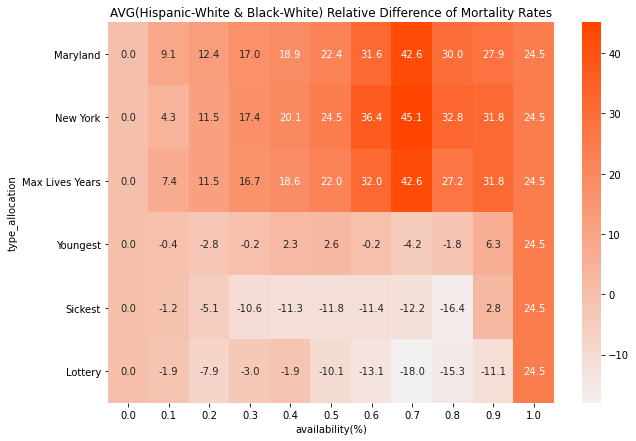

In [291]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_diff_h_b_w_avg_re, annot=True, fmt='.1f', cmap=sns.light_palette("#FF4500", as_cmap=True))
plt.title('AVG(Hispanic-White & Black-White) Relative Difference of Mortality Rates')
plt.savefig("figures_new/heat_mortality_diff_avg_re.png")

In [245]:
display(df_diff_h_b_w_avg_re.mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_b_w_avg_re.mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_avg_re_allo.png')

display(df_diff_h_b_w_avg_re.mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_b_w_avg_re.mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_avg_re_avai.png')

AVG
type_allocation      
Maryland         21.5
New York         22.6
Max Lives Years  21.3
Youngest          2.4
Sickest          -4.8
Lottery          -5.3

AVG
availability(%)      
0.0               0.0
0.1               2.9
0.2               3.3
0.3               6.2
0.4               7.8
0.5               8.3
0.6              12.5
0.7              16.0
0.8               9.4
0.9              14.9
1.0              24.5

In [269]:
display(df_diff_h_b_w_avg_re[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_b_w_avg_re[ls_avai_1_9].mean(axis=1).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_avg_re_allo_0.1_0.9.png')

display(df_diff_h_b_w_avg_re[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'))
dfi.export(df_diff_h_b_w_avg_re[ls_avai_1_9].mean(axis=0).round(1).to_frame(name='AVG'), 'figures_new/tb_avg_mortality_diff_avg_re_avai_0.1_0.9.png')

AVG
type_allocation      
Maryland         23.5
New York         24.9
Max Lives Years  23.3
Youngest          0.2
Sickest          -8.6
Lottery          -9.1

AVG
availability(%)      
0.1               2.9
0.2               3.3
0.3               6.2
0.4               7.8
0.5               8.3
0.6              12.5
0.7              16.0
0.8               9.4
0.9              14.9

In [ ]:
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import chi2_contingency
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

## Chi-squared

In [ ]:
df_maryland.loc[df_maryland['level']==0.3]

In [ ]:
chi2_contingency(df_maryland.loc[df_maryland['level']==0.3, ['percentage_death']])

## ANOVA

# Social Vulnerable Index

In [ ]:
print(df_svi_tx_travis.shape)
df_svi_tx_travis

In [ ]:
print(df_sample.shape)
df_sample.head()

In [ ]:
df_test = df_sample.merge(df_svi_tx_travis, left_on='zip_code', right_on='ZCTA5', how='inner')

In [ ]:
print(df_test.shape)
df_test.head()

In [ ]:
df_test.loc[df_test['E_POV'].max(), 'zip_code']

In [ ]:
df_test.loc[df_test['zip_code']==78703, 'E_POV']

In [ ]:
df_test.loc[df_test['zip_code']==78640, 'E_POV']

In [ ]:
df_test.loc[df_test['zip_code']==78640]

In [ ]:
df_svi_tx_travis[df_svi_tx_travis['ZCTA5']==78640]